
# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import xgboost

In [2]:
!pip install shap==0.44.1
import shap
print("SHAP version:", shap.__version__)

SHAP version: 0.44.1


# Reading the DataSet

In [3]:
churn= pd.read_csv('/content/Churn_Modelling 2018.csv')

# Data Understanding

The Df has 1000 rows with 14 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

In [4]:
# Dimension of the dataset
churn.shape

(10000, 14)

In [5]:
churn.size

140000

In [6]:
# Describe all numerical columns
churn.describe(exclude= ['O'])

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


So, the dataset has more numerical variables (8=(6 int64 + 2 float64)) than categorical variables (6=(3 object + 3 binary int64)).

**Categorical Variables:**

Object type columns:

1.Surname

2.Geography

3.Gender

Binary int64 type columns (which should be treated as categorical):

4.HasCrCard (0 = No, 1 = Yes)

5.IsActiveMember (0 = No, 1 = Yes)

6.Exited (0 = No, 1 = Yes)

**Numerical Variables:**

Int64 type columns:

RowNumber

CustomerId

CreditScore

Age

Tenure

NumOfProducts

**Float64 type columns:**

Balance

EstimatedSalary

Updated Summary:

Categorical variables: 6 (3 object + 3 binary int64)

Numerical variables: 8 (6 int64 + 2 float64)

In [8]:
churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

## Column Name Formatting

In [4]:
churn.columns=churn.columns.str.strip()

In [5]:
churn.columns=churn.columns.str.lower()

In [11]:
churn.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

## Matplotlib Visualization

<Axes: xlabel='exited', ylabel='count'>

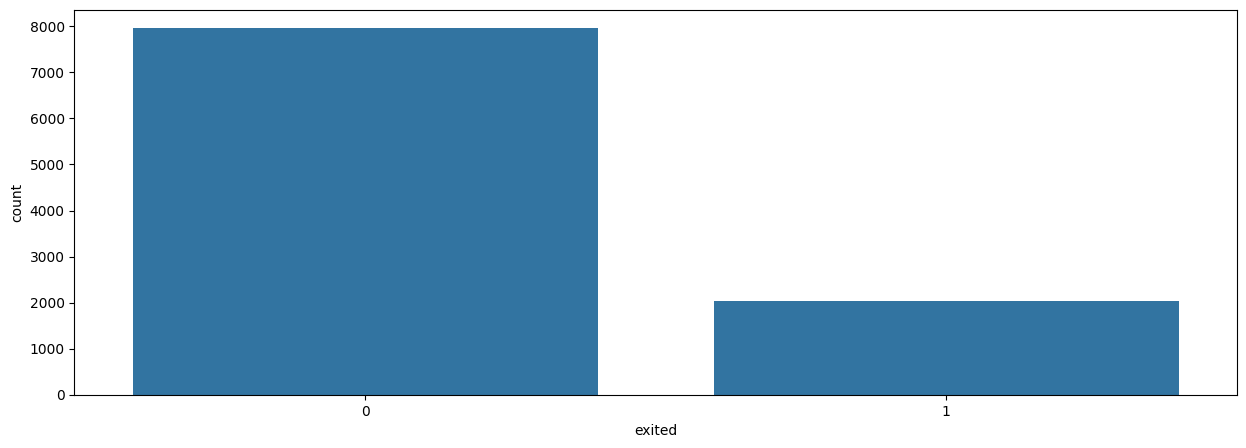

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(data=churn,x='exited')

7963
2037


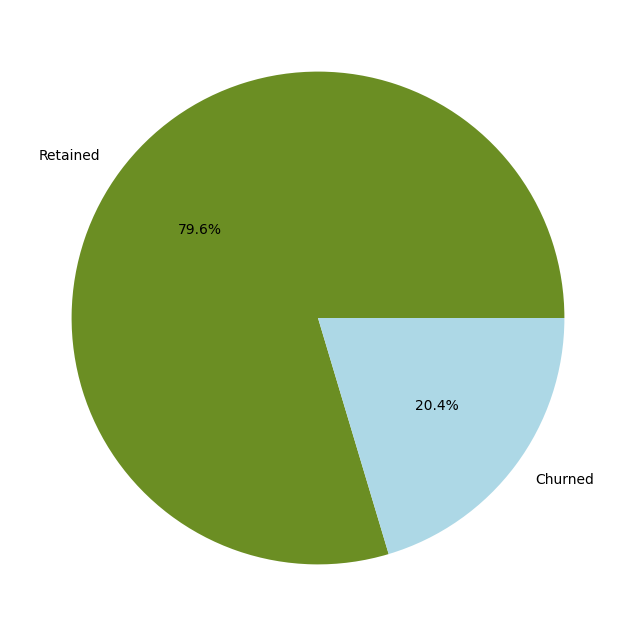

In [13]:
fig, ax=plt.subplots(figsize=(10,8))
print(churn[(churn["exited"]==0)].count()[0])
print(churn[(churn["exited"]==1)].count()[1])

ax.pie([7963,2037], labels=["Retained","Churned"], autopct='%1.1f%%',colors=['olivedrab','lightblue'])
plt.show()

From a business perspective, the pie chart visually communicates the breakdown of customer retention versus churn within the dataset. While a 79.6% retention rate may seem positive, the 20.4% churn rate could be concerning in the bank.

However, models trained on imbalanced data may tend to favor the majority class—in this case, the 'Retained' class. This can result in a high accuracy score simply because the model predicts 'Retained' most of the time, which might not be informative about the model's ability to correctly identify churned customers.

When dealing with imbalanced classes, accuracy is not always the best metric to evaluate model performance because it can be misleading.

Therefore, other metrics such as Precision, Recall (Sensitivity), F1 Score, and the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) are often more useful for evaluating model performance in the context of imbalanced data.

In many business scenarios, the cost of false negatives (predicting a customer will not churn when they actually do) can be much higher than false positives. This is because losing an existing customer may have a greater negative impact than the cost of incorrectly targeting a customer for retention efforts. It is crucial to identify the correct balance between sensitivity and specificity to tailor the model to business needs.

<Axes: xlabel='isactivemember', ylabel='count'>

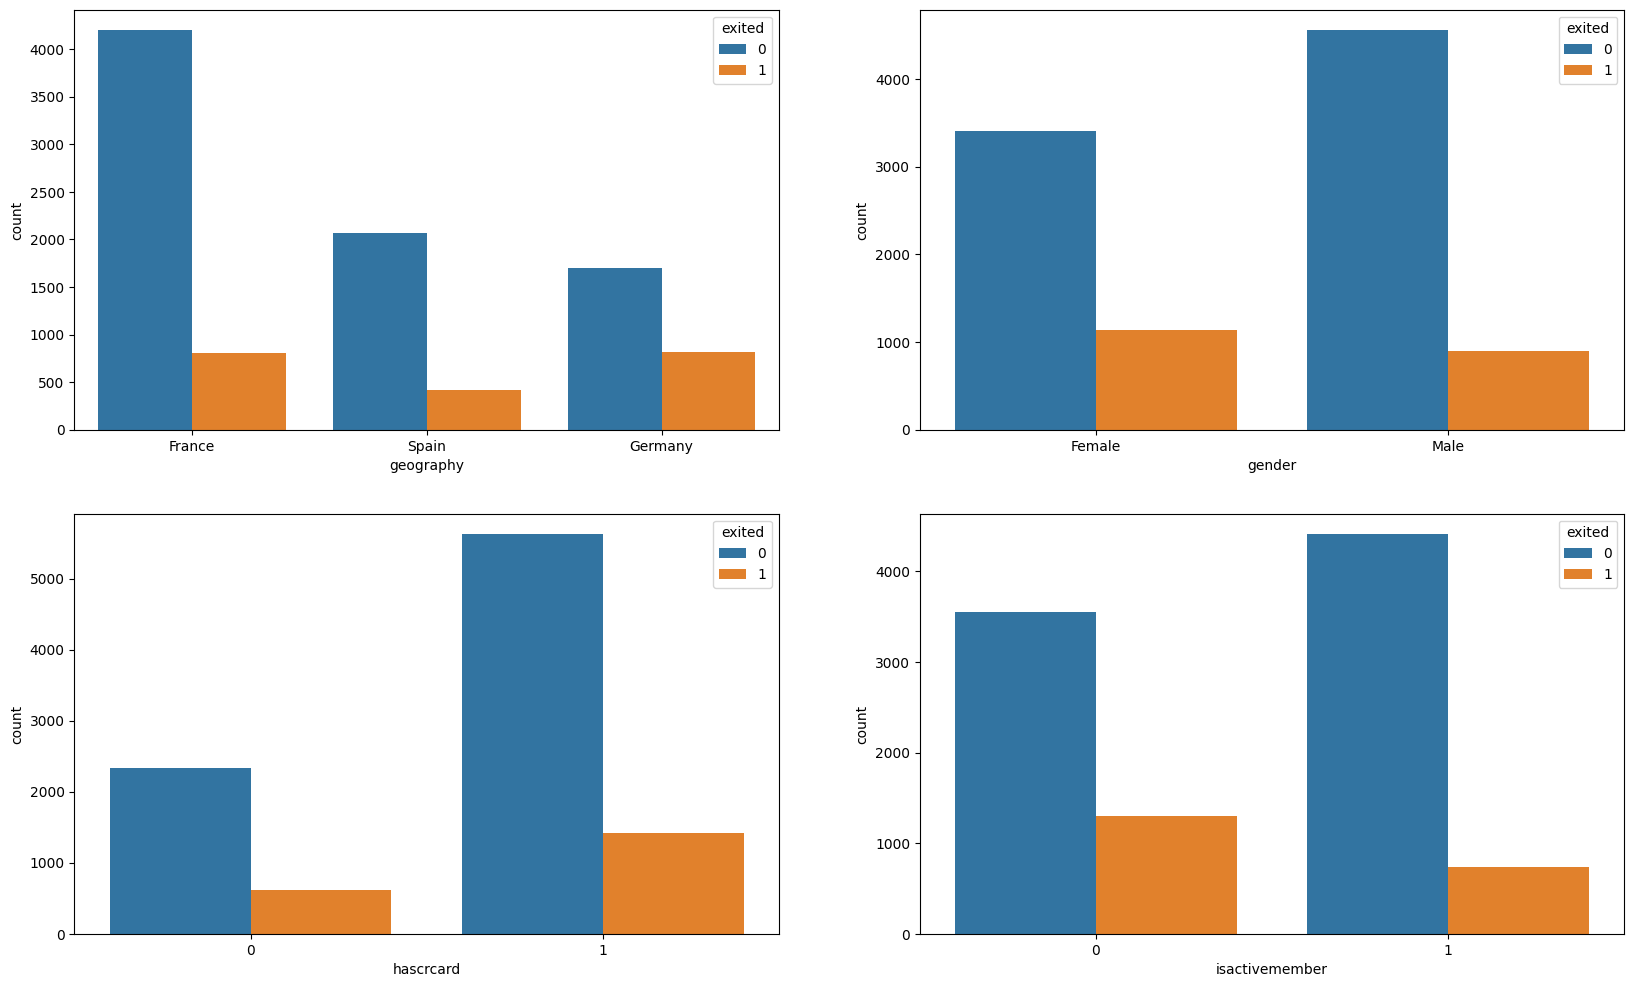

In [14]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='geography', hue = 'exited',data = churn, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'exited',data = churn, ax=axarr[0][1])
sns.countplot(x='hascrcard', hue = 'exited',data = churn, ax=axarr[1][0])
sns.countplot(x='isactivemember', hue = 'exited',data = churn, ax=axarr[1][1])

**Geography:**

France has the highest number of customers who have not exited (blue bar), indicating good retention. However, it also has a considerable number of customers who have exited (orange bar), though less in proportion compared to Germany. Spain has fewer customers in both categories compared to France, but the proportion of those who have exited seems lower than in Germany. Germany has the highest proportion of customers who have exited compared to those who have not, suggesting a higher churn rate.

**Gender:**

The number of exited customers is slightly higher for females than for males, indicating a possibly higher churn rate among female customers.

**Has Credit Card (hascrcard):**

The majority of customers, whether they have exited or not, possess a credit card. This suggests having a credit card is not a distinguishing feature in terms of churn. There is no significant difference in churn rate between those who have a credit card and those who do not, as indicated by the similar proportions of exited customers in both groups.

**Is Active Member (isactivemember):**

Active members show a much higher retention rate, with a significantly higher number of non-exited customers. Non-active members have a higher churn rate, as indicated by a larger proportion of exited customers, suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

These insights can inform targeted customer retention strategies. For example, the bank may focus on increasing customer engagement and activity levels to reduce churn, or they may investigate the higher churn rate in Germany to address any underlying issues specific to that market.

<Axes: xlabel='exited', ylabel='estimatedsalary'>

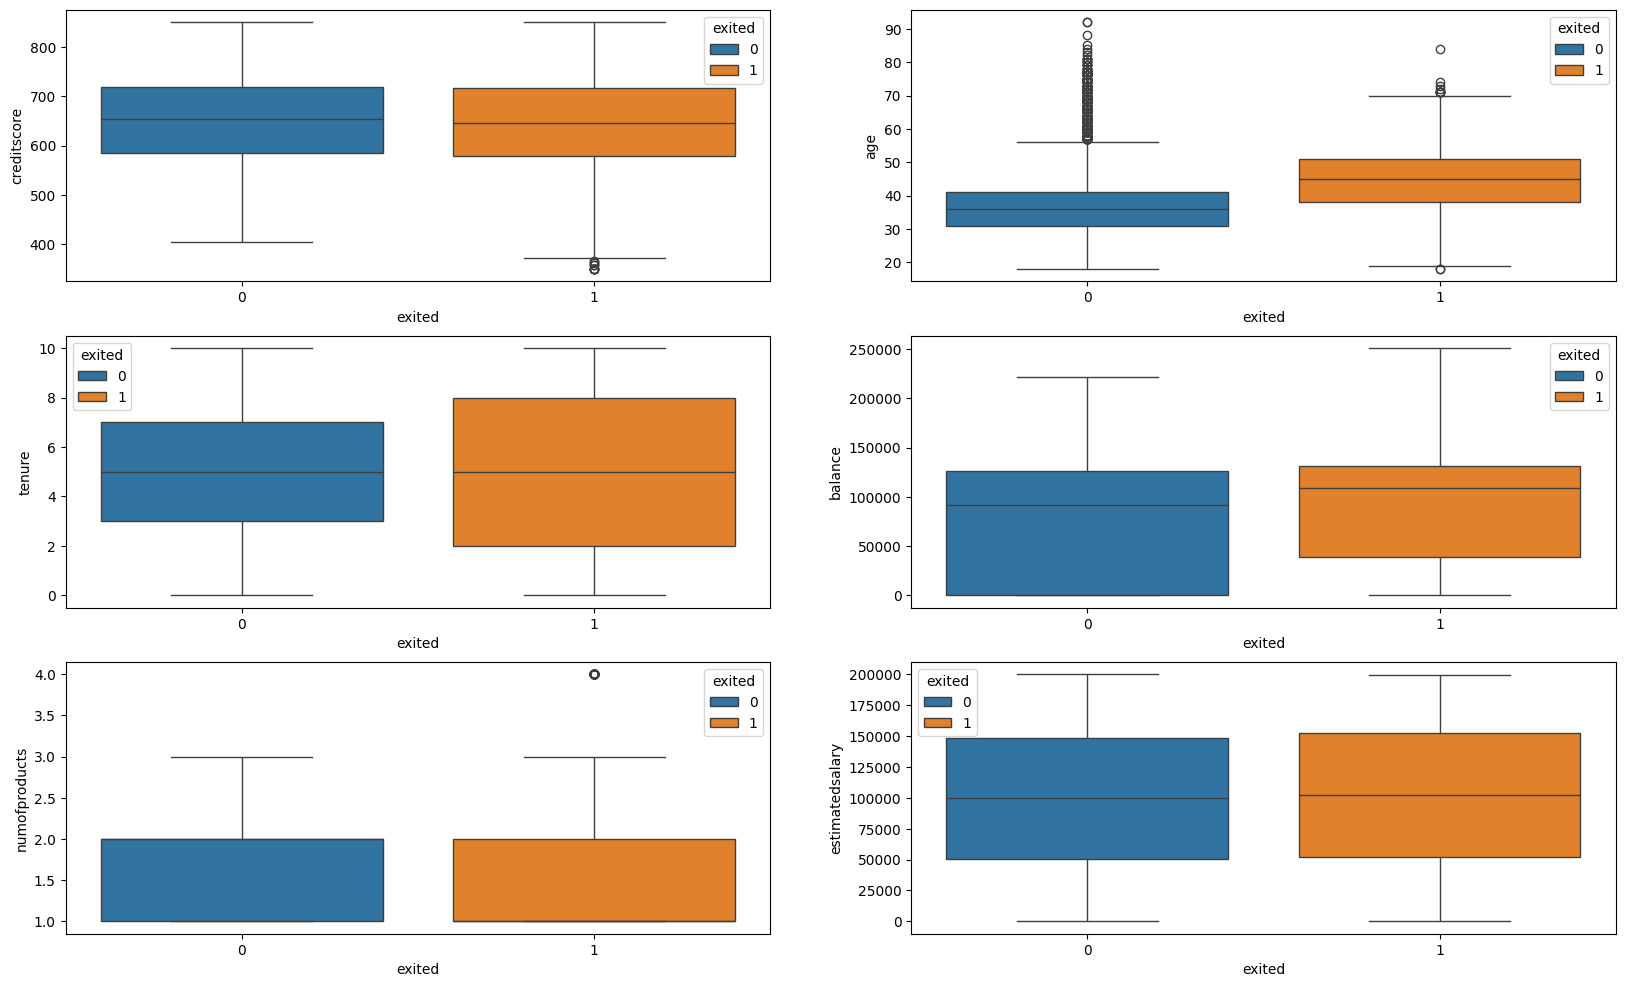

In [15]:
#Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='creditscore',x = 'exited', hue = 'exited',data = churn, ax=axarr[0][0])
sns.boxplot(y='age',x = 'exited', hue = 'exited',data = churn, ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'exited', hue = 'exited',data = churn, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'exited', hue = 'exited',data = churn, ax=axarr[1][1])
sns.boxplot(y='numofproducts',x = 'exited', hue = 'exited',data = churn, ax=axarr[2][0])
sns.boxplot(y='estimatedsalary',x = 'exited', hue = 'exited',data = churn, ax=axarr[2][1])

Age and Balance stand out as potential predictors of churn, as there are noticeable differences in their distributions between the churned and retained customers.

Credit Score, Tenure, and Estimated Salary seem to have less of an impact on churn, as their distributions are similar for both groups. Number of Products could also be an interesting factor to explore further since customers with more products tend to churn more.

**Age:** Older customers are more likely to exit.

**Credit Score:** Lower credit scores are associated with higher exit rates.

**Tenure:** Customers with longer tenure are more likely to exit.

**Balance:** Higher balances are associated with higher exit rates.

**Number of Products:** There's a slight increase in the number of products for customers who exited.

**Estimated Salary:** There's a small difference in estimated salary between those who exited and those who did not, with exited customers having slightly lower median salaries.

These visual insights can help the bank prioritize factors to consider in churn prediction models and potentially tailor customer retention strategies to address the higher churn risk among older customers and those with higher balances or more products.

# Data Preprocessing

## Missing Values

In [16]:
# Check columns list and missing values
churn.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

There are no missing values!

## Duplicate Records Handling

In [6]:
churn[churn.duplicated(subset=['customerid'],keep=False)]

Empty DataFrame
Columns: [rownumber, customerid, surname, creditscore, geography, gender, age, tenure, balance, numofproducts, hascrcard, isactivemember, estimatedsalary, exited]
Index: []

To ensure about data quality and accuracy of our data set

##Data Cleaning

Remove or transform irrelevant or redundant features

In [18]:
churn.describe()

rownumber    customerid   creditscore           age        tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             balance  numofproducts    hascrcard  isactivemember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       estimatedsalary        exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

From the above, we will not require the attributes like 'rownumber', 'customerid' and 'surname' as they are specific to a customer. They don't provide any useful information for the model to predict if the customer stays or leaves the bank So, we exclude them from the data frame.

In [7]:
churn=churn.drop(['rownumber','customerid','surname'],axis=1)

##Feature Engineering

### Category Encoding

Encode categorical variables into numerical values.

In [8]:
df_encoded = churn.select_dtypes(include='object')
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in df_encoded:
    churn[feature] = le.fit_transform(churn[feature])

In [21]:
churn.head()

creditscore  geography  gender  age  tenure    balance  numofproducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   hascrcard  isactivemember  estimatedsalary  exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [22]:
# Get unique count for each variable
churn.nunique()

creditscore         460
geography             3
gender                2
age                  70
tenure               11
balance            6382
numofproducts         4
hascrcard             2
isactivemember        2
estimatedsalary    9999
exited                2
dtype: int64

###Interaction Features
. CreditScore_Balance: Interaction between credit score and balance.

. Age_NumOfProducts: Interaction between age and number of products.


In [9]:
churn['Creditscore_balance'] = churn['creditscore'] * churn['balance']

In [10]:
churn['age_numofproducts'] = churn['age'] * churn['numofproducts']

###Temporal Features

. AvgYearlyBalance: Average yearly balance, accounting for tenure.

. Balance_Age_Ratio: Ratio of balance to age.


In [11]:
churn['avgyearlybalance'] = churn['balance'] / churn['tenure'].replace(0, 1)

In [12]:
churn['balance_age_ratio'] = churn['balance'] / churn['age'].replace(0, 1)

###Behavioral Features

. HighBalance_NotActive: High balance customers who are not active.

. MultiProduct_LowActivity: Multiple product holders with low activity.

In [13]:
churn['highbalance_notactive'] = churn['balance'] * (1 - churn['isactivemember'])

In [14]:
churn['nultiproduct_lowactivity'] = churn['numofproducts'] * (1 - churn['isactivemember'])

In [29]:
churn

creditscore  geography  gender  age  tenure    balance  numofproducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      hascrcard  isactivemember  estimatedsalary  exited  Creditscore_balance  \
0             1               1        101348.88       1         0.000000e+00   
1             0               1        112542.58       0         5.095518e+07   
2             1               0        113931.57       1         8.014972e+07   
3             0               0         93826.63       0         0.000000e+00   
4             1               1         79084.10       0         1.066842e+08   
...         ...             ...              ...     ...                  ...   
9995          1               0         96270.64       0         0.000000e+00   
9996          1               1        101699.77       0         2.960272e+07   
9997          0               1         42085.58       1         0.000000e+00   
9998          1               0         92888.52       1         5.795814e+07   
9999          1               0         38190.78       0         1.030731e+08   

      age_numofproducts  avgyearlybalance  balance_age_ratio  \
0                    42          0.000000           0.000000   
1                    41      83807.860000        2044.094146   
2                   126      19957.600000        3801.447619   
3                    78          0.000000           0.000000   
4                    43      62755.410000        2918.856279   
...                 ...               ...                ...   
9995                 78          0.000000           0.000000   
9996                 35       5736.961000        1639.131714   
9997                 36          0.000000           0.000000   
9998                 84      25025.103333        1787.507381   
9999                 28      32535.697500        4647.956786   

      highbalance_notactive  nultiproduct_lowactivity  
0                      0.00                         0  
1                      0.00                         0  
2                 159660.80                         3  
3                      0.00                         2  
4                      0.00                         0  
...                     ...                       ...  
9995                   0.00                         2  
9996                   0.00                         0  
9997                   0.00                         0  
9998               75075.31                         2  
9999              130142.79                         1  

[10000 rows x 17 columns]

In [15]:
# Make a copy from the main dataframe
churn_copy = churn.copy()
churn_copy=churn_copy.drop(['Creditscore_balance','age_numofproducts','avgyearlybalance','balance_age_ratio','highbalance_notactive','nultiproduct_lowactivity'],axis=1)

We made two dataset with and without feature engineering to compare the results.

In [31]:
churn_copy

creditscore  geography  gender  age  tenure    balance  numofproducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      hascrcard  isactivemember  estimatedsalary  exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

## Balancing Techniques
Improving Model Performance with Class Imbalance Synthetic Minority Over-sampling Technique (SMOTE)

Various techniques can be employed to handle imbalanced datasets, such as resampling methods (oversampling the minority class or undersampling the majority class), using synthetic data generation techniques like SMOTE (Synthetic Minority Over-sampling Technique), or applying different weights to classes during model training.

Here, we use the SMOTE method.

In [16]:
from imblearn.combine import SMOTETomek

In [17]:
X_1 = churn_copy.drop('exited', axis=1)
y_1 = churn_copy['exited']
y_1.value_counts()

exited
0    7963
1    2037
Name: count, dtype: int64

In [18]:
X = churn.drop('exited', axis=1)
y = churn['exited']
y.value_counts()

exited
0    7963
1    2037
Name: count, dtype: int64

In [19]:
smote_1 = SMOTETomek(random_state=42)

X_smote_1, y_smote_1 = smote_1.fit_resample(X_1, y_1)

In [20]:
smote = SMOTETomek(random_state=42)

X_smote, y_smote = smote.fit_resample(X, y)

In [37]:
y_smote

0        1
1        0
2        1
3        0
4        0
        ..
14477    1
14478    1
14479    1
14480    1
14481    1
Name: exited, Length: 14482, dtype: int64

In [38]:
X_smote

creditscore  geography  gender  age  tenure        balance  \
0              619          0       0   42       2       0.000000   
1              608          2       0   41       1   83807.860000   
2              502          0       0   42       8  159660.800000   
3              699          0       0   39       1       0.000000   
4              850          2       0   43       2  125510.820000   
...            ...        ...     ...  ...     ...            ...   
14477          776          0       0   50       4  117656.236108   
14478          807          0       0   36       9       0.000000   
14479          649          1       0   49       4  142031.718475   
14480          461          1       0   59       6  122774.483799   
14481          706          0       0   31       7       0.000000   

       numofproducts  hascrcard  isactivemember  estimatedsalary  \
0                  1          1               1    101348.880000   
1                  1          0               1    112542.580000   
2                  3          1               0    113931.570000   
3                  2          0               0     93826.630000   
4                  1          1               1     79084.100000   
...              ...        ...             ...              ...   
14477              2          0               0    131976.674080   
14478              1          1               0      4952.388026   
14479              2          1               0    142959.686548   
14480              1          1               0     53305.859582   
14481              1          1               0     28675.783564   

       Creditscore_balance  age_numofproducts  avgyearlybalance  \
0             0.000000e+00                 42          0.000000   
1             5.095518e+07                 41      83807.860000   
2             8.014972e+07                126      19957.600000   
3             0.000000e+00                 78          0.000000   
4             1.066842e+08                 43      62755.410000   
...                    ...                ...               ...   
14477         9.100492e+07                100      57305.332227   
14478         0.000000e+00                 36          0.000000   
14479         9.214995e+07                100      29964.997130   
14480         5.569885e+07                 59      19028.663820   
14481         0.000000e+00                 31          0.000000   

       balance_age_ratio  highbalance_notactive  nultiproduct_lowactivity  
0               0.000000               0.000000                         0  
1            2044.094146               0.000000                         0  
2            3801.447619          159660.800000                         3  
3               0.000000               0.000000                         2  
4            2918.856279               0.000000                         0  
...                  ...                    ...                       ...  
14477        2337.192190           48683.774529                         0  
14478           0.000000               0.000000                         1  
14479        2846.977727            1948.316794                         0  
14480        2072.508472          122774.483799                         1  
14481           0.000000               0.000000                         1  

[14482 rows x 16 columns]

In [21]:
y_smote_1.value_counts().to_frame()

count
exited       
1        6889
0        6889

In [22]:
y_smote.value_counts().to_frame()

count
exited       
1        7241
0        7241

##Exploratory Data Analysis
Multi and Bivariate Analysis

In [41]:
churn_copy.corr()

creditscore  geography    gender       age    tenure  \
creditscore         1.000000   0.007888 -0.002857 -0.003965  0.000842   
geography           0.007888   1.000000  0.004719  0.022812  0.003739   
gender             -0.002857   0.004719  1.000000 -0.027544  0.014733   
age                -0.003965   0.022812 -0.027544  1.000000 -0.009997   
tenure              0.000842   0.003739  0.014733 -0.009997  1.000000   
balance             0.006268   0.069408  0.012087  0.028308 -0.012254   
numofproducts       0.012238   0.003972 -0.021859 -0.030680  0.013444   
hascrcard          -0.005458  -0.008523  0.005766 -0.011721  0.022583   
isactivemember      0.025651   0.006724  0.022544  0.085472 -0.028362   
estimatedsalary    -0.001384  -0.001369 -0.008112 -0.007201  0.007784   
exited             -0.027094   0.035943 -0.106512  0.285323 -0.014001   

                  balance  numofproducts  hascrcard  isactivemember  \
creditscore      0.006268       0.012238  -0.005458        0.025651   
geography        0.069408       0.003972  -0.008523        0.006724   
gender           0.012087      -0.021859   0.005766        0.022544   
age              0.028308      -0.030680  -0.011721        0.085472   
tenure          -0.012254       0.013444   0.022583       -0.028362   
balance          1.000000      -0.304180  -0.014858       -0.010084   
numofproducts   -0.304180       1.000000   0.003183        0.009612   
hascrcard       -0.014858       0.003183   1.000000       -0.011866   
isactivemember  -0.010084       0.009612  -0.011866        1.000000   
estimatedsalary  0.012797       0.014204  -0.009933       -0.011421   
exited           0.118533      -0.047820  -0.007138       -0.156128   

                 estimatedsalary    exited  
creditscore            -0.001384 -0.027094  
geography              -0.001369  0.035943  
gender                 -0.008112 -0.106512  
age                    -0.007201  0.285323  
tenure                  0.007784 -0.014001  
balance                 0.012797  0.118533  
numofproducts           0.014204 -0.047820  
hascrcard              -0.009933 -0.007138  
isactivemember         -0.011421 -0.156128  
estimatedsalary         1.000000  0.012097  
exited                  0.012097  1.000000

<Axes: >

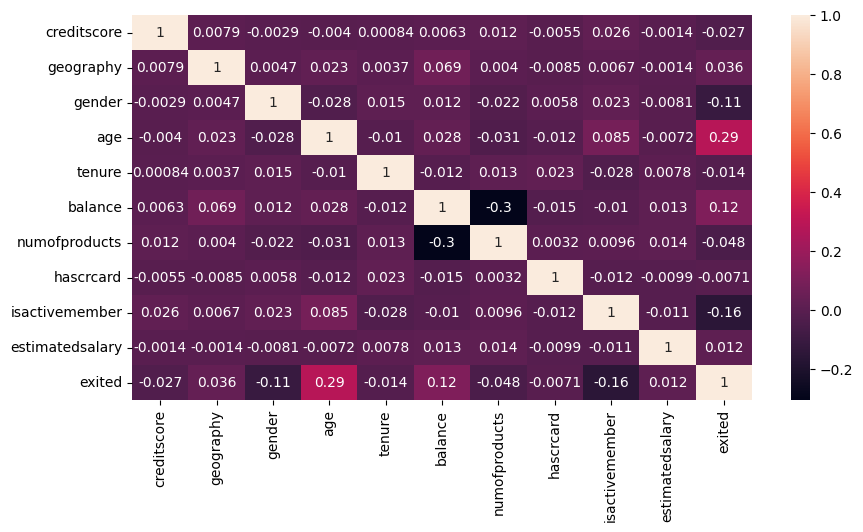

In [42]:
plt.figure(figsize=(10,5))
sns.heatmap(churn_copy.corr(),annot=True)

The strongest relationship with churn is age, with older customers being more likely to leave.

There is a moderate negative correlation between being an active member and exiting, suggesting that active members are less likely to exit.

There is a weak positive correlation between balance and exited, indicating that customers with higher balances are slightly more likely to exit.

Credit score, tenure, and the number of products have weaker relationships with churn. Having a credit card and estimated salary appear to have little to no direct impact on churn based on this correlation analysis.

In [23]:
df_corr_exit=churn_copy.corr()['exited'].to_frame()

<Axes: xlabel='None', ylabel='exited'>

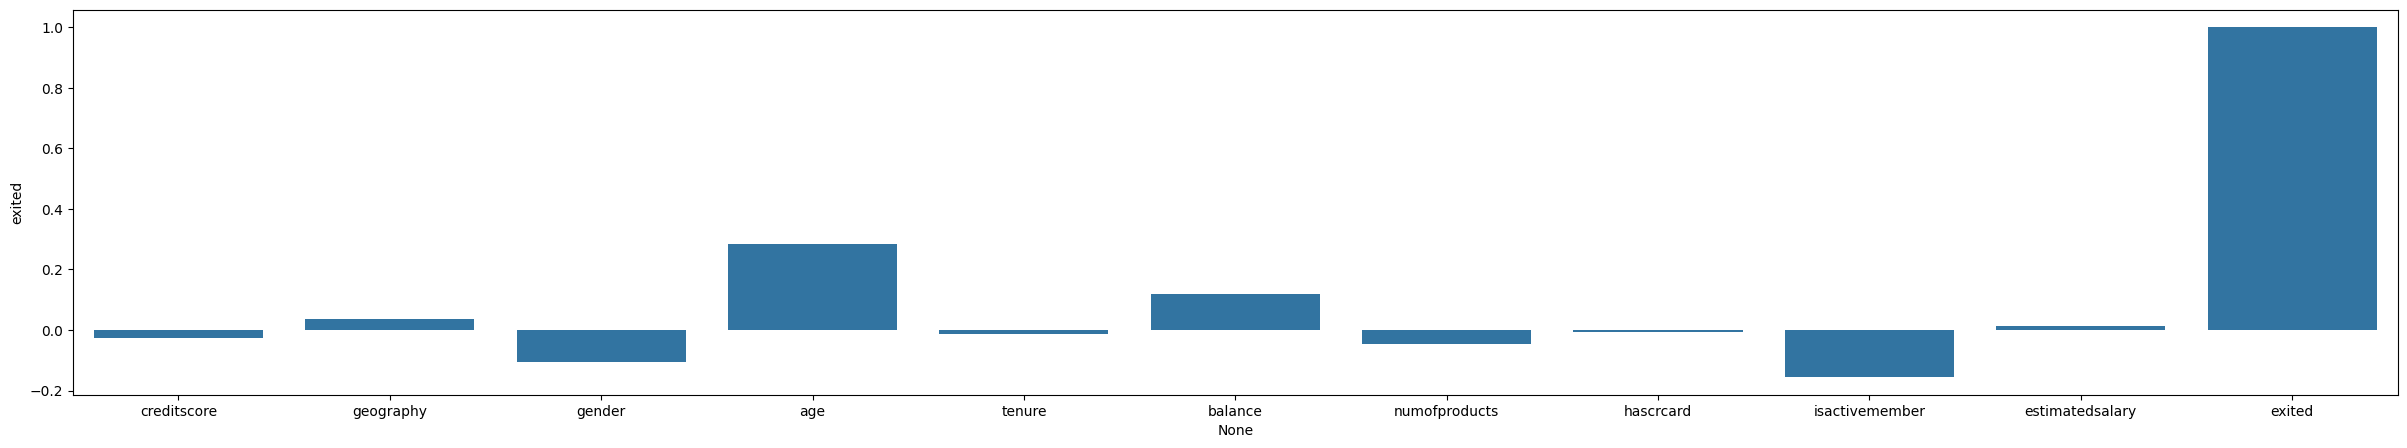

In [44]:
plt.figure(figsize=(30,5))
sns.barplot(data=df_corr_exit,x=df_corr_exit.index,y='exited')

'Age' has the highest positive correlation with 'Exited'(0.29). This suggests that as the age increases, the likelihood of a customer exiting (churning) also increases.

'IsActiveMember' has the highest negative correlation with 'Exited'(-0.16). This indicates that active members are less likely to churn.

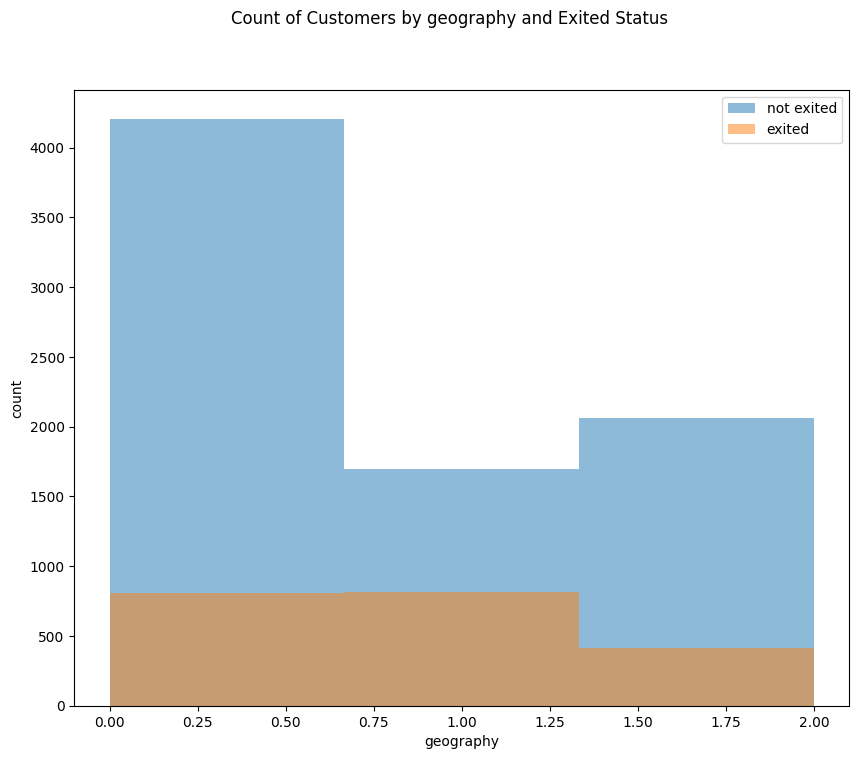

In [45]:
fig,axarr=plt.subplots(1,1, figsize=(10,8))
axarr.hist(churn_copy[churn_copy['exited']==0]['geography'],bins=3,alpha=0.5,label='not exited')
axarr.hist(churn_copy[churn_copy['exited']==1]['geography'],bins=3,alpha=0.5,label='exited')
axarr.set_xlabel('geography')
axarr.set_ylabel('count')
axarr.legend()
fig.suptitle("Count of Customers by geography and Exited Status")
plt.show()

Germany appears to have a higher churn rate compared to France and Spain, as indicated by the relatively higher proportion of customers who have exited.France has the largest number of customers who have remained with the bank (not exited), suggesting a stronger customer retention in that country.

<Axes: xlabel='estimatedsalary', ylabel='Density'>

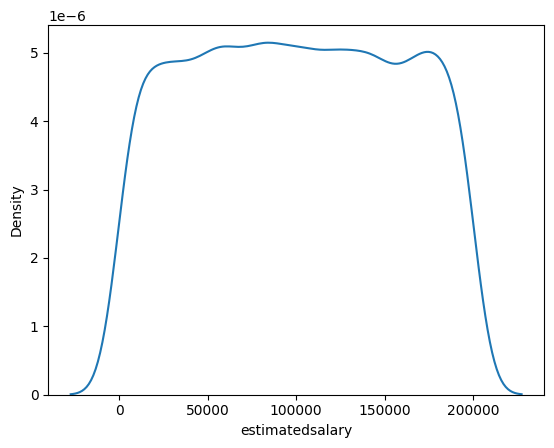

In [46]:
# Kernel density estimation plot for estimatedsalary
sns.kdeplot(churn_copy.estimatedsalary)

The KDE plot suggests that the 'EstimatedSalary' is uniformly distributed across the range of values. This is indicated by the relatively flat top of the density curve, which spans a broad range of salary values.

The range of 'EstimatedSalary' extends from near 0 to around 200,000, with no significant spikes or dips, which reinforces the notion of a uniform distribution.

The uniform distribution suggests that customers are evenly spread across all salary ranges.

## Creating Train/Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_smote_1, y_smote_1, test_size=0.2, shuffle=True, random_state=42)

In [48]:
X_train_1.head()

creditscore  geography  gender  age  tenure        balance  \
5795          725          0       0   31       6       0.000000   
4688          714          0       0   24       7       0.000000   
5129          508          2       1   54      10       0.000000   
6650          587          0       0   46       6   88820.290000   
9982          566          0       0   40       4  152223.493763   

      numofproducts  hascrcard  isactivemember  estimatedsalary  
5795              1          0               0      61326.43000  
4688              2          1               0     166335.00000  
5129              1          1               1     175749.36000  
6650              1          0               0      70224.34000  
9982              1          1               0     175760.53668

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, shuffle=True, random_state=42)

In [26]:
X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape

((11022, 10), (2756, 10), (11022,), (2756,))

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11585, 16), (2897, 16), (11585,), (2897,))

In [29]:
X_train.head()

creditscore  geography  gender  age  tenure        balance  \
180            850          2       1   30       2  141040.010000   
12926          735          0       0   33       4       0.000000   
8288           507          1       1   36       9  118214.320000   
2218           686          0       1   38       6  149238.970000   
13711          776          0       0   42       6  181131.956611   

       numofproducts  hascrcard  isactivemember  estimatedsalary  \
180                1          1               1      5978.200000   
12926              1          1               0     25830.805639   
8288               3          1               0    119110.030000   
2218               1          1               1     97825.230000   
13711              2          0               0    140838.867356   

       Creditscore_balance  age_numofproducts  avgyearlybalance  \
180           1.198840e+08                 30      70520.005000   
12926         0.000000e+00                 33          0.000000   
8288          5.993466e+07                108      13134.924444   
2218          1.023779e+08                 38      24873.161667   
13711         1.401430e+08                111      31911.668119   

       balance_age_ratio  highbalance_notactive  nultiproduct_lowactivity  
180          4701.333667               0.000000                         0  
12926           0.000000               0.000000                         1  
8288         3283.731111          118214.320000                         3  
2218         3927.341316               0.000000                         0  
13711        4291.671256          149444.666446                         2

## Scalling the data

In [28]:
from sklearn.preprocessing import StandardScaler
scaler_1 = StandardScaler()
X_train_scaled_1 = scaler_1.fit_transform(X_train_1)
X_test_scaled_1 = scaler_1.transform(X_test_1)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
churn

creditscore  geography  gender  age  tenure    balance  numofproducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      hascrcard  isactivemember  estimatedsalary  exited  Creditscore_balance  \
0             1               1        101348.88       1         0.000000e+00   
1             0               1        112542.58       0         5.095518e+07   
2             1               0        113931.57       1         8.014972e+07   
3             0               0         93826.63       0         0.000000e+00   
4             1               1         79084.10       0         1.066842e+08   
...         ...             ...              ...     ...                  ...   
9995          1               0         96270.64       0         0.000000e+00   
9996          1               1        101699.77       0         2.960272e+07   
9997          0               1         42085.58       1         0.000000e+00   
9998          1               0         92888.52       1         5.795814e+07   
9999          1               0         38190.78       0         1.030731e+08   

      age_numofproducts  avgyearlybalance  balance_age_ratio  \
0                    42          0.000000           0.000000   
1                    41      83807.860000        2044.094146   
2                   126      19957.600000        3801.447619   
3                    78          0.000000           0.000000   
4                    43      62755.410000        2918.856279   
...                 ...               ...                ...   
9995                 78          0.000000           0.000000   
9996                 35       5736.961000        1639.131714   
9997                 36          0.000000           0.000000   
9998                 84      25025.103333        1787.507381   
9999                 28      32535.697500        4647.956786   

      highbalance_notactive  nultiproduct_lowactivity  
0                      0.00                         0  
1                      0.00                         0  
2                 159660.80                         3  
3                      0.00                         2  
4                      0.00                         0  
...                     ...                       ...  
9995                   0.00                         2  
9996                   0.00                         0  
9997                   0.00                         0  
9998               75075.31                         2  
9999              130142.79                         1  

[10000 rows x 17 columns]

## Baseline Model 1: Logistic Regression

In [30]:
lr_1=LogisticRegression()
lr_1.fit(X_train_scaled_1,y_train_1)

LogisticRegression()

In [31]:
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)


LogisticRegression()

In [32]:
y_pred_1= lr_1.predict(X_test_scaled_1)

In [33]:
y_pred= lr.predict(X_test_scaled)

In [40]:
def evaluate_model(y_test_1, y_pred_1):
    print("=================================")
    print("--- Confusion Matrix ---")
    print(confusion_matrix(y_test_1, y_pred_1))
    print("=================================")
    print("--- f1 score ---")
    print(f1_score(y_test_1, y_pred_1))
    print("=================================")
    print("--- Precision score ---")
    print(precision_score(y_test_1, y_pred_1))
    print("=================================")
    print("--- Recall Score ---")
    print(recall_score(y_test_1, y_pred_1))
    print("=================================")
    print("--- Accuracy Score ---")
    print(accuracy_score(y_test_1, y_pred_1))
    print("=================================")
    print("--- Classification Report ---")
    print(classification_report(y_test_1, y_pred_1))
    print("=================================")

In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report

def evaluate_model(y_test, y_pred):
    print("=================================")
    print("--- Confusion Matrix ---")
    print(confusion_matrix(y_test, y_pred))
    print("=================================")
    print("--- f1 score ---")
    print(f1_score(y_test, y_pred))
    print("=================================")
    print("--- Precision score ---")
    print(precision_score(y_test, y_pred))
    print("=================================")
    print("--- Recall Score ---")
    print(recall_score(y_test, y_pred))
    print("=================================")
    print("--- Accuracy Score ---")
    print(accuracy_score(y_test, y_pred))
    print("=================================")
    print("--- Classification Report ---")
    print(classification_report(y_test, y_pred))
    print("=================================")

In [37]:
evaluate_model(y_test_1, y_pred_1)

--- Confusion Matrix ---
[[ 999  353]
 [ 306 1098]]
--- f1 score ---
0.7691768826619966
--- Precision score ---
0.7567195037904894
--- Recall Score ---
0.782051282051282
--- Accuracy Score ---
0.7608853410740203
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1352
           1       0.76      0.78      0.77      1404

    accuracy                           0.76      2756
   macro avg       0.76      0.76      0.76      2756
weighted avg       0.76      0.76      0.76      2756



In [38]:
evaluate_model(y_test, y_pred)

--- Confusion Matrix ---
[[1186  257]
 [ 284 1170]]
--- f1 score ---
0.8122179798681012
--- Precision score ---
0.8199018920812894
--- Recall Score ---
0.8046767537826685
--- Accuracy Score ---
0.8132550914739386
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1443
           1       0.82      0.80      0.81      1454

    accuracy                           0.81      2897
   macro avg       0.81      0.81      0.81      2897
weighted avg       0.81      0.81      0.81      2897



In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression


# Define the parameter grid
C = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 1]
paramlr_1 = dict(C=C)

# Create a StratifiedKFold object
stratified_k_fold_1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the GridSearchCV with StratifiedKFold cross-validation
Grid_lr_1 = GridSearchCV(LogisticRegression(max_iter=10000), param_grid=paramlr_1, cv=stratified_k_fold_1, verbose=2)
Grid_lr_1.fit(X_train_scaled_1, y_train_1)
LR_1 = Grid_lr_1.best_estimator_
LR_1.fit(X_train_scaled_1, y_train_1)

# Retrieve the best estimator
Grid_lr_1 = Grid_lr_1.best_estimator_
print("Best Estimator:",Grid_lr_1)


# Fit the best estimator on the entire training data
Grid_lr_1.fit(X_train_scaled_1, y_train_1)


train_predictions_1 = Grid_lr_1.predict(X_train_scaled_1)
test_predictions_1 = Grid_lr_1.predict(X_test_scaled_1)


# Calculate performance metrics
def print_metrics(y_true_1, y_pred_1, dataset_name):
    print(f"{dataset_name} Performance:")
    print("Accuracy:", accuracy_score(y_true_1, y_pred_1))
    print("Precision:", precision_score(y_true_1, y_pred_1, average='weighted'))
    print("Recall:", recall_score(y_true_1, y_pred_1, average='weighted'))
    print("F1 Score:", f1_score(y_true_1, y_pred_1, average='weighted'))
    print("ROC AUC Score:", roc_auc_score(y_true_1, y_pred_1, average='weighted', multi_class='ovo'))

# Print train performance
print_metrics(y_train_1, train_predictions_1, "Train")

# Print test performance
print_metrics(y_test_1, test_predictions_1, "Test")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.1s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.4; total time=   0.0s
[CV] END ........................................

In [65]:
C = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 1]
paramlr = dict(C=C)

stratified_k_fold_1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Grid_lr_1 = GridSearchCV(LogisticRegression(max_iter=10000), param_grid=paramlr, cv=stratified_k_fold_1, verbose=2)
Grid_lr_1.fit(X_train_scaled_1, y_train_1)

LR = Grid_lr_1.best_estimator_
LR.fit(X_train_scaled_1, y_train_1)

best_index_1 = Grid_lr_1.best_index_
best_mean_validation_score_1 = Grid_lr_1.cv_results_['mean_test_score'][best_index_1]

print("Best Mean Validation Score: ", best_mean_validation_score_1)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.2; total time=   0.1s
[CV] END ..............................................C=0.2; total time=   0.0s
[CV] END ..............................................C=0.4; total time=   0.0s
[CV] END ........................................

In [66]:

# Define the parameter grid
C = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 1]
paramlr = dict(C=C)

# Create a StratifiedKFold object
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the GridSearchCV with StratifiedKFold cross-validation
Grid_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid=paramlr, cv=stratified_k_fold, verbose=2)
Grid_lr.fit(X_train_scaled, y_train)
LR = Grid_lr.best_estimator_
LR.fit(X_train_scaled, y_train)

# Retrieve the best estimator
Grid_lr = Grid_lr.best_estimator_
print("Best Estimator:",Grid_lr)


# Fit the best estimator on the entire training data
Grid_lr.fit(X_train_scaled, y_train)


train_predictions = Grid_lr.predict(X_train_scaled)
test_predictions = Grid_lr.predict(X_test_scaled)


# Calculate performance metrics
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred, average='weighted', multi_class='ovo'))

# Print train performance
print_metrics(y_train, train_predictions, "Train")

# Print test performance
print_metrics(y_test, test_predictions, "Test")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.1; total time=   0.2s
[CV] END ..............................................C=0.2; total time=   0.2s
[CV] END ..............................................C=0.2; total time=   0.2s
[CV] END ..............................................C=0.2; total time=   0.3s
[CV] END ..............................................C=0.2; total time=   0.3s
[CV] END ..............................................C=0.2; total time=   0.2s
[CV] END ..............................................C=0.4; total time=   0.1s
[CV] END ........................................

In [67]:
C = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 1]
paramlr = dict(C=C)

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Grid_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid=paramlr, cv=stratified_k_fold, verbose=2)
Grid_lr.fit(X_train_scaled, y_train)

LR = Grid_lr.best_estimator_
LR.fit(X_train_scaled, y_train)

best_index = Grid_lr.best_index_
best_mean_validation_score = Grid_lr.cv_results_['mean_test_score'][best_index]

print("Best Mean Validation Score: ", best_mean_validation_score)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.1; total time=   0.1s
[CV] END ..............................................C=0.2; total time=   0.1s
[CV] END ..............................................C=0.2; total time=   0.1s
[CV] END ..............................................C=0.2; total time=   0.2s
[CV] END ..............................................C=0.2; total time=   0.2s
[CV] END ..............................................C=0.2; total time=   0.1s
[CV] END ..............................................C=0.4; total time=   0.1s
[CV] END ........................................

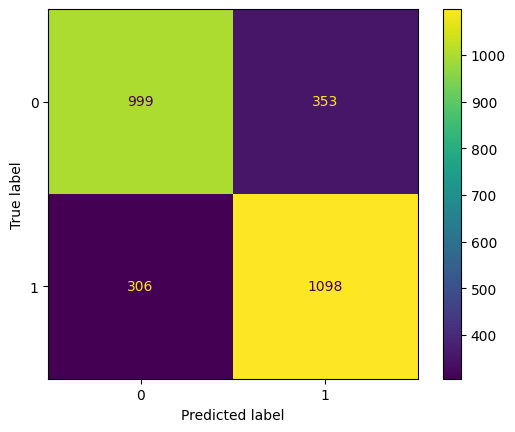

In [68]:
cmd_1=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_1,y_pred_1,labels=lr_1.classes_),display_labels=lr_1.classes_)
cmd_1.plot()

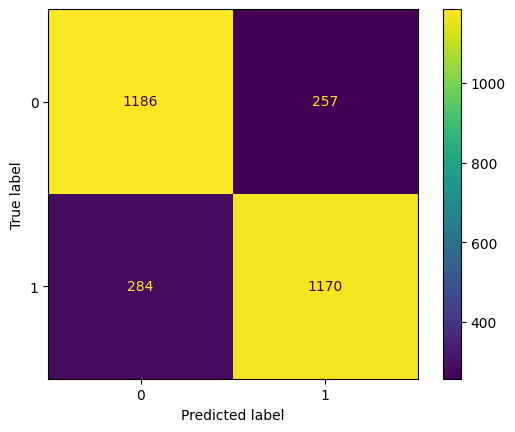

In [69]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()

In [38]:
fpr_lr_1, tpr_lr_1, thresholds_lr_1 = roc_curve(y_test_1, lr_1.predict_proba(X_test_scaled_1)[:,1])

In [39]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:,1])

## Baseline Model 2: Desicion Tree

In [34]:
DTC_1=DecisionTreeClassifier(random_state=42)
DTC_1.fit(X_train_scaled_1, y_train_1)
depth_1 = DTC_1.tree_.max_depth
print("Depth of the decision tree:", depth_1)
n_leaves_1 = DTC_1.get_n_leaves()
print("Number of leaves in the decision tree:", n_leaves_1)
y_pred_1 = DTC_1.predict(X_test_scaled_1)
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
print("ROC AUC score on the training data:",accuracy_1)

Depth of the decision tree: 23
Number of leaves in the decision tree: 1602
ROC AUC score on the training data: 0.7851959361393324


In [40]:
evaluate_model(y_test_1, y_pred_1)

--- Confusion Matrix ---
[[1040  312]
 [ 280 1124]]
--- f1 score ---
0.7915492957746478
--- Precision score ---
0.7827298050139275
--- Recall Score ---
0.8005698005698005
--- Accuracy Score ---
0.7851959361393324
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1352
           1       0.78      0.80      0.79      1404

    accuracy                           0.79      2756
   macro avg       0.79      0.78      0.78      2756
weighted avg       0.79      0.79      0.79      2756



In [41]:
DTC=DecisionTreeClassifier(random_state=42)
DTC.fit(X_train_scaled, y_train)
depth = DTC.tree_.max_depth
print("Depth of the decision tree:", depth)
n_leaves = DTC.get_n_leaves()
print("Number of leaves in the decision tree:", n_leaves)
y_pred = DTC.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("ROC AUC score on the training data:",accuracy)

Depth of the decision tree: 23
Number of leaves in the decision tree: 1277
ROC AUC score on the training data: 0.8405246807041767


In [42]:
evaluate_model(y_test, y_pred)

--- Confusion Matrix ---
[[1207  236]
 [ 226 1228]]
--- f1 score ---
0.8416723783413297
--- Precision score ---
0.8387978142076503
--- Recall Score ---
0.844566712517194
--- Accuracy Score ---
0.8405246807041767
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1443
           1       0.84      0.84      0.84      1454

    accuracy                           0.84      2897
   macro avg       0.84      0.84      0.84      2897
weighted avg       0.84      0.84      0.84      2897



In [76]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
max_depth_1 = [5, 10, 15, 20, 25, 30, 40, 50, None]
max_leaf_nodes_1 = [100, 200, 300, 400, 450, 500, 1000, None]
parameters_1 = dict(max_depth=max_depth_1, max_leaf_nodes=max_leaf_nodes_1)

# Create a StratifiedKFold object
stratified_k_fold_1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the GridSearchCV with StratifiedKFold cross-validation
Grid_DT_1 = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=parameters_1, cv=stratified_k_fold_1)

# Fit the GridSearchCV
Grid_DT_1.fit(X_train_scaled_1, y_train_1)

# Retrieve the best estimator
Best_DT_1 = Grid_DT_1.best_estimator_
print("Best Estimator:",Best_DT_1)


# Fit the best estimator on the entire training data
Best_DT_1.fit(X_train_scaled_1, y_train_1)

# Predict on the training set
train_predictions_1 = Best_DT_1.predict(X_train_scaled_1)

# Predict on the test set (assuming X_test_scaled_1 and y_test_1 are defined)
test_predictions_1 = Best_DT_1.predict(X_test_scaled_1)

# Calculate performance metrics
def print_metrics(y_true_1, y_pred_1, dataset_name):
    print(f"{dataset_name} Performance:")
    print("Accuracy:", accuracy_score(y_true_1, y_pred_1))
    print("Precision:", precision_score(y_true_1, y_pred_1, average='weighted'))
    print("Recall:", recall_score(y_true_1, y_pred_1, average='weighted'))
    print("F1 Score:", f1_score(y_true_1, y_pred_1, average='weighted'))
    print("ROC AUC Score:", roc_auc_score(y_true_1, y_pred_1, average='weighted', multi_class='ovo'))

# Print train performance
print_metrics(y_train_1, train_predictions_1, "Train")

# Print test performance
print_metrics(y_test_1, test_predictions_1, "Test")

Best Estimator: DecisionTreeClassifier(max_depth=15, max_leaf_nodes=100, random_state=42)
Train Performance:
Accuracy: 0.852658319724188
Precision: 0.8527064018161564
Recall: 0.852658319724188
F1 Score: 0.8526479607705933
ROC AUC Score: 0.8526250767810613
Test Performance:
Accuracy: 0.8066037735849056
Precision: 0.8069838109274482
Recall: 0.8066037735849056
F1 Score: 0.806615257051986
ROC AUC Score: 0.8068156914310761


In [77]:
best_index_1 = Grid_DT_1.best_index_
best_mean_validation_score_1 = Grid_DT_1.cv_results_['mean_test_score'][best_index_1]

print("Best Mean Validation Score: ", best_mean_validation_score_1)

Best Mean Validation Score:  0.8215384931952212


In [78]:
max_depth = [5, 10, 15, 20, 25, 30, 40, 50, None]
max_leaf_nodes = [100, 200, 300, 400, 450, 500, 1000, None]
parameters = dict(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
Grid_DT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=parameters, cv=stratified_k_fold)
Grid_DT.fit(X_train_scaled, y_train)
Best_DT = Grid_DT.best_estimator_
print("Best Estimator:",Best_DT)

Best_DT.fit(X_train_scaled, y_train)

train_predictions = Best_DT.predict(X_train_scaled)
test_predictions = Best_DT.predict(X_test_scaled)

# Calculate performance metrics
def print_metrics(y_true, y_predi, dataset_name):
    print(f"{dataset_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_predi))
    print("Precision:", precision_score(y_true, y_predi, average='weighted'))
    print("Recall:", recall_score(y_true, y_predi, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_predi, average='weighted'))
    print("ROC AUC Score:", roc_auc_score(y_true, y_predi, average='weighted', multi_class='ovo'))

print_metrics(y_train, train_predictions, "Train")
print_metrics(y_test, test_predictions, "Test")

Best Estimator: DecisionTreeClassifier(max_depth=20, max_leaf_nodes=200, random_state=42)
Train Performance:
Accuracy: 0.9115235217954252
Precision: 0.9117724155579586
Recall: 0.9115235217954252
F1 Score: 0.9115090017070991
ROC AUC Score: 0.911511721774364
Test Performance:
Accuracy: 0.8639972385226096
Precision: 0.8644492023193365
Recall: 0.8639972385226096
F1 Score: 0.8639656329209426
ROC AUC Score: 0.8640608124789693


In [79]:
best_index = Grid_DT.best_index_
best_mean_validation_score = Grid_DT.cv_results_['mean_test_score'][best_index]

print("Best Mean Validation Score: ", best_mean_validation_score)

Best Mean Validation Score:  0.8612861458782909


In [44]:
fpr_dc_1, tpr_dc_1, thresholds_dc_1 = roc_curve(y_test_1, DTC_1.predict_proba(X_test_scaled_1)[:,1])

In [45]:
fpr_dc, tpr_dc, thresholds_dc = roc_curve(y_test, DTC.predict_proba(X_test_scaled)[:,1])

## Baseline Model 3: Random Forest

In [35]:
RFC_1=RandomForestClassifier(random_state=42)
RFC_1=RFC_1.fit(X_train_scaled_1,y_train_1)

In [36]:
RFC=RandomForestClassifier(random_state=42)
RFC=RFC.fit(X_train_scaled,y_train)

In [37]:
y_pred_1 = RFC_1.predict(X_test_scaled_1)

In [38]:
y_pred = RFC.predict(X_test_scaled)

In [42]:
evaluate_model(y_test_1, y_pred_1)

--- Confusion Matrix ---
[[1153  199]
 [ 194 1210]]
--- f1 score ---
0.8602915037326696
--- Precision score ---
0.8587650816181689
--- Recall Score ---
0.8618233618233618
--- Accuracy Score ---
0.8574020319303338
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1352
           1       0.86      0.86      0.86      1404

    accuracy                           0.86      2756
   macro avg       0.86      0.86      0.86      2756
weighted avg       0.86      0.86      0.86      2756



In [48]:
evaluate_model(y_test, y_pred)

--- Confusion Matrix ---
[[1307  136]
 [ 189 1265]]
--- f1 score ---
0.8861646234676007
--- Precision score ---
0.9029264810849393
--- Recall Score ---
0.8700137551581844
--- Accuracy Score ---
0.8878149810148429
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1443
           1       0.90      0.87      0.89      1454

    accuracy                           0.89      2897
   macro avg       0.89      0.89      0.89      2897
weighted avg       0.89      0.89      0.89      2897



In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
max_depth_1 = [5, 10, 15, 20, 25, 30, 40, 50, None]
n_estimators_1 = [10, 100, 500, 700, 1000]
parameters_1 = dict(max_depth=max_depth_1, n_estimators=n_estimators_1)

stratified_k_fold_1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Grid_RF_1 = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=parameters_1, verbose=2, cv=stratified_k_fold_1)

Grid_RF_1.fit(X_train_scaled_1, y_train_1)

Best_RF_1 = Grid_RF_1.best_estimator_
print("Best Estimator:", Best_RF_1)

# Fit the best estimator on the entire training data
Best_RF_1.fit(X_train_scaled_1, y_train_1)


train_predictions_1 = Best_RF_1.predict(X_train_scaled_1)
test_predictions_1 = Best_RF_1.predict(X_test_scaled_1)


def print_metrics(y_true_1, y_pred_1, churn_copy):
    print(f"{churn_copy} Performance:")
    print("Accuracy:", accuracy_score(y_true_1, y_pred_1))
    print("Precision:", precision_score(y_true_1, y_pred_1, average='weighted'))
    print("Recall:", recall_score(y_true_1, y_pred_1, average='weighted'))
    print("F1 Score:", f1_score(y_true_1, y_pred_1, average='weighted'))
    print("ROC AUC Score:", roc_auc_score(y_true_1, y_pred_1, average='weighted', multi_class='ovo'))


print_metrics(y_train_1, train_predictions_1, "Train")
print_metrics(y_test_1, test_predictions_1, "Test")

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=100; total time=   1.2s
[CV] END ......................max_depth=5, n_estimators=100; total time=   1.2s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.9s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=100; total time=   0.8s
[CV] END ......................max_depth=5, n_estimators=500; total time=   4.2s
[CV] END ......................max_depth=5, n_e

In [89]:
best_index_1 = Grid_RF_1.best_index_
best_mean_validation_score_1 = Grid_RF_1.cv_results_['mean_test_score'][best_index_1]

print("Best Mean Validation Score: ", best_mean_validation_score_1)

Best Mean Validation Score:  0.8608234049820774


In [90]:


max_depth = [5, 10, 15, 20, 25, 30, 40, 50, None]
n_estimators = [10, 100, 500, 700, 1000]
parameters = dict(max_depth=max_depth, n_estimators=n_estimators)

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Grid_RF = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=parameters, verbose=2, cv=stratified_k_fold)

Grid_RF.fit(X_train_scaled, y_train)

Best_RF = Grid_RF.best_estimator_
print("Best Estimator:", Best_RF)

# Fit the best estimator on the entire training data
Best_RF.fit(X_train_scaled, y_train)


train_predictions = Best_RF.predict(X_train_scaled)
test_predictions = Best_RF.predict(X_test_scaled)


def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred, average='weighted', multi_class='ovo'))


print_metrics(y_train, train_predictions, "Train")
print_metrics(y_test, test_predictions, "Test")


Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=100; total time=   1.2s
[CV] END ......................max_depth=5, n_estimators=100; total time=   1.2s
[CV] END ......................max_depth=5, n_estimators=100; total time=   1.2s
[CV] END ......................max_depth=5, n_estimators=100; total time=   1.2s
[CV] END ......................max_depth=5, n_estimators=100; total time=   1.2s
[CV] END ......................max_depth=5, n_estimators=500; total time=   6.6s
[CV] END ......................max_depth=5, n_e

In [91]:
best_index = Grid_RF.best_index_
best_mean_validation_score = Grid_RF.cv_results_['mean_test_score'][best_index]

print("Best Mean Validation Score: ", best_mean_validation_score)

Best Mean Validation Score:  0.8854553301683211


In [52]:
fpr_rf_1, tpr_rf_1, thresholds_rf_1 = roc_curve(y_test_1, RFC_1.predict_proba(X_test_scaled_1)[:,1])

In [53]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, RFC.predict_proba(X_test_scaled)[:,1])

## Baseline Model 4: KNN

In [43]:
knn_1=KNeighborsClassifier(n_neighbors=3)

In [44]:
knn=KNeighborsClassifier(n_neighbors=3)

In [45]:
knn_1.fit(X_train_scaled_1,y_train_1)

KNeighborsClassifier(n_neighbors=3)

In [46]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
y_pred_1=knn_1.predict(X_test_scaled_1)

In [48]:
y_pred=knn.predict(X_test_scaled)

In [55]:
evaluate_model(y_test_1, y_pred_1)

--- Confusion Matrix ---
[[1071  281]
 [ 201 1203]]
--- f1 score ---
0.8331024930747921
--- Precision score ---
0.8106469002695418
--- Recall Score ---
0.8568376068376068
--- Accuracy Score ---
0.8251088534107403
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1352
           1       0.81      0.86      0.83      1404

    accuracy                           0.83      2756
   macro avg       0.83      0.82      0.82      2756
weighted avg       0.83      0.83      0.82      2756



In [56]:
evaluate_model(y_test, y_pred)

--- Confusion Matrix ---
[[1235  208]
 [ 228 1226]]
--- f1 score ---
0.8490304709141274
--- Precision score ---
0.8549511854951185
--- Recall Score ---
0.8431911966987621
--- Accuracy Score ---
0.8494994822229893
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1443
           1       0.85      0.84      0.85      1454

    accuracy                           0.85      2897
   macro avg       0.85      0.85      0.85      2897
weighted avg       0.85      0.85      0.85      2897



In [57]:
knn_1.score(X_train_scaled_1,y_train_1)

0.9060061694792234

In [58]:
knn.score(X_train_scaled,y_train)

0.921968062149331

In [104]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a StratifiedKFold object
stratified_k_fold_1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the GridSearchCV with StratifiedKFold cross-validation
Grid_KNN_1 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=stratified_k_fold_1, verbose=2)

# Fit the GridSearchCV
Grid_KNN_1.fit(X_train_scaled_1, y_train_1)

# Retrieve the best estimator
Best_KNN_1 = Grid_KNN_1.best_estimator_
print("Best Estimator:", Best_KNN_1)

# Fit the best estimator on the entire training data
Best_KNN_1.fit(X_train_scaled_1, y_train_1)

# Predict on the training set
train_predictions_1 = Best_KNN_1.predict(X_train_scaled_1)

# Predict on the test set (assuming X_test_scaled_1 and y_test_1 are defined)
test_predictions_1 = Best_KNN_1.predict(X_test_scaled_1)

# Calculate performance metrics
def print_metrics(y_true_1, y_pred_1, churn_copy):
    print(f"{churn_copy} Performance:")
    print("Accuracy:", accuracy_score(y_true_1, y_pred_1))
    print("Precision:", precision_score(y_true_1, y_pred_1, average='weighted'))
    print("Recall:", recall_score(y_true_1, y_pred_1, average='weighted'))
    print("F1 Score:", f1_score(y_true_1, y_pred_1, average='weighted'))
    print("ROC AUC Score:", roc_auc_score(y_true_1, y_pred_1, average='weighted', multi_class='ovo'))

# Print train performance
print_metrics(y_train_1, train_predictions_1, "Train")

# Print test performance
print_metrics(y_test_1, test_predictions_1, "Test")


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.2s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.4s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.2s
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=   0.4s
[CV] END .....algorithm=auto, n_neighbors=5, we

In [105]:
best_index_1 = Grid_KNN_1.best_index_
best_mean_validation_score_1 = Grid_KNN_1.cv_results_['mean_test_score'][best_index_1]

print("Best Mean Validation Score: ", best_mean_validation_score_1)

Best Mean Validation Score:  0.8312466305336411


In [106]:

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=stratified_k_fold, verbose=2)

Grid_KNN.fit(X_train_scaled, y_train)

Best_KNN = Grid_KNN.best_estimator_
print("Best Estimator:", Best_KNN)

Best_KNN.fit(X_train_scaled, y_train)

train_predictions = Best_KNN.predict(X_train_scaled)
test_predictions = Best_KNN.predict(X_test_scaled)

# Calculate performance metrics
def print_metrics(y_true, y_pred, churn):
    print(f"{churn} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred, average='weighted', multi_class='ovo'))

print_metrics(y_train, train_predictions, "Train")
print_metrics(y_test, test_predictions, "Test")


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.1s
[CV] END .....algorithm=auto, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END .....algorithm=auto, n_neighbors=5, we

In [107]:
best_index = Grid_KNN.best_index_
best_mean_validation_score = Grid_KNN.cv_results_['mean_test_score'][best_index]

print("Best Mean Validation Score: ", best_mean_validation_score)

Best Mean Validation Score:  0.8524816573154943


In [64]:
fpr_knn_1, tpr_knn_1, thresholds_knn_1 = roc_curve(y_test_1, knn_1.predict_proba(X_test_scaled_1)[:,1])

In [65]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:,1])

## Baseline Model 5: SVM

In [49]:
svc_1=SVC()

In [50]:
svc=SVC()

In [51]:
svc_1.fit(X_train_scaled_1,y_train_1)

SVC()

In [52]:
svc.fit(X_train_scaled,y_train)

SVC()

In [53]:
y_pred_1 = svc_1.predict(X_test_scaled_1)

In [54]:
y_pred = svc.predict(X_test_scaled)

In [65]:
evaluate_model(y_test_1, y_pred_1)

--- Confusion Matrix ---
[[1130  222]
 [ 246 1158]]
--- f1 score ---
0.8318965517241379
--- Precision score ---
0.8391304347826087
--- Recall Score ---
0.8247863247863247
--- Accuracy Score ---
0.8301886792452831
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1352
           1       0.84      0.82      0.83      1404

    accuracy                           0.83      2756
   macro avg       0.83      0.83      0.83      2756
weighted avg       0.83      0.83      0.83      2756



In [66]:
evaluate_model(y_test, y_pred)

--- Confusion Matrix ---
[[1301  142]
 [ 225 1229]]
--- f1 score ---
0.8700884955752212
--- Precision score ---
0.8964259664478483
--- Recall Score ---
0.8452544704264099
--- Accuracy Score ---
0.8733172247152227
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1443
           1       0.90      0.85      0.87      1454

    accuracy                           0.87      2897
   macro avg       0.87      0.87      0.87      2897
weighted avg       0.87      0.87      0.87      2897



In [119]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create a StratifiedKFold object
stratified_k_fold_1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the GridSearchCV with StratifiedKFold cross-validation
Grid_SVM_1 = GridSearchCV(SVC(probability=True), param_grid=param_grid, cv=stratified_k_fold_1, verbose=2)

# Fit the GridSearchCV
Grid_SVM_1.fit(X_train_scaled_1, y_train_1)

# Retrieve the best estimator
Best_SVM_1 = Grid_SVM_1.best_estimator_
print("Best Estimator:", Best_SVM_1)

# Fit the best estimator on the entire training data
Best_SVM_1.fit(X_train_scaled_1, y_train_1)


train_predictions_1 = Best_SVM_1.predict(X_train_scaled_1)

test_predictions_1 = Best_SVM_1.predict(X_test_scaled_1)

# Calculate performance metrics
def print_metrics(y_true_1, y_pred_1, churn_copy):
    print(f"{churn_copy} Performance:")
    print("Accuracy:", accuracy_score(y_true_1, y_pred_1))
    print("Precision:", precision_score(y_true_1, y_pred_1, average='weighted'))
    print("Recall:", recall_score(y_true_1, y_pred_1, average='weighted'))
    print("F1 Score:", f1_score(y_true_1, y_pred_1, average='weighted'))
    #print("ROC AUC Score:", roc_auc_score(y_true_1, Best_SVM_1.predict_proba(X_test_scaled_1)[:, 1]))

print_metrics(y_train_1, train_predictions_1, "Train")
print_metrics(y_test_1, test_predictions_1, "Test")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  12.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  11.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  10.9s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  11.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  12.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  13.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  12.6s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  13.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  13.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  13.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  14.2s
[CV] END .....................C=0.1, gamma=scal

In [120]:
best_index_1 = Grid_SVM_1.best_index_
best_mean_validation_score_1 = Grid_SVM_1.cv_results_['mean_test_score'][best_index_1]

print("Best Mean Validation Score: ", best_mean_validation_score_1)

Best Mean Validation Score:  0.8363276829182974


In [121]:

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create a StratifiedKFold object
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the GridSearchCV with StratifiedKFold cross-validation
Grid_SVM = GridSearchCV(SVC(probability=True), param_grid=param_grid, cv=stratified_k_fold, verbose=2)

Grid_SVM.fit(X_train_scaled, y_train)

# Retrieve the best estimator
Best_SVM = Grid_SVM.best_estimator_
print("Best Estimator:", Best_SVM)

# Fit the best estimator on the entire training data
Best_SVM.fit(X_train_scaled, y_train)


train_predictions = Best_SVM.predict(X_train_scaled)

test_predictions = Best_SVM.predict(X_test_scaled)

# Calculate performance metrics
def print_metrics(y_true, y_pred, churn):
    print(f"{churn} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    #print("ROC AUC Score:", roc_auc_score(y_true, Best_SVM.predict_proba(X_test_scaled)[:, 1]))

print_metrics(y_train, train_predictions, "Train")
print_metrics(y_test, test_predictions, "Test")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  12.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  12.8s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  12.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  13.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  12.9s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  14.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  14.2s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  14.3s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  16.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=  14.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  17.2s
[CV] END .....................C=0.1, gamma=scal

In [122]:
best_index = Grid_SVM.best_index_
best_mean_validation_score = Grid_SVM.cv_results_['mean_test_score'][best_index]

print("Best Mean Validation Score: ", best_mean_validation_score)

Best Mean Validation Score:  0.8775140267587396


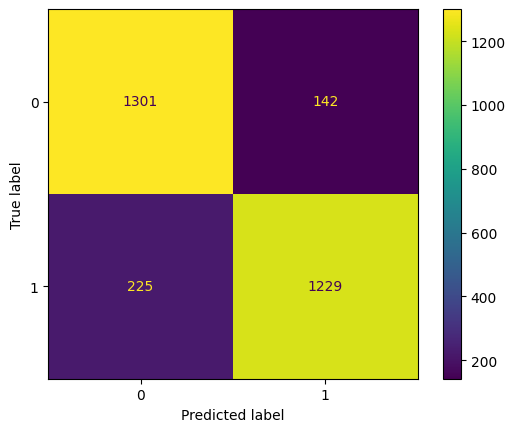

In [123]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=svc.classes_),display_labels=svc.classes_)
cmd.plot()

## Baseline Model 6: XGBoost

In [55]:
xgb_1 = XGBClassifier()
xgb_1.fit(X_train_scaled_1, y_train_1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
y_pred_1 = xgb_1.predict(X_test_scaled_1)

In [58]:
y_pred = xgb.predict(X_test_scaled)

In [71]:
evaluate_model(y_test_1, y_pred_1)

--- Confusion Matrix ---
[[1160  192]
 [ 200 1204]]
--- f1 score ---
0.86
--- Precision score ---
0.8624641833810889
--- Recall Score ---
0.8575498575498576
--- Accuracy Score ---
0.8577648766328012
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1352
           1       0.86      0.86      0.86      1404

    accuracy                           0.86      2756
   macro avg       0.86      0.86      0.86      2756
weighted avg       0.86      0.86      0.86      2756



In [72]:
evaluate_model(y_test, y_pred)

--- Confusion Matrix ---
[[1309  134]
 [ 167 1287]]
--- f1 score ---
0.895304347826087
--- Precision score ---
0.9057002111189303
--- Recall Score ---
0.8851444291609354
--- Accuracy Score ---
0.8960994131860546
--- Classification Report ---
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1443
           1       0.91      0.89      0.90      1454

    accuracy                           0.90      2897
   macro avg       0.90      0.90      0.90      2897
weighted avg       0.90      0.90      0.90      2897



In [87]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the parameter grid
param_grid = {
    'max_depth': [5, 6, 7, 8],
    'gamma': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300]
}

# Create a StratifiedKFold object
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold cross-validation
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=stratified_k_fold, scoring='roc_auc', verbose=2, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best estimator
best_model = grid_search.best_estimator_
print("Best Estimator:", best_model)

# Fit the best estimator on the entire training data
best_model.fit(X_train_scaled, y_train)

# Predict on the training set
train_predictions = best_model.predict(X_train_scaled)

# Predict on the test set
test_predictions = best_model.predict(X_test_scaled)

# Calculate performance metrics
def print_metrics(y_true, y_pred, dataset_name):
    print(f"{dataset_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    #print("ROC AUC Score:", roc_auc_score(y_true, best_model.predict_proba(X_test_scaled)[:, 1]))

# Print train performance
print_metrics(y_train, train_predictions, "Train")

# Print test performance
print_metrics(y_test, test_predictions, "Test")


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[08:45:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


[08:45:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



Train Performance:
Accuracy: 0.9728959861890375
Precision: 0.9729069118315071
Recall: 0.9728959861890375
F1 Score: 0.9728957656583183
Test Performance:
Accuracy: 0.8940283051432516
Precision: 0.8941943426575323
Recall: 0.8940283051432516
F1 Score: 0.8940217137054352


In [88]:
best_index = grid_search.best_index_
best_mean_validation_score_1 = grid_search.cv_results_['mean_test_score'][best_index]

print("Best Mean Validation Score: ", best_mean_validation_score_1)

Best Mean Validation Score:  0.9543030698403907


In [89]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the parameter grid
param_grid = {
    'max_depth': [5, 6, 7, 8],
    'gamma': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 5, 10],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300]
}

# Create a StratifiedKFold object
stratified_k_fold_1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold cross-validation
xgb_clf_1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search_1 = GridSearchCV(estimator=xgb_clf_1, param_grid=param_grid, cv=stratified_k_fold_1, scoring='roc_auc', verbose=2, n_jobs=-1)

# Fit the GridSearchCV
grid_search_1.fit(X_train_scaled_1, y_train_1)

# Retrieve the best estimator
best_model_1 = grid_search_1.best_estimator_
print("Best Estimator:", best_model_1)

# Fit the best estimator on the entire training data
best_model_1.fit(X_train_scaled_1, y_train_1)

# Predict on the training set
train_predictions_1 = best_model_1.predict(X_train_scaled_1)

# Predict on the test set
test_predictions_1 = best_model_1.predict(X_test_scaled_1)

# Calculate performance metrics
def print_metrics(y_true_1, y_pred_1, dataset_name):
    print(f"{dataset_name} Performance:")
    print("Accuracy:", accuracy_score(y_true_1, y_pred_1))
    print("Precision:", precision_score(y_true_1, y_pred_1, average='weighted'))
    print("Recall:", recall_score(y_true_1, y_pred_1, average='weighted'))
    print("F1 Score:", f1_score(y_true_1, y_pred_1, average='weighted'))
    #print("ROC AUC Score:", roc_auc_score(y_true_1, best_model.predict_proba(X_test_scaled_1)[:, 1]))

# Print train performance
print_metrics(y_train_1, train_predictions_1, "Train")

# Print test performance
print_metrics(y_test_1, test_predictions_1, "Test")


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[08:59:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)


[08:59:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



Train Performance:
Accuracy: 0.9885683179096353
Precision: 0.9885971059573131
Recall: 0.9885683179096353
F1 Score: 0.9885683574316406
Test Performance:
Accuracy: 0.8537735849056604
Precision: 0.8538137470464077
Recall: 0.8537735849056604
F1 Score: 0.8537440514430896


In [90]:
best_index_1 = grid_search.best_index_
best_mean_validation_score_1 = grid_search.cv_results_['mean_test_score'][best_index_1]

print("Best Mean Validation Score: ", best_mean_validation_score_1)

Best Mean Validation Score:  0.9543030698403907


In [80]:
fpr_xgb_1, tpr_xgb_1, thresholds_xgb_1 = roc_curve(y_test_1, xgb_1.predict_proba(X_test_scaled_1)[:,1])

In [81]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb.predict_proba(X_test_scaled)[:,1])

#Cost strategy

## 1.All customers are predicted to be retained

Confusion Matrix for Do Nothing (Most Frequent):


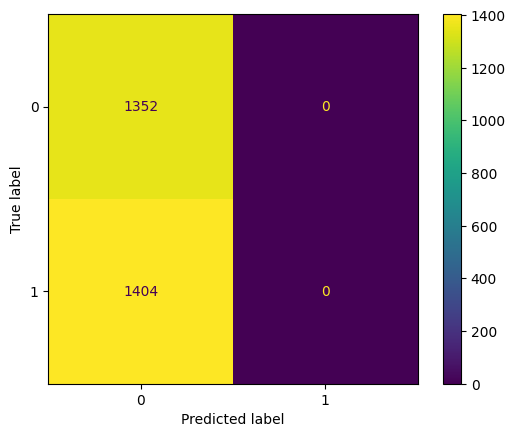

In [82]:
from sklearn.dummy import DummyClassifier
# Strategy 1: Do Nothing (Most Frequent Class)
dummy_most_frequent_1 = DummyClassifier()
dummy_most_frequent_1.fit(X_train_scaled_1, y_train_1)
y_pred_most_frequent_1 = dummy_most_frequent_1.predict(X_test_scaled_1)

# Confusion Matrix for Do Nothing

cm_most_frequent_1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_1, y_pred_most_frequent_1))
print("Confusion Matrix for Do Nothing (Most Frequent):")
cm_most_frequent_1.plot()

Confusion Matrix for Do Nothing (Most Frequent):


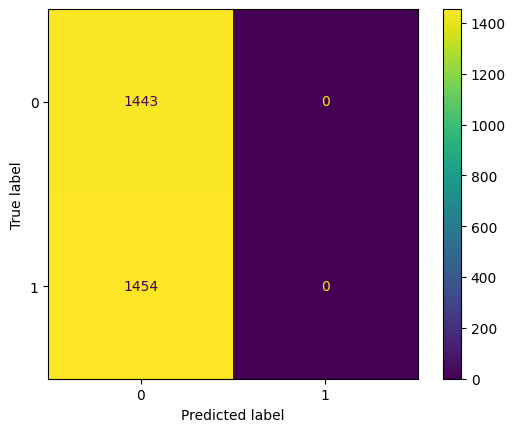

In [83]:
from sklearn.dummy import DummyClassifier

# Strategy 1: Do Nothing (Most Frequent Class)
dummy_most_frequent = DummyClassifier()
dummy_most_frequent.fit(X_train_scaled, y_train)
y_pred_most_frequent = dummy_most_frequent.predict(X_test_scaled)

# Confusion Matrix for Do Nothing

cm_most_frequent = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_most_frequent))
print("Confusion Matrix for Do Nothing (Most Frequent):")
cm_most_frequent.plot()

In [84]:
dummy_train_score_1 =dummy_most_frequent_1.score(X_train_scaled_1,y_train_1)
dummy_test_score_1 = dummy_most_frequent_1.score(X_test_scaled_1, y_test_1)

print("Dummy Training Score: {:.2f}%".format(100*dummy_train_score_1))
print("Dummy Test Score: {:.2f}%".format(100*dummy_test_score_1))

Dummy Training Score: 50.24%
Dummy Test Score: 49.06%


In [85]:
dummy_train_score =dummy_most_frequent.score(X_train_scaled,y_train)
dummy_test_score = dummy_most_frequent.score(X_test_scaled, y_test)

print("Dummy Training Score: {:.2f}%".format(100*dummy_train_score))
print("Dummy Test Score: {:.2f}%".format(100*dummy_test_score))

Dummy Training Score: 50.05%
Dummy Test Score: 49.81%


## 2.All customers are predicted to churn

Confusion Matrix for Retain All (Predict All Will Churn):


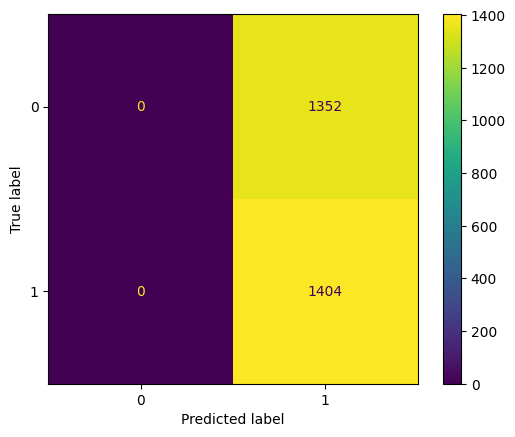

In [86]:
# Strategy 2: Retain All (Predict All Will Churn)
dummy_constant_1 = DummyClassifier(strategy="constant", constant=1)
dummy_constant_1.fit(X_train_scaled_1, y_train_1)
y_pred_constant_1 = dummy_constant_1.predict(X_test_scaled_1)

# Confusion Matrix for Retain All
cm_constant_1 = ConfusionMatrixDisplay(confusion_matrix(y_test_1, y_pred_constant_1))
print("Confusion Matrix for Retain All (Predict All Will Churn):")
cm_constant_1.plot()

Confusion Matrix for Retain All (Predict All Will Churn):


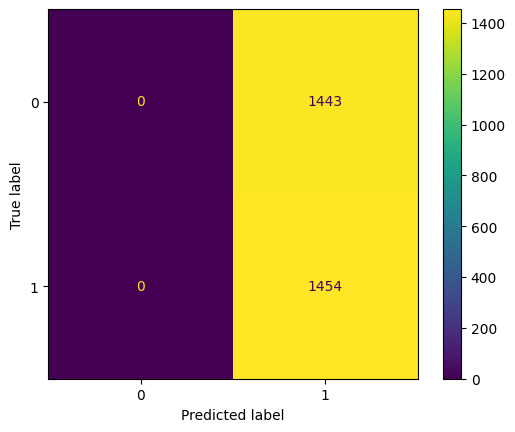

In [87]:
# Strategy 2: Retain All (Predict All Will Churn)
dummy_constant = DummyClassifier(strategy="constant", constant=1)
dummy_constant.fit(X_train_scaled, y_train)
y_pred_constant = dummy_constant.predict(X_test_scaled)

# Confusion Matrix for Retain All
cm_constant = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_constant))
print("Confusion Matrix for Retain All (Predict All Will Churn):")
cm_constant.plot()

In [88]:
dummy_train_score_1 =dummy_constant_1.score(X_train_scaled_1,y_train_1)
dummy_test_score_1 = dummy_constant_1.score(X_test_scaled_1, y_test_1)

print("Dummy Training Score: {:.2f}%".format(100*dummy_train_score_1))
print("Dummy Test Score: {:.2f}%".format(100*dummy_test_score_1))

Dummy Training Score: 49.76%
Dummy Test Score: 50.94%


In [89]:
dummy_train_score =dummy_constant.score(X_train_scaled,y_train)
dummy_test_score = dummy_constant.score(X_test_scaled, y_test)

print("Dummy Training Score: {:.2f}%".format(100*dummy_train_score))
print("Dummy Test Score: {:.2f}%".format(100*dummy_test_score))

Dummy Training Score: 49.95%
Dummy Test Score: 50.19%


In [90]:
fpr_dum_1, tpr_dum_1, thresholds_dum_1 = roc_curve(y_test_1, dummy_constant_1.predict_proba(X_test_scaled_1)[:,1])

In [91]:
fpr_dum, tpr_dum, thresholds_dum = roc_curve(y_test, dummy_constant.predict_proba(X_test_scaled)[:,1])

#ROC curve of models

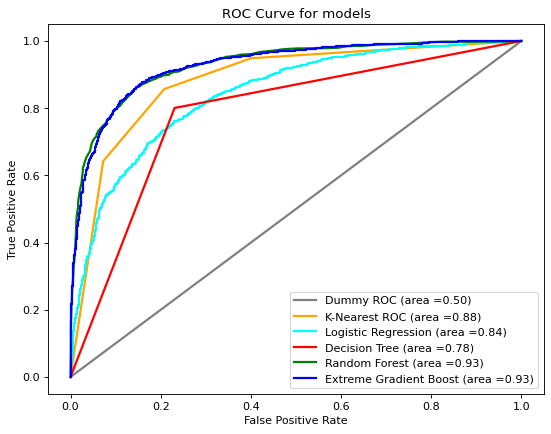

In [92]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(fpr_dum_1, tpr_dum_1,lw=2, c= 'gray',label = "Dummy ROC (area ={:.2f})".format(roc_auc_score(y_test_1, dummy_constant_1.predict_proba(X_test_scaled_1)[:,1])))
plt.plot(fpr_knn_1, tpr_knn_1,lw=2, c='orange', label = "K-Nearest ROC (area ={:.2f})".format(roc_auc_score(y_test_1, knn_1.predict_proba(X_test_scaled_1)[:,1])))
plt.plot(fpr_lr_1, tpr_lr_1,lw=2, c='cyan',label = "Logistic Regression (area ={:.2f})".format(roc_auc_score(y_test_1, lr_1.predict_proba(X_test_scaled_1)[:,1])))
plt.plot(fpr_dc_1, tpr_dc_1,lw=2, c='red', label = "Decision Tree (area ={:.2f})".format(roc_auc_score(y_test_1, DTC_1.predict_proba(X_test_scaled_1)[:,1])))
plt.plot(fpr_rf_1, tpr_rf_1,lw=2, c='green',label = "Random Forest (area ={:.2f})".format(roc_auc_score(y_test_1, RFC_1.predict_proba(X_test_scaled_1)[:,1])))
plt.plot(fpr_xgb_1, tpr_xgb_1,lw=2, c='blue',label = "Extreme Gradient Boost (area ={:.2f})".format(roc_auc_score(y_test_1, xgb_1.predict_proba(X_test_scaled_1)[:,1])))
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for models');
plt.legend(loc='lower right')
plt.savefig("ROC Curve.png")

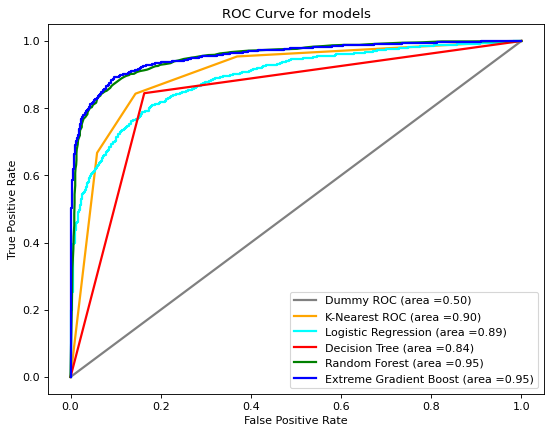

In [93]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(fpr_dum, tpr_dum,lw=2, c= 'gray',label = "Dummy ROC (area ={:.2f})".format(roc_auc_score(y_test, dummy_constant.predict_proba(X_test_scaled)[:,1])))
plt.plot(fpr_knn, tpr_knn,lw=2, c='orange', label = "K-Nearest ROC (area ={:.2f})".format(roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:,1])))
plt.plot(fpr_lr, tpr_lr,lw=2, c='cyan',label = "Logistic Regression (area ={:.2f})".format(roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1])))
plt.plot(fpr_dc, tpr_dc,lw=2, c='red', label = "Decision Tree (area ={:.2f})".format(roc_auc_score(y_test, DTC.predict_proba(X_test_scaled)[:,1])))
plt.plot(fpr_rf, tpr_rf,lw=2, c='green',label = "Random Forest (area ={:.2f})".format(roc_auc_score(y_test, RFC.predict_proba(X_test_scaled)[:,1])))
plt.plot(fpr_xgb, tpr_xgb,lw=2, c='blue',label = "Extreme Gradient Boost (area ={:.2f})".format(roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:,1])))
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for models');
plt.legend(loc='lower right')
plt.savefig("ROC Curve.png")

#Cost modeling

In [94]:
#Assume everyone churns

new_pred_ones_1 = np.ones(shape=(2756,))

conf_1 = confusion_matrix(y_test_1, new_pred_ones_1)

total_cost_1 = (conf_1[0,1] * 150) + (conf_1[1,1] * 150) + conf_1[1,0] * 750
total_savings_1 = conf_1[1,1] * 750

net_gain_1 = total_savings_1 - total_cost_1
print(net_gain_1)

conf_1

639600


array([[   0, 1352],
       [   0, 1404]])

In [95]:
#Assume everyone churns

new_pred_ones = np.ones(shape=(2897,))

conf = confusion_matrix(y_test, new_pred_ones)

total_cost = (conf[0,1] * 150) + (conf[1,1] * 150) + conf[1,0] * 750
total_savings = conf[1,1] * 750

net_gain = total_savings - total_cost
print(net_gain)

conf

655950


array([[   0, 1443],
       [   0, 1454]])

In [96]:
#Assume no one churns

new_pred_zeros_1 = np.zeros(shape=(2756,))

conf_1 = confusion_matrix(y_test_1, new_pred_zeros_1)

total_cost_1 = (conf_1[0,1] * 150) + (conf_1[1,1] * 150) + conf_1[1,0] * 750
total_savings_1 = conf_1[1,1] * 750

net_gain_1 = total_savings_1 - total_cost_1
print(net_gain_1)

conf_1

-1053000


array([[1352,    0],
       [1404,    0]])

In [97]:
#Assume no one churns

new_pred_zeros = np.zeros(shape=(2897,))

conf = confusion_matrix(y_test, new_pred_zeros)

total_cost = (conf[0,1] * 150) + (conf[1,1] * 150) + conf[1,0] * 750
total_savings = conf[1,1] * 750

net_gain = total_savings - total_cost
print(net_gain)

conf

-1090500


array([[1443,    0],
       [1454,    0]])

Every classification model is sent into the function below and a cost is associated with every probability threshold. A max saving can be found to determine the best classification model.

A cost function needed to be created that would rate each model based on euros saved and lost.

In [98]:
def model_cost_1(model_1):

    savings_1 = []
    idx_1 = []
    for i in np.arange(0,1,0.01):
        y_predict_1 = (model_1.predict_proba(X_test_scaled_1)[:, 1] >= i)
        cf_matrix_1 = confusion_matrix(y_test_1, y_predict_1)
        total_cost_1 = (cf_matrix_1[0][1] * 150) + (cf_matrix_1[1][1] * 150) + cf_matrix_1[1][0] * 750
        total_savings_1 = cf_matrix_1[1][1] * 750
        savings_1.append(total_savings_1 - total_cost_1)
        idx_1.append(i)

    print('Max savings = {:d}'.format(max(savings_1)))
    return (savings_1,idx_1)

In [99]:
def model_cost(model):

    savings = []
    idx = []
    for i in np.arange(0,1,0.01):
        y_predict = (model.predict_proba(X_test_scaled)[:, 1] >= i)
        cf_matrix = confusion_matrix(y_test, y_predict)
        total_cost = (cf_matrix[0][1] * 150) + (cf_matrix[1][1] * 150) + cf_matrix[1][0] * 750
        total_savings = cf_matrix[1][1] * 750
        savings.append(total_savings - total_cost)
        idx.append(i)

    print('Max savings = {:d}'.format(max(savings)))
    return (savings,idx)

In [100]:
#Baseline Model
dum_savings_1,dum_idx_1 = model_cost_1(dummy_constant_1)

Max savings = 639600


In [101]:
#Baseline Model
dum_savings,dum_idx = model_cost(dummy_constant)

Max savings = 655950


In [102]:
#K-nearest
knn_savings_1,knn_idx_1 = model_cost_1(knn_1)

Max savings = 663900


In [103]:
#K-nearest
knn_savings,knn_idx = model_cost(knn)

Max savings = 702000


In [104]:
#Logistic Regression
lr_savings_1,lr_idx_1 = model_cost_1(lr_1)

Max savings = 655050


In [105]:
#Logistic Regression
lr_savings,lr_idx = model_cost(lr)

Max savings = 672900


In [106]:
#Decision Tree
dc_savings_1,dc_idx_1 = model_cost_1(DTC_1)

Max savings = 639600


In [107]:
#Decision Tree
dc_savings,dc_idx = model_cost(DTC)

Max savings = 655950


In [108]:
#Random Forest
rf_savings_1,rf_idx_1 = model_cost_1(RFC_1)

Max savings = 699900


In [109]:
#Random Forest
rf_savings,rf_idx = model_cost(RFC)

Max savings = 730500


In [110]:
#XG Boost
xgb_savings_1,xgb_idx_1 = model_cost_1(xgb_1)

Max savings = 692400


In [111]:
#XG Boost
xgb_savings,xgb_idx = model_cost(xgb)

Max savings = 726750


Threshold of the max saving of the Random Forest model

In [112]:
res_list_1 = list(zip(rf_savings_1,rf_idx_1))
res_df_1 = pd.DataFrame(res_list_1, columns =['saving/loss', 'thresh'])
res_df_1[res_df_1['saving/loss']==max(res_df_1['saving/loss'])]

saving/loss  thresh
18       699900    0.18

In [113]:
res_list = list(zip(rf_savings,rf_idx))
res_df = pd.DataFrame(res_list, columns =['saving/loss', 'thresh'])
res_df[res_df['saving/loss']==max(res_df['saving/loss'])]

saving/loss  thresh
19       730500    0.19
20       730500    0.20

In [114]:
def make_confusion_matrix_1(model_1, threshold=0.19):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model_1.predict(X_val) does this automatically with a threshold of 0.5)
    y_predict_1 = (model_1.predict_proba(X_test_scaled_1)[:, 1] >= threshold)
    exited_confusion_1 = confusion_matrix(y_test_1, y_predict_1)
    plt.figure(dpi=80)
    sns.heatmap(exited_confusion_1, annot=True, square=True, fmt='d',
           xticklabels=['Retained', 'Exited'],
           yticklabels=['Retained', 'Exited']);
    plt.title('Random Forest Confusion Matrix');
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

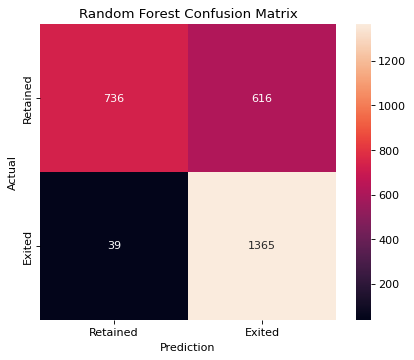

In [115]:
make_confusion_matrix_1(RFC_1)

Cost analysis of each model showing the saving or loss versus the probability threshold. To maximize savings the Random Forest model at a threshold of 19% will yeild the highest saving.

In [116]:
def make_confusion_matrix(model, threshold=0.18):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_val) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_scaled)[:, 1] >= threshold)
    exited_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(exited_confusion, annot=True, square=True, fmt='d',
           xticklabels=['Retained', 'Exited'],
           yticklabels=['Retained', 'Exited']);
    plt.title('Random Forest Confusion Matrix');
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

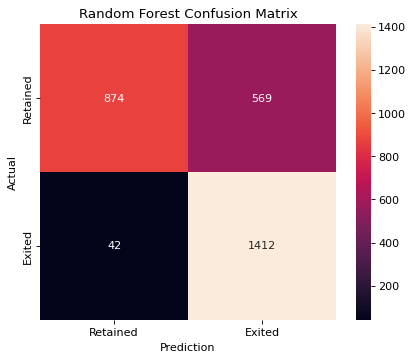

In [117]:
make_confusion_matrix(RFC)

Cost analysis of each model showing the saving or loss versus the probability threshold. To maximize savings the Random Forest model at a threshold of 18% will yeild the highest saving.

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


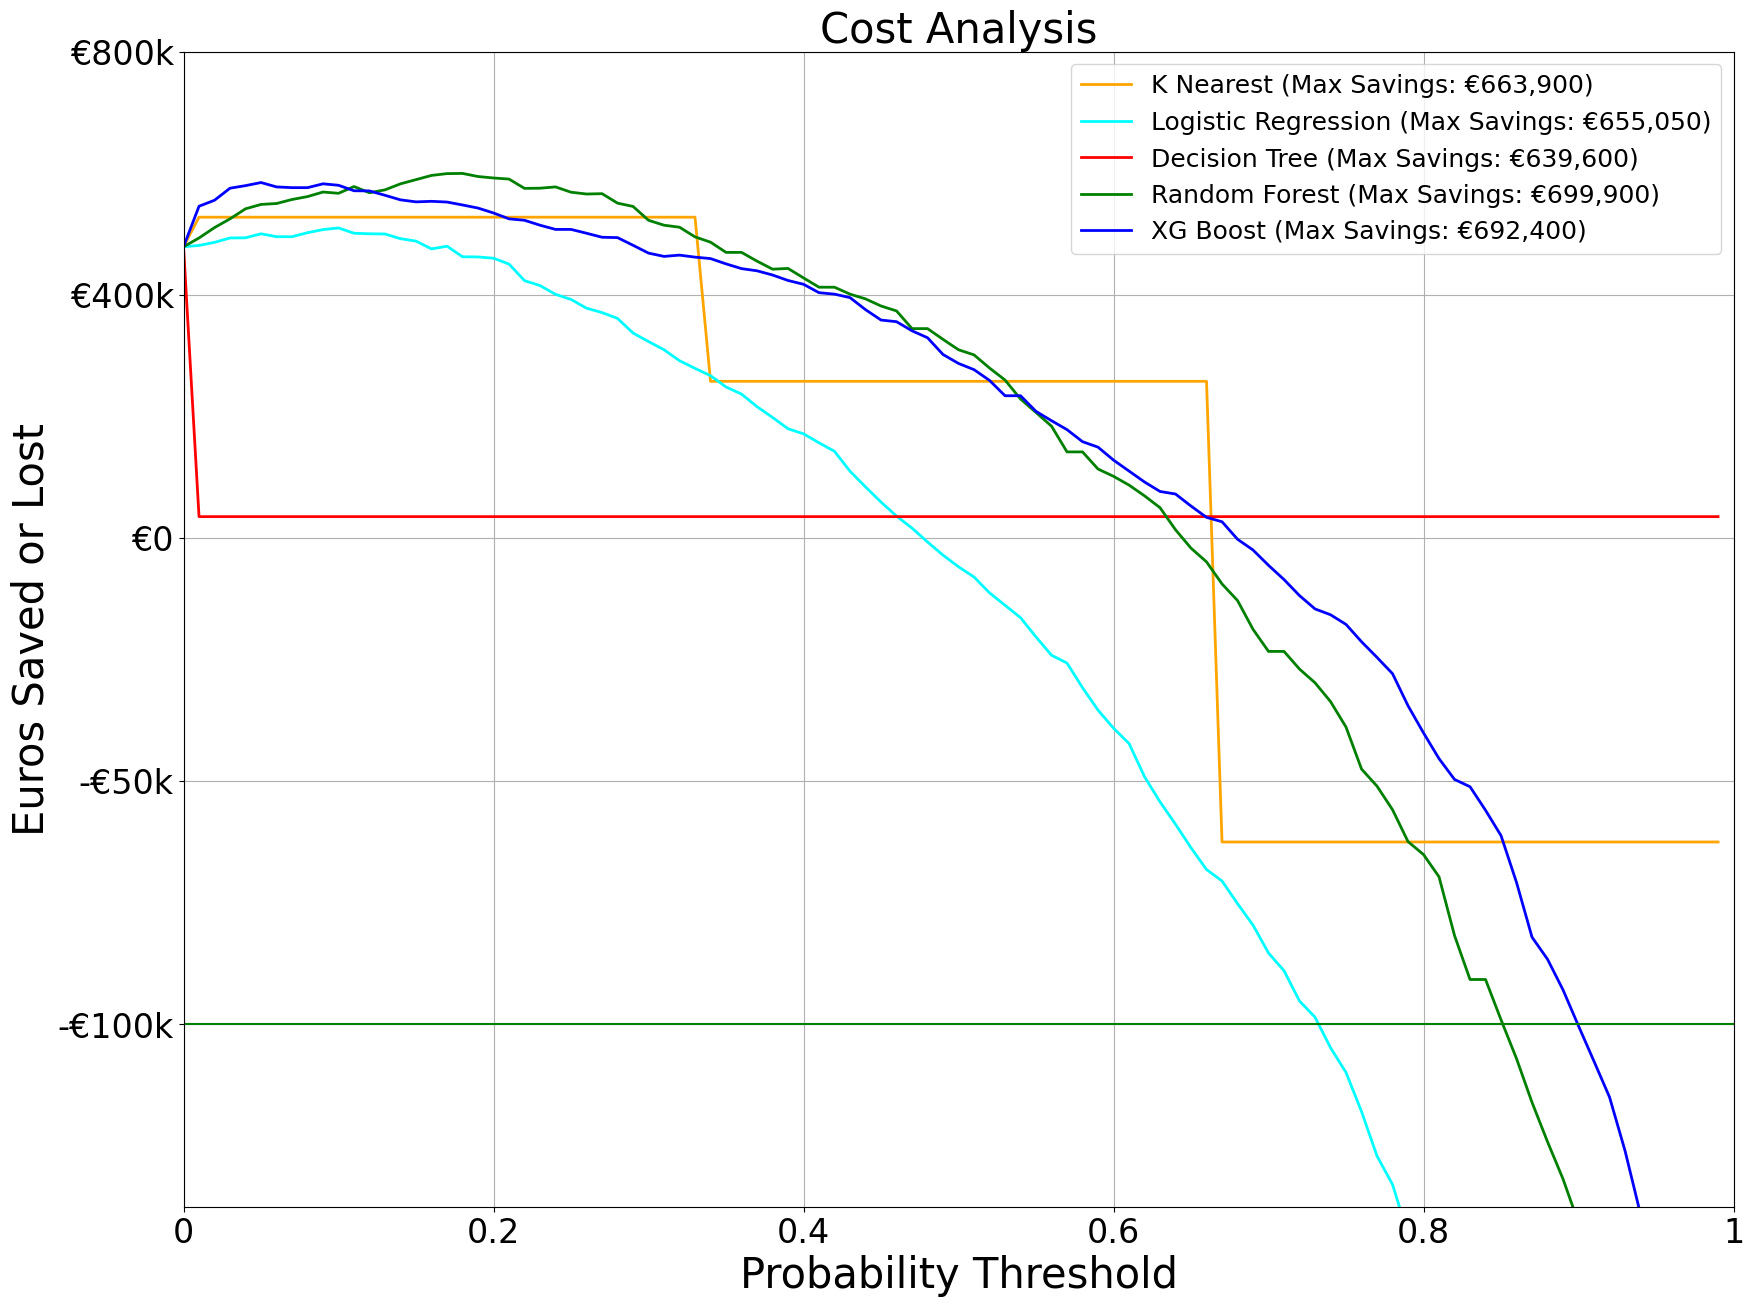

In [118]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.plot(knn_idx_1, knn_savings_1, label='K Nearest (Max Savings: €{:,})'.format(max(knn_savings_1)), color='orange', lw=2)
plt.plot(lr_idx_1, lr_savings_1, label='Logistic Regression (Max Savings: €{:,})'.format(max(lr_savings_1)), color='cyan', lw=2)
plt.plot(dc_idx_1, dc_savings_1, label='Decision Tree (Max Savings: €{:,})'.format(max(dc_savings_1)), color='red', lw=2)
plt.plot(rf_idx_1, rf_savings_1, label='Random Forest (Max Savings: €{:,})'.format(max(rf_savings_1)), color='green', lw=2)
plt.plot(xgb_idx_1, xgb_savings_1, label='XG Boost (Max Savings: €{:,})'.format(max(xgb_savings_1)), color='blue', lw=2)
ax.axhline(y=0, color='green')
plt.grid()
ax.set_xbound(lower=0, upper=1)
ax.set_ybound(lower=-150000, upper=800000)
ax.set_yticklabels( ['-€150K','-€100k','-€50k', '€0', '€400k', '€800k'], fontsize=24)
ax.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1'], fontsize=24)
plt.xlabel('Probability Threshold', fontsize=30)
plt.ylabel('Euros Saved or Lost',fontsize=30)
plt.legend(fontsize=18)
plt.title('Cost Analysis',fontsize=30);
plt.savefig('Cost_Analysis.png')

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


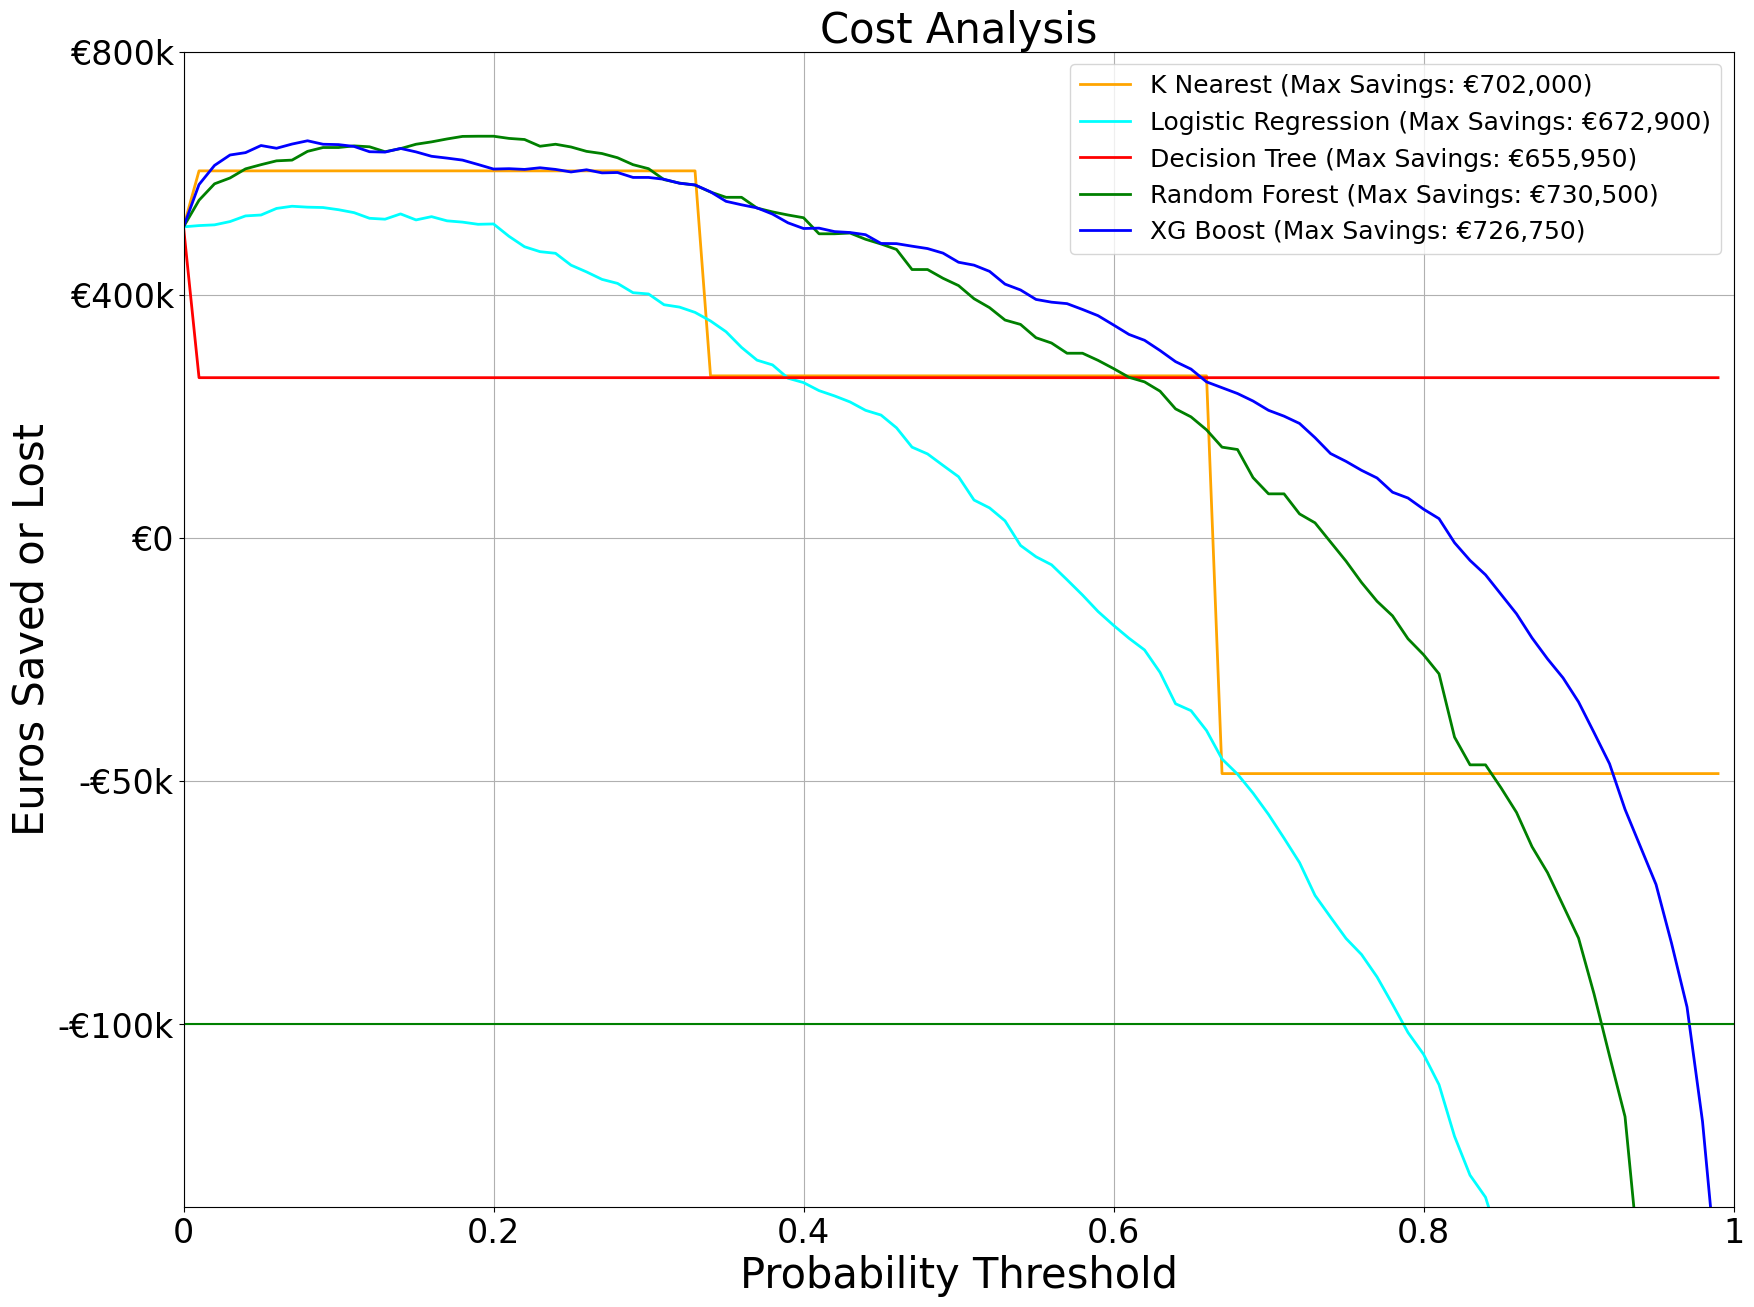

In [119]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.plot(knn_idx, knn_savings, label='K Nearest (Max Savings: €{:,})'.format(max(knn_savings)), color='orange', lw=2)
plt.plot(lr_idx, lr_savings, label='Logistic Regression (Max Savings: €{:,})'.format(max(lr_savings)), color='cyan', lw=2)
plt.plot(dc_idx, dc_savings, label='Decision Tree (Max Savings: €{:,})'.format(max(dc_savings)), color='red', lw=2)
plt.plot(rf_idx, rf_savings, label='Random Forest (Max Savings: €{:,})'.format(max(rf_savings)), color='green', lw=2)
plt.plot(xgb_idx, xgb_savings, label='XG Boost (Max Savings: €{:,})'.format(max(xgb_savings)), color='blue', lw=2)
ax.axhline(y=0, color='green')
plt.grid()
ax.set_xbound(lower=0, upper=1)
ax.set_ybound(lower=-150000, upper=800000)
ax.set_yticklabels( ['-€150K','-€100k','-€50k', '€0', '€400k', '€800k'], fontsize=24)
ax.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1'], fontsize=24)
plt.xlabel('Probability Threshold', fontsize=30)
plt.ylabel('Euros Saved or Lost',fontsize=30)
plt.legend(fontsize=18)
plt.title('Cost Analysis',fontsize=30);
plt.savefig('Cost_Analysis.png')

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


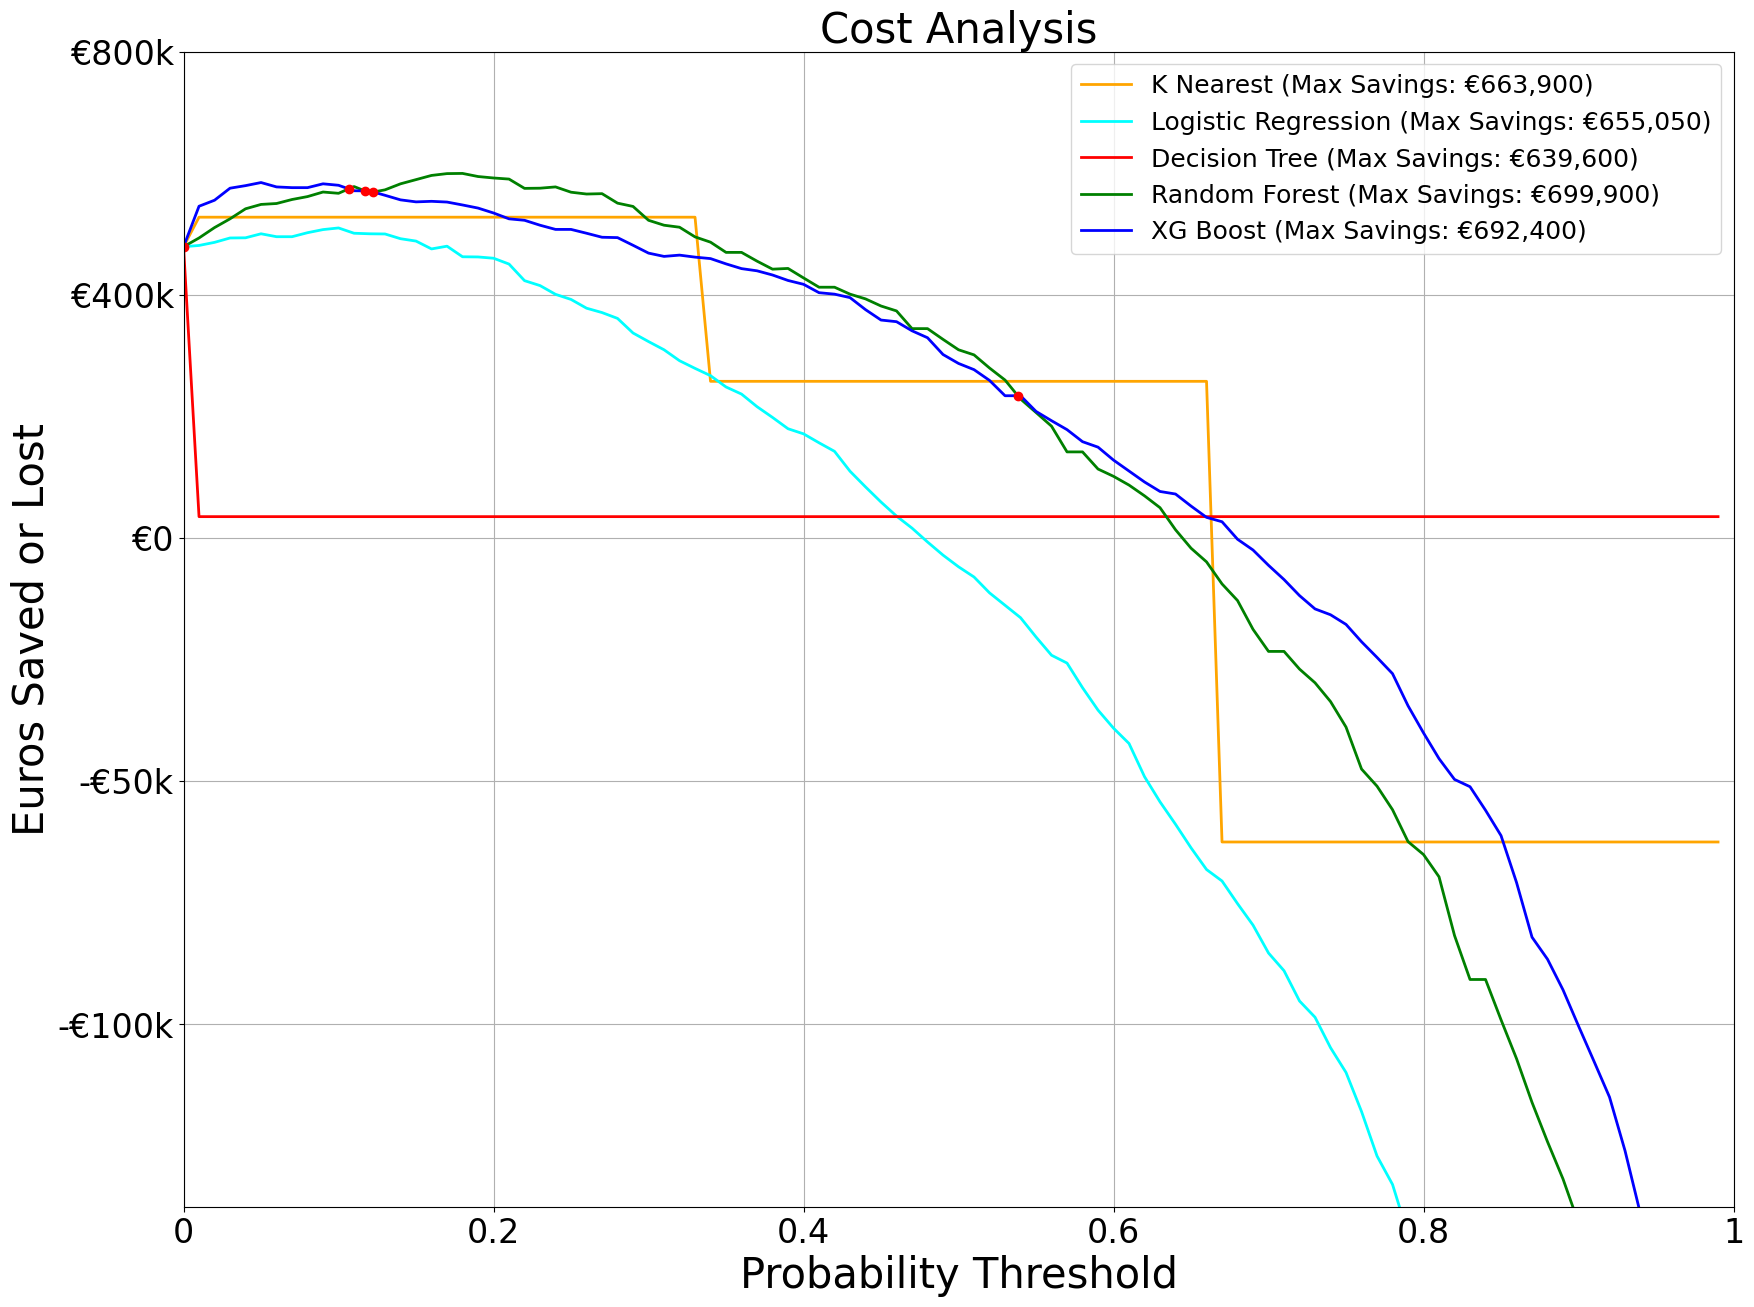

Intersection at threshold: 0.00, Savings: €639,600.00
Intersection at threshold: 0.11, Savings: €687,194.78
Intersection at threshold: 0.12, Savings: €685,545.45
Intersection at threshold: 0.12, Savings: €684,600.00
Intersection at threshold: 0.54, Savings: €517,050.00


In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import brentq


# Interpolating the savings values for both classifiers
rf_interp_1 = interp1d(rf_idx_1, rf_savings_1, kind='linear', fill_value="extrapolate")
xgb_interp_1 = interp1d(xgb_idx_1, xgb_savings_1, kind='linear', fill_value="extrapolate")

# Define a function to find the difference between the interpolated values
def difference(x):
    return rf_interp_1(x) - xgb_interp_1(x)

# Use Brent's method to find the root (i.e., the intersection point)
thresholds_1 = np.linspace(0, 1, 1000)
intersection_points_1 = []

for i in range(len(thresholds_1) - 1):
    try:
        root = brentq(difference, thresholds_1[i], thresholds_1[i+1])
        intersection_points_1.append(root)
    except ValueError:
        # Ignore if no root is found in the interval
        continue

# Plotting the results
fig, ax = plt.subplots(figsize=(20, 15))
plt.plot(knn_idx_1, knn_savings_1, label='K Nearest (Max Savings: €{:,})'.format(max(knn_savings_1)), color='orange', lw=2)
plt.plot(lr_idx_1, lr_savings_1, label='Logistic Regression (Max Savings: €{:,})'.format(max(lr_savings_1)), color='cyan', lw=2)
plt.plot(dc_idx_1, dc_savings_1, label='Decision Tree (Max Savings: €{:,})'.format(max(dc_savings_1)), color='red', lw=2)
plt.plot(rf_idx_1, rf_savings_1, label='Random Forest (Max Savings: €{:,})'.format(max(rf_savings_1)), color='green', lw=2)
plt.plot(xgb_idx_1, xgb_savings_1, label='XG Boost (Max Savings: €{:,})'.format(max(xgb_savings_1)), color='blue', lw=2)

# Plot the intersection points
for point in intersection_points_1:
    plt.plot(point, rf_interp_1(point), 'ro')  # Mark the intersection point with a red circle

plt.grid()
ax.set_xbound(lower=0, upper=1)
ax.set_ybound(lower=-150000, upper=800000)
ax.set_yticklabels(['-€150K','-€100k','-€50k', '€0', '€400k', '€800k'], fontsize=24)
ax.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1'], fontsize=24)
plt.xlabel('Probability Threshold', fontsize=30)
plt.ylabel('Euros Saved or Lost', fontsize=30)
plt.legend(fontsize=18)
plt.title('Cost Analysis', fontsize=30)
plt.savefig('Cost_Analysis.png')
plt.show()

# Print the intersection points
for point in intersection_points_1:
    print(f"Intersection at threshold: {point:.2f}, Savings: €{rf_interp_1(point):,.2f}")


FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


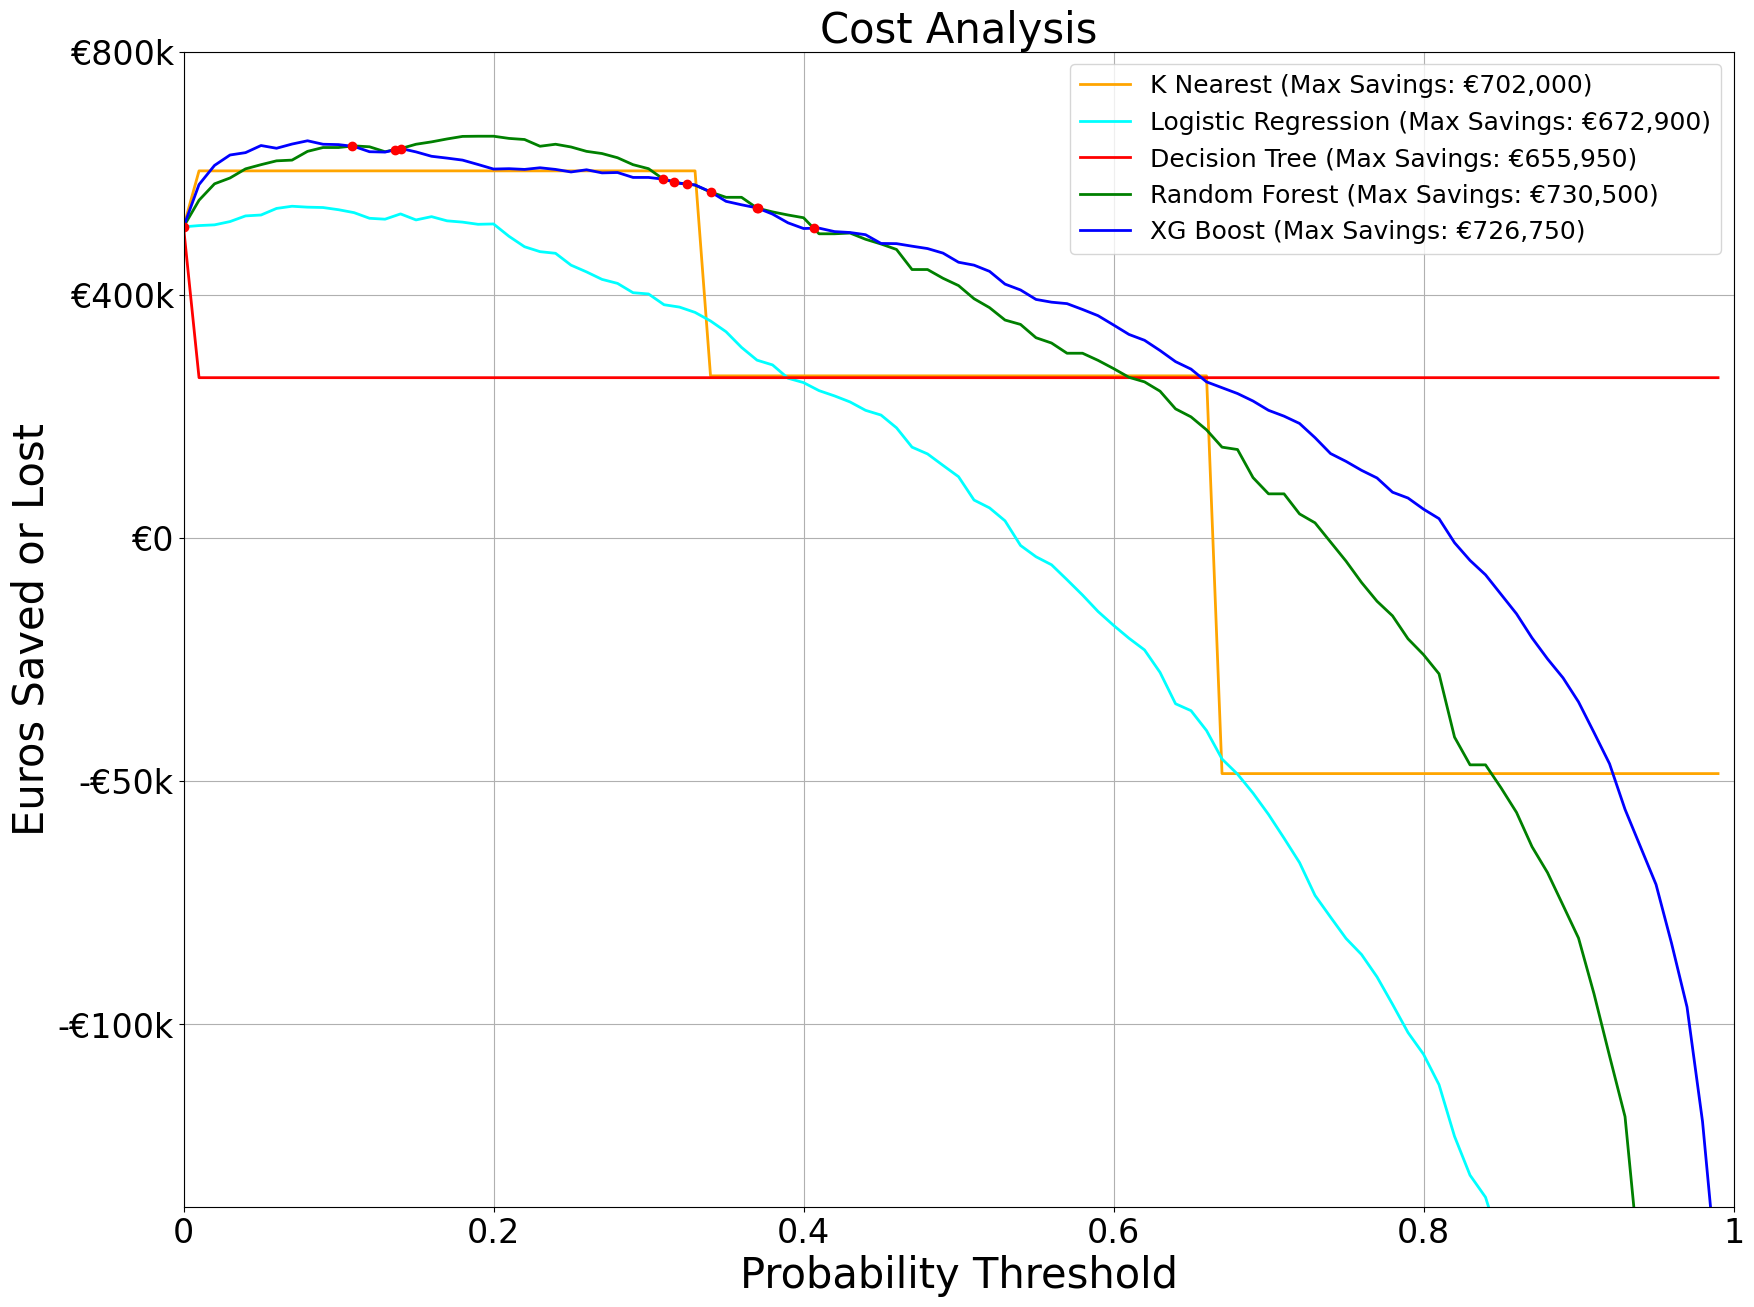

Intersection at threshold: 0.00, Savings: €655,950.00
Intersection at threshold: 0.11, Savings: €722,336.84
Intersection at threshold: 0.14, Savings: €719,450.00
Intersection at threshold: 0.14, Savings: €720,383.72
Intersection at threshold: 0.31, Savings: €695,160.00
Intersection at threshold: 0.32, Savings: €692,900.00
Intersection at threshold: 0.33, Savings: €691,125.00
Intersection at threshold: 0.34, Savings: €684,410.87
Intersection at threshold: 0.37, Savings: €671,610.71
Intersection at threshold: 0.37, Savings: €671,157.69
Intersection at threshold: 0.41, Savings: €654,796.67


In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import brentq


# Interpolating the savings values for both classifiers
rf_interp = interp1d(rf_idx, rf_savings, kind='linear', fill_value="extrapolate")
xgb_interp = interp1d(xgb_idx, xgb_savings, kind='linear', fill_value="extrapolate")

# Define a function to find the difference between the interpolated values
def difference(x):
    return rf_interp(x) - xgb_interp(x)

# Use Brent's method to find the root (i.e., the intersection point)
thresholds = np.linspace(0, 1, 1000)
intersection_points = []

for i in range(len(thresholds) - 1):
    try:
        root = brentq(difference, thresholds[i], thresholds[i+1])
        intersection_points.append(root)
    except ValueError:
        # Ignore if no root is found in the interval
        continue

# Plotting the results
fig, ax = plt.subplots(figsize=(20, 15))
plt.plot(knn_idx, knn_savings, label='K Nearest (Max Savings: €{:,})'.format(max(knn_savings)), color='orange', lw=2)
plt.plot(lr_idx, lr_savings, label='Logistic Regression (Max Savings: €{:,})'.format(max(lr_savings)), color='cyan', lw=2)
plt.plot(dc_idx, dc_savings, label='Decision Tree (Max Savings: €{:,})'.format(max(dc_savings)), color='red', lw=2)
plt.plot(rf_idx, rf_savings, label='Random Forest (Max Savings: €{:,})'.format(max(rf_savings)), color='green', lw=2)
plt.plot(xgb_idx, xgb_savings, label='XG Boost (Max Savings: €{:,})'.format(max(xgb_savings)), color='blue', lw=2)

# Plot the intersection points
for point in intersection_points:
    plt.plot(point, rf_interp(point), 'ro')  # Mark the intersection point with a red circle

plt.grid()
ax.set_xbound(lower=0, upper=1)
ax.set_ybound(lower=-150000, upper=800000)
ax.set_yticklabels(['-€150K','-€100k','-€50k', '€0', '€400k', '€800k'], fontsize=24)
ax.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1'], fontsize=24)
plt.xlabel('Probability Threshold', fontsize=30)
plt.ylabel('Euros Saved or Lost', fontsize=30)
plt.legend(fontsize=18)
plt.title('Cost Analysis', fontsize=30)
plt.savefig('Cost_Analysis.png')
plt.show()

# Print the intersection points
for point in intersection_points:
    print(f"Intersection at threshold: {point:.2f}, Savings: €{rf_interp(point):,.2f}")


#Cost Sensivity Analysis

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


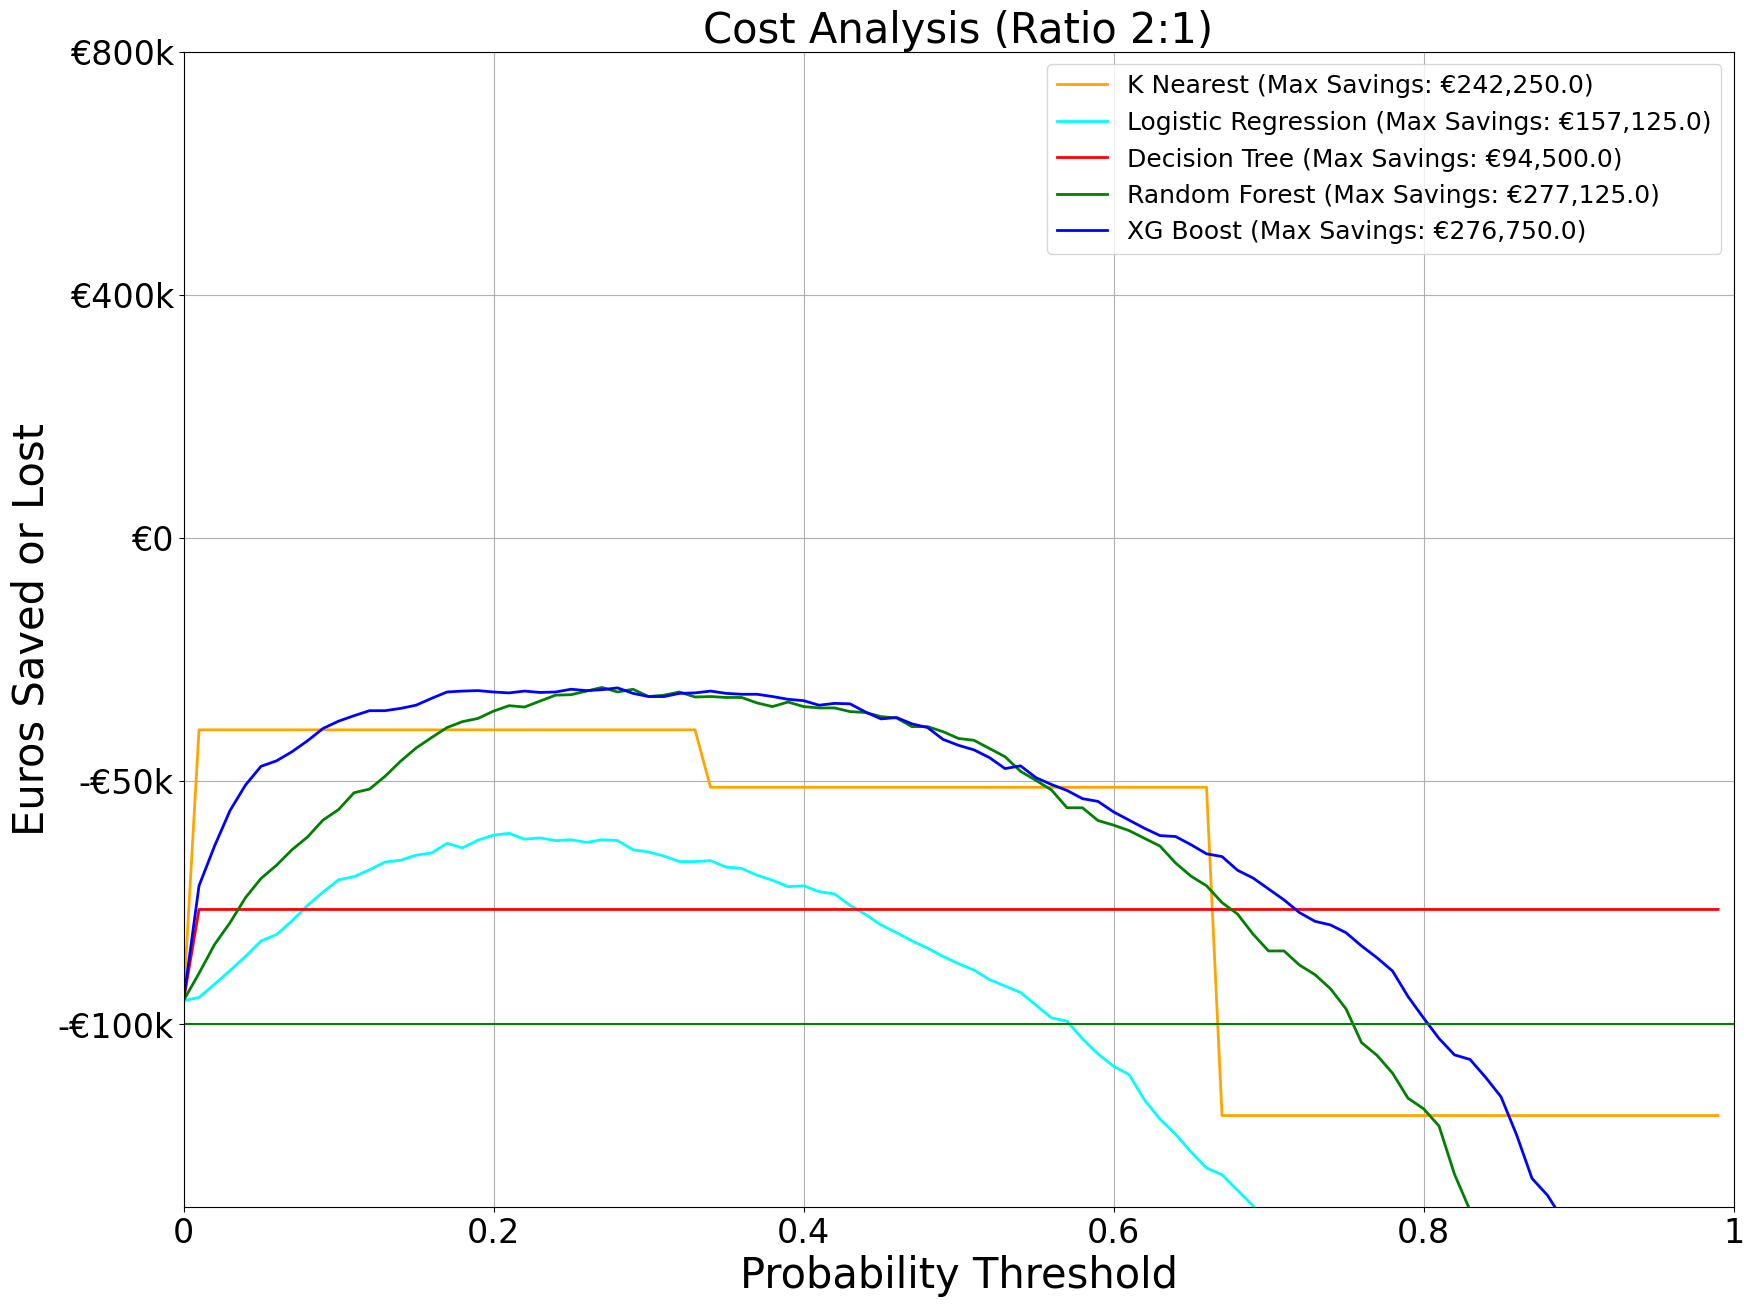

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


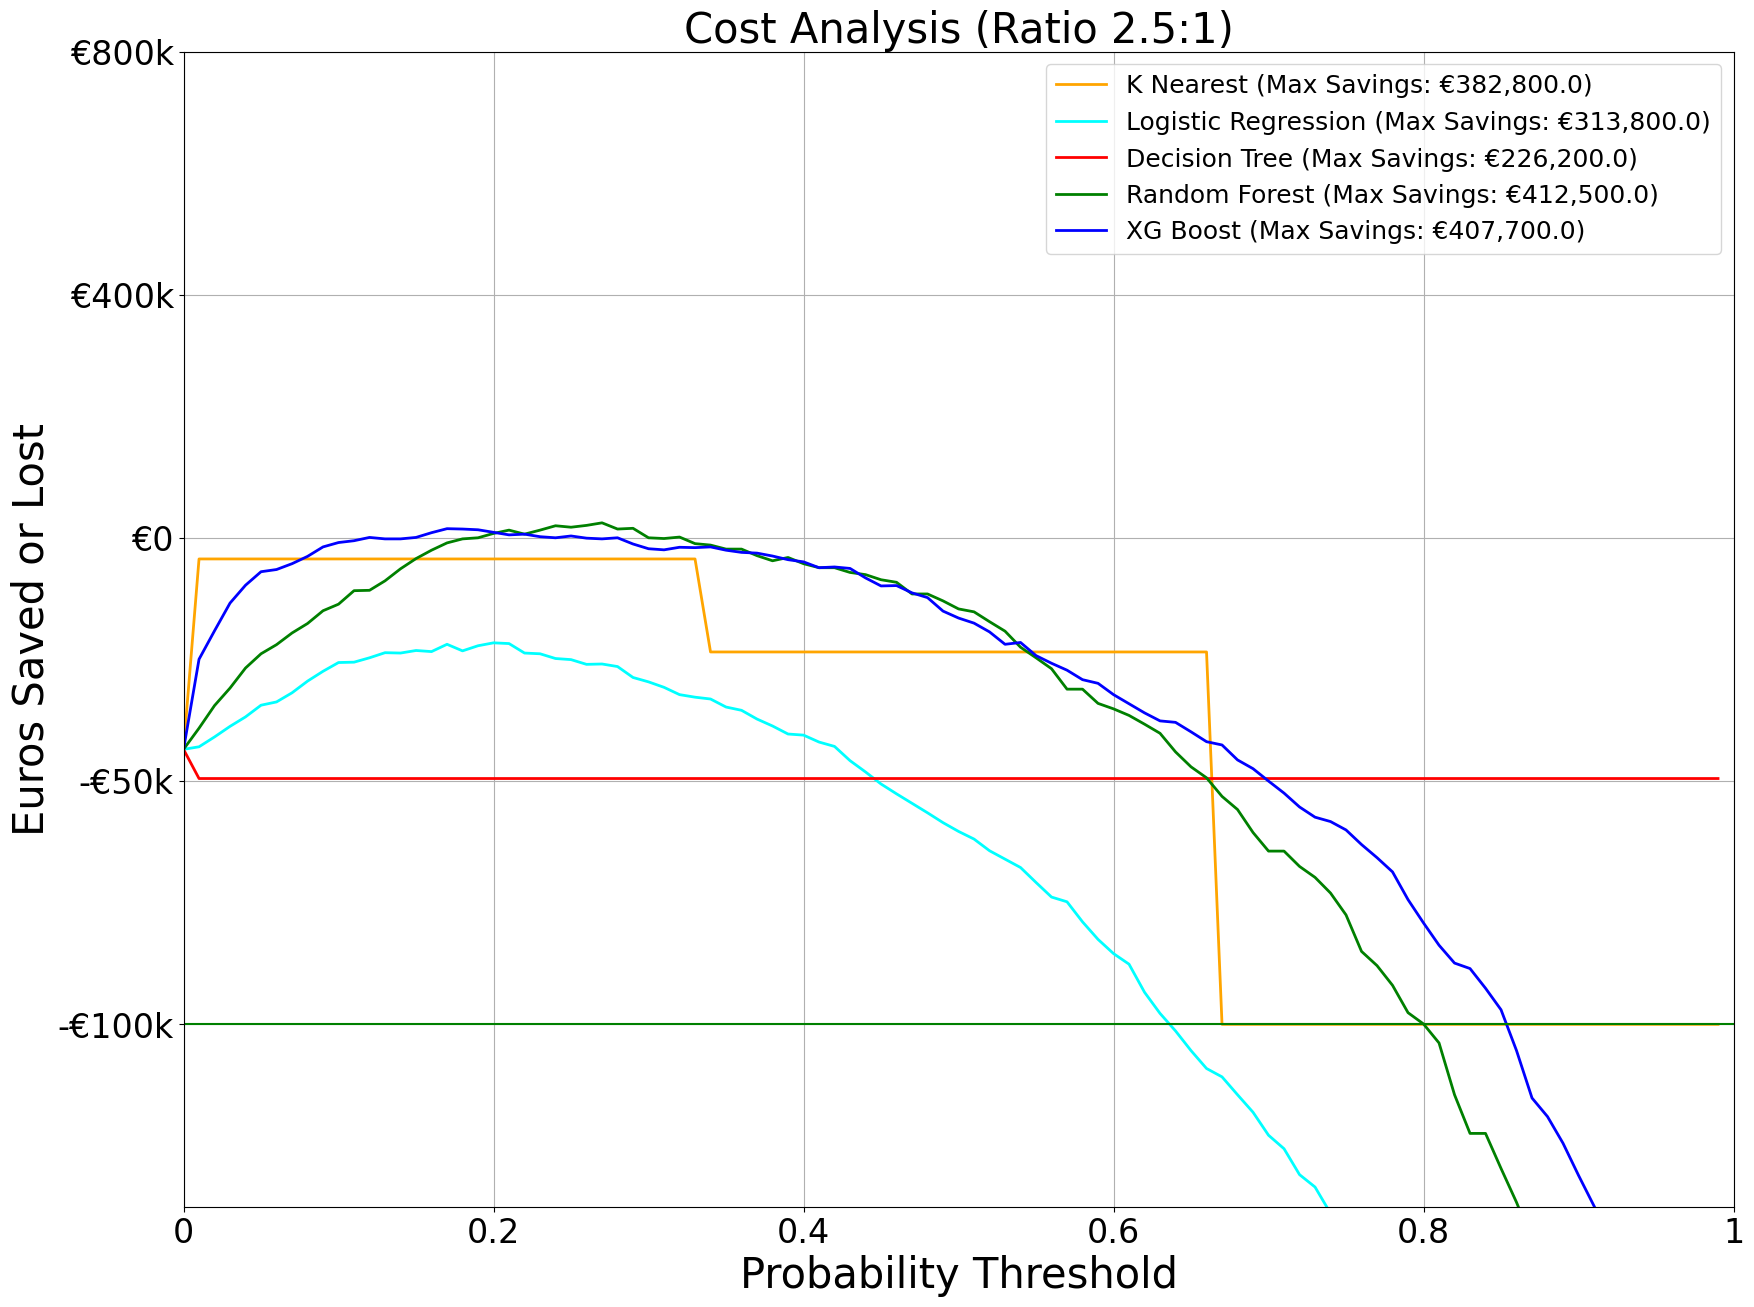

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


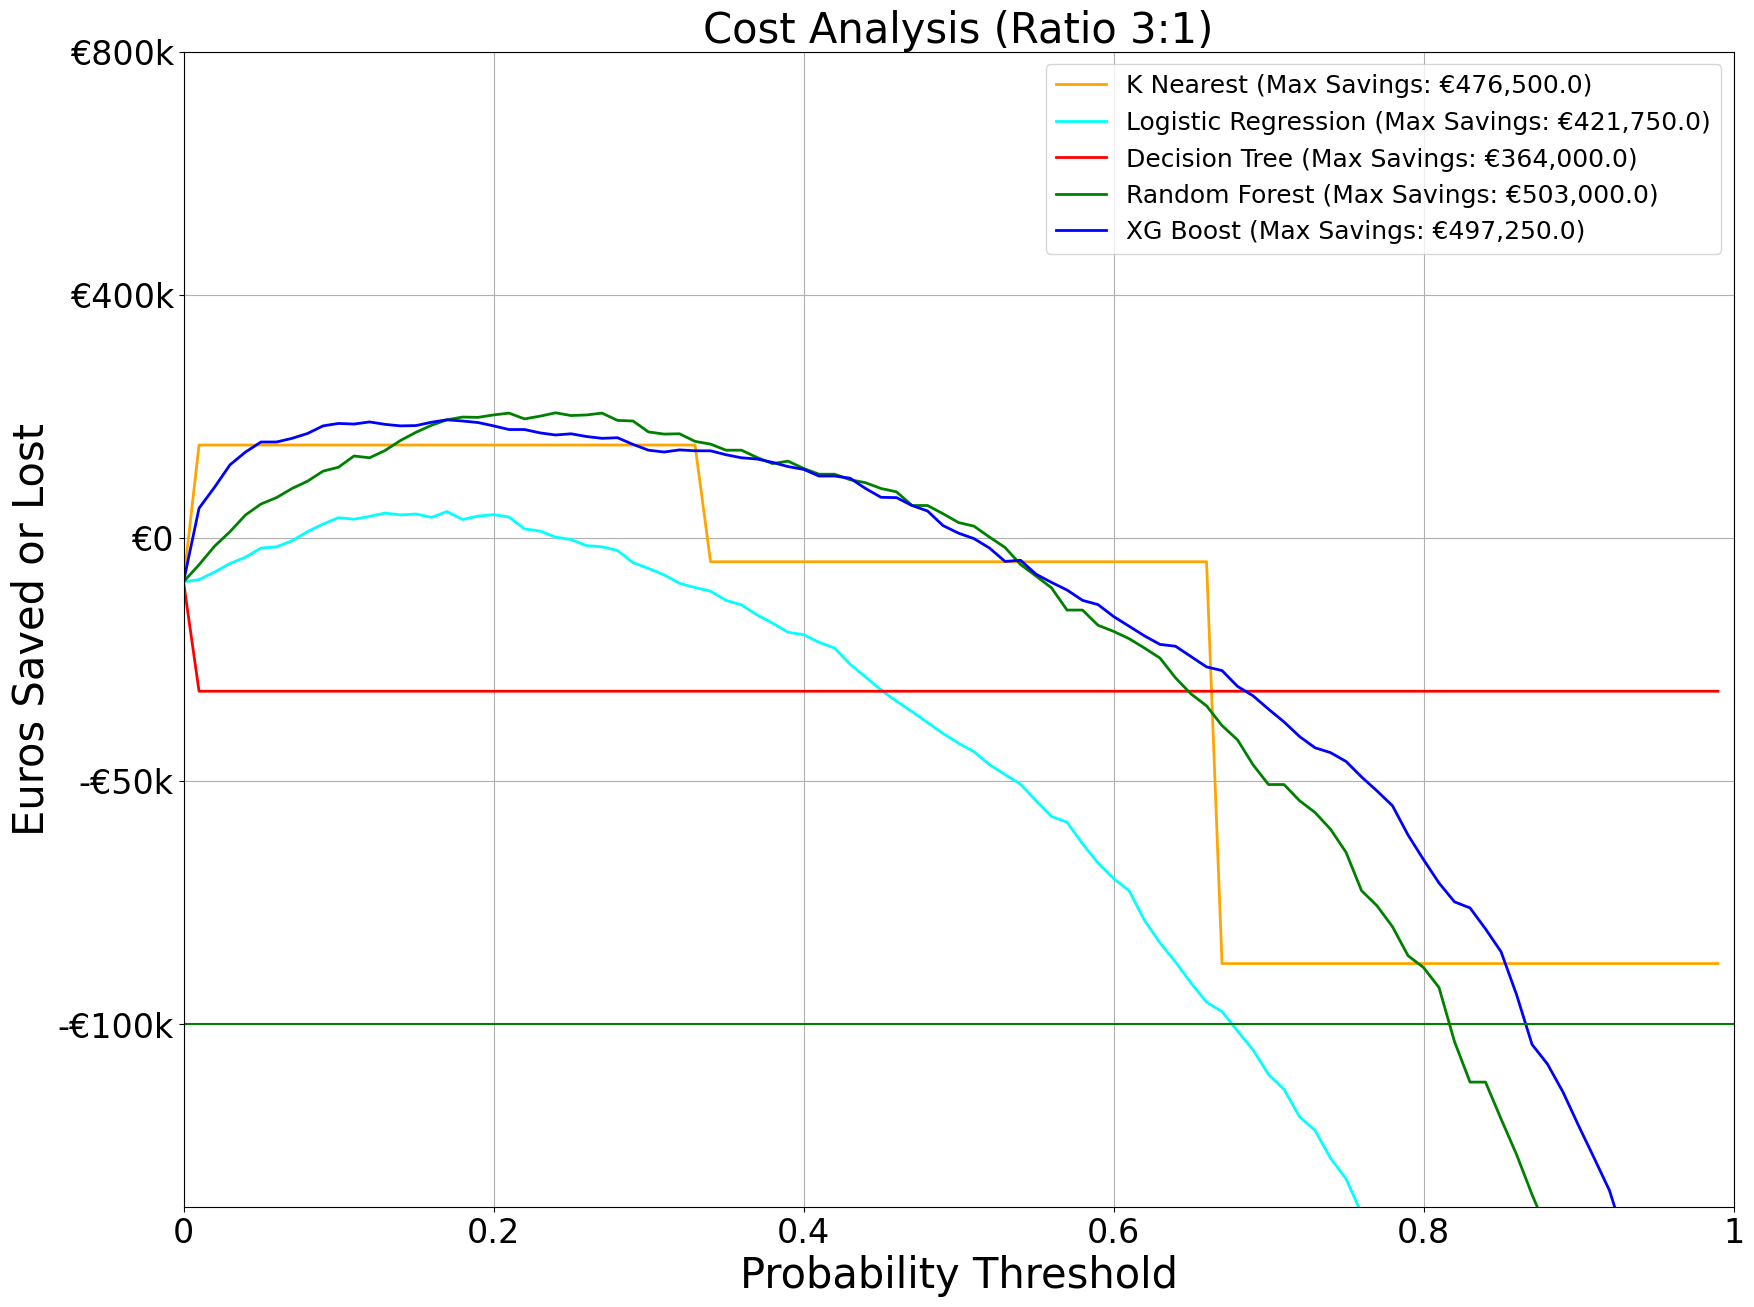

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


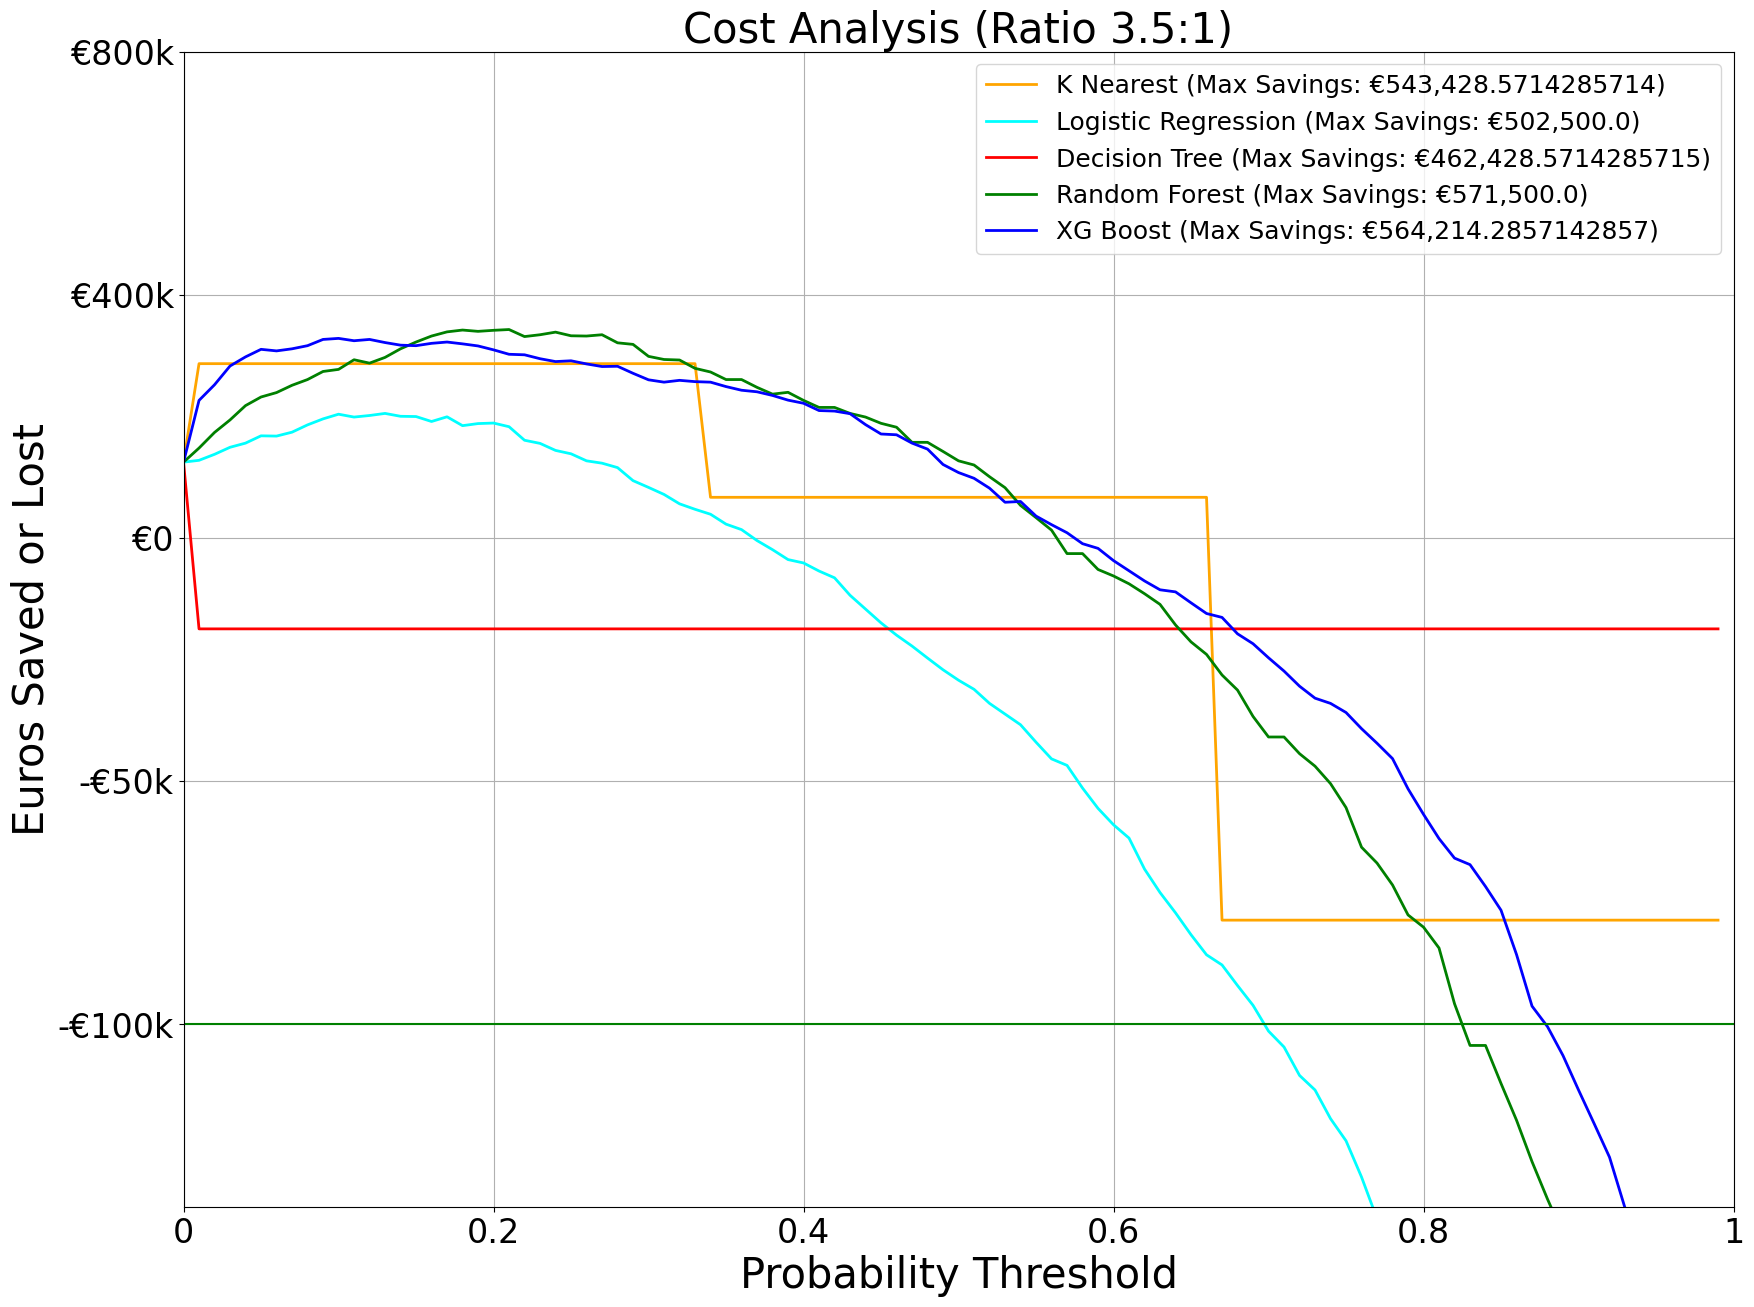

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


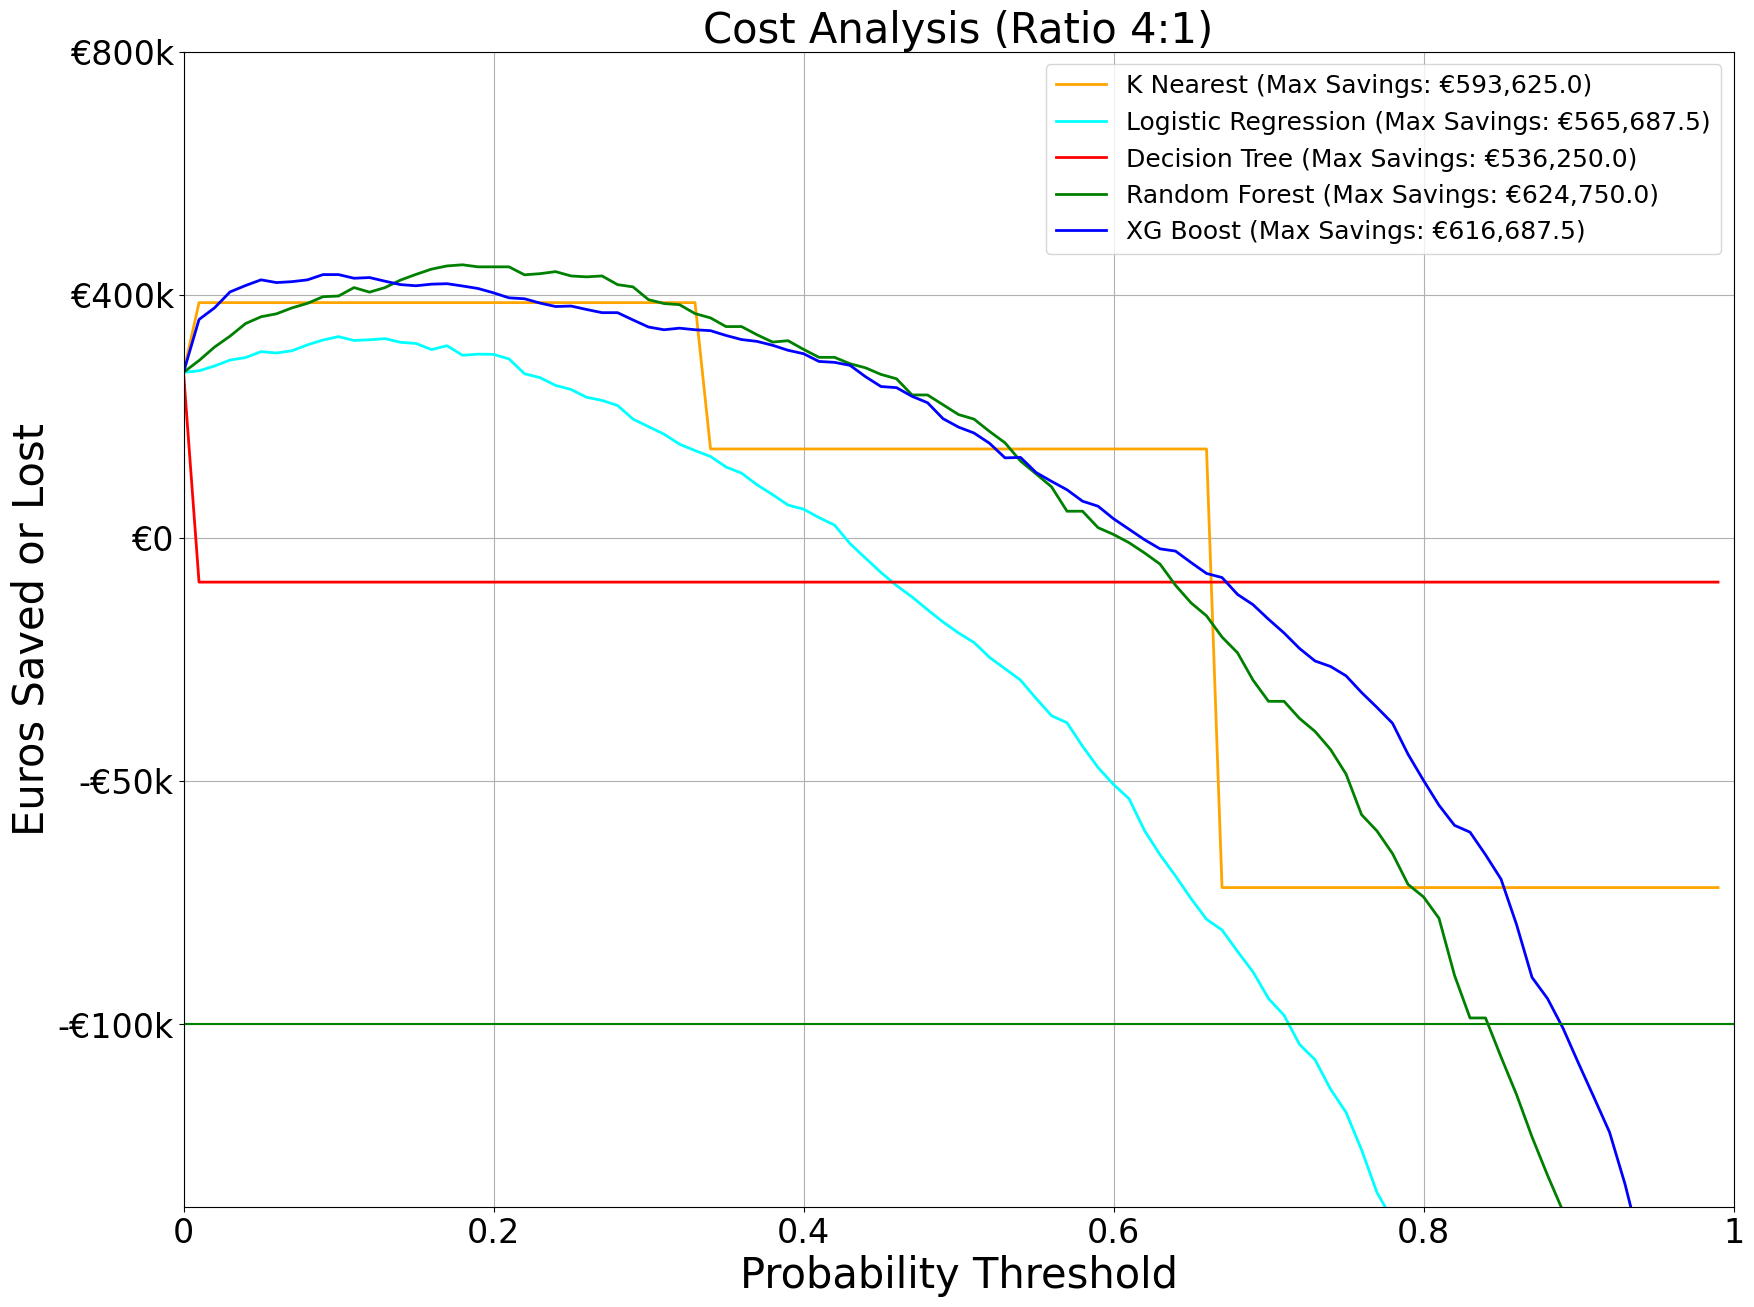

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


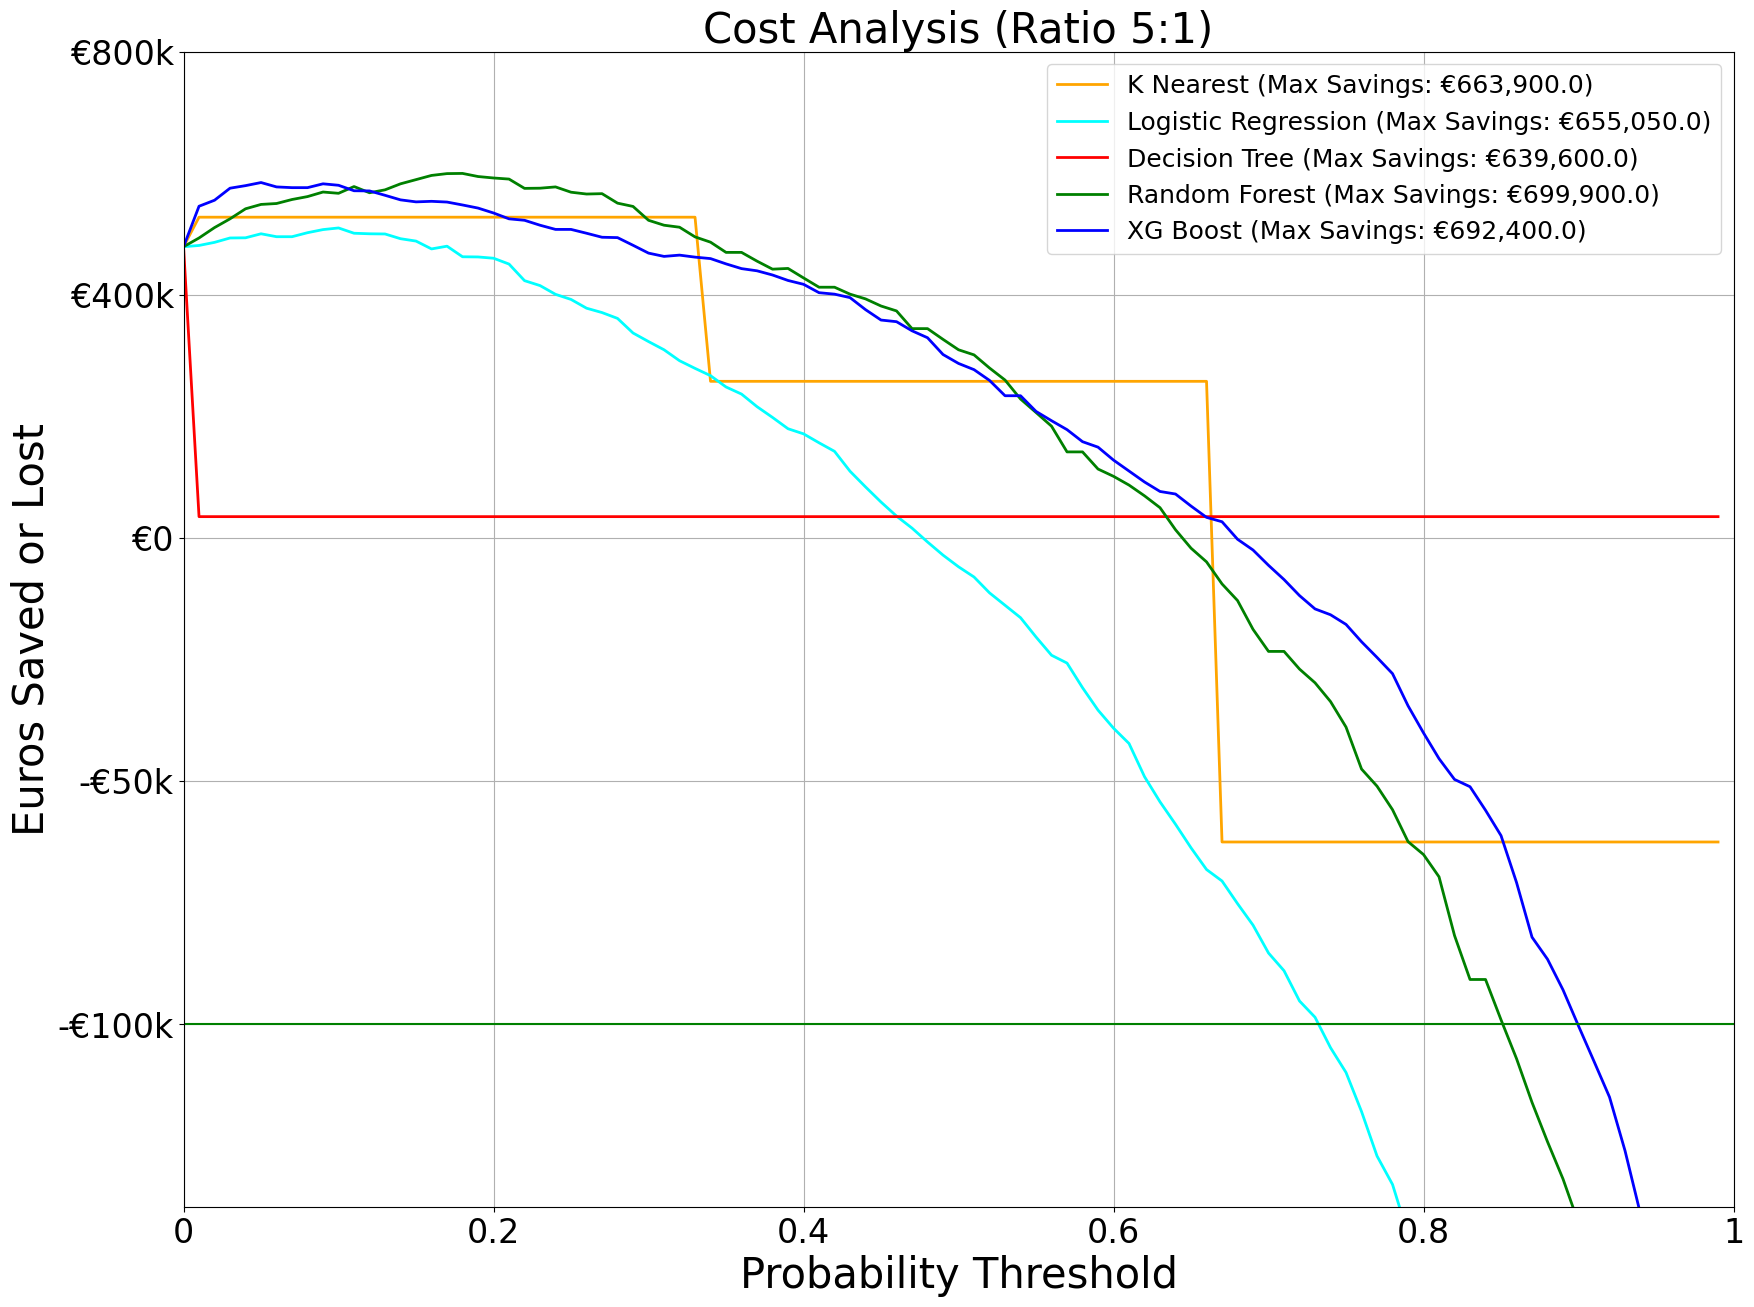

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


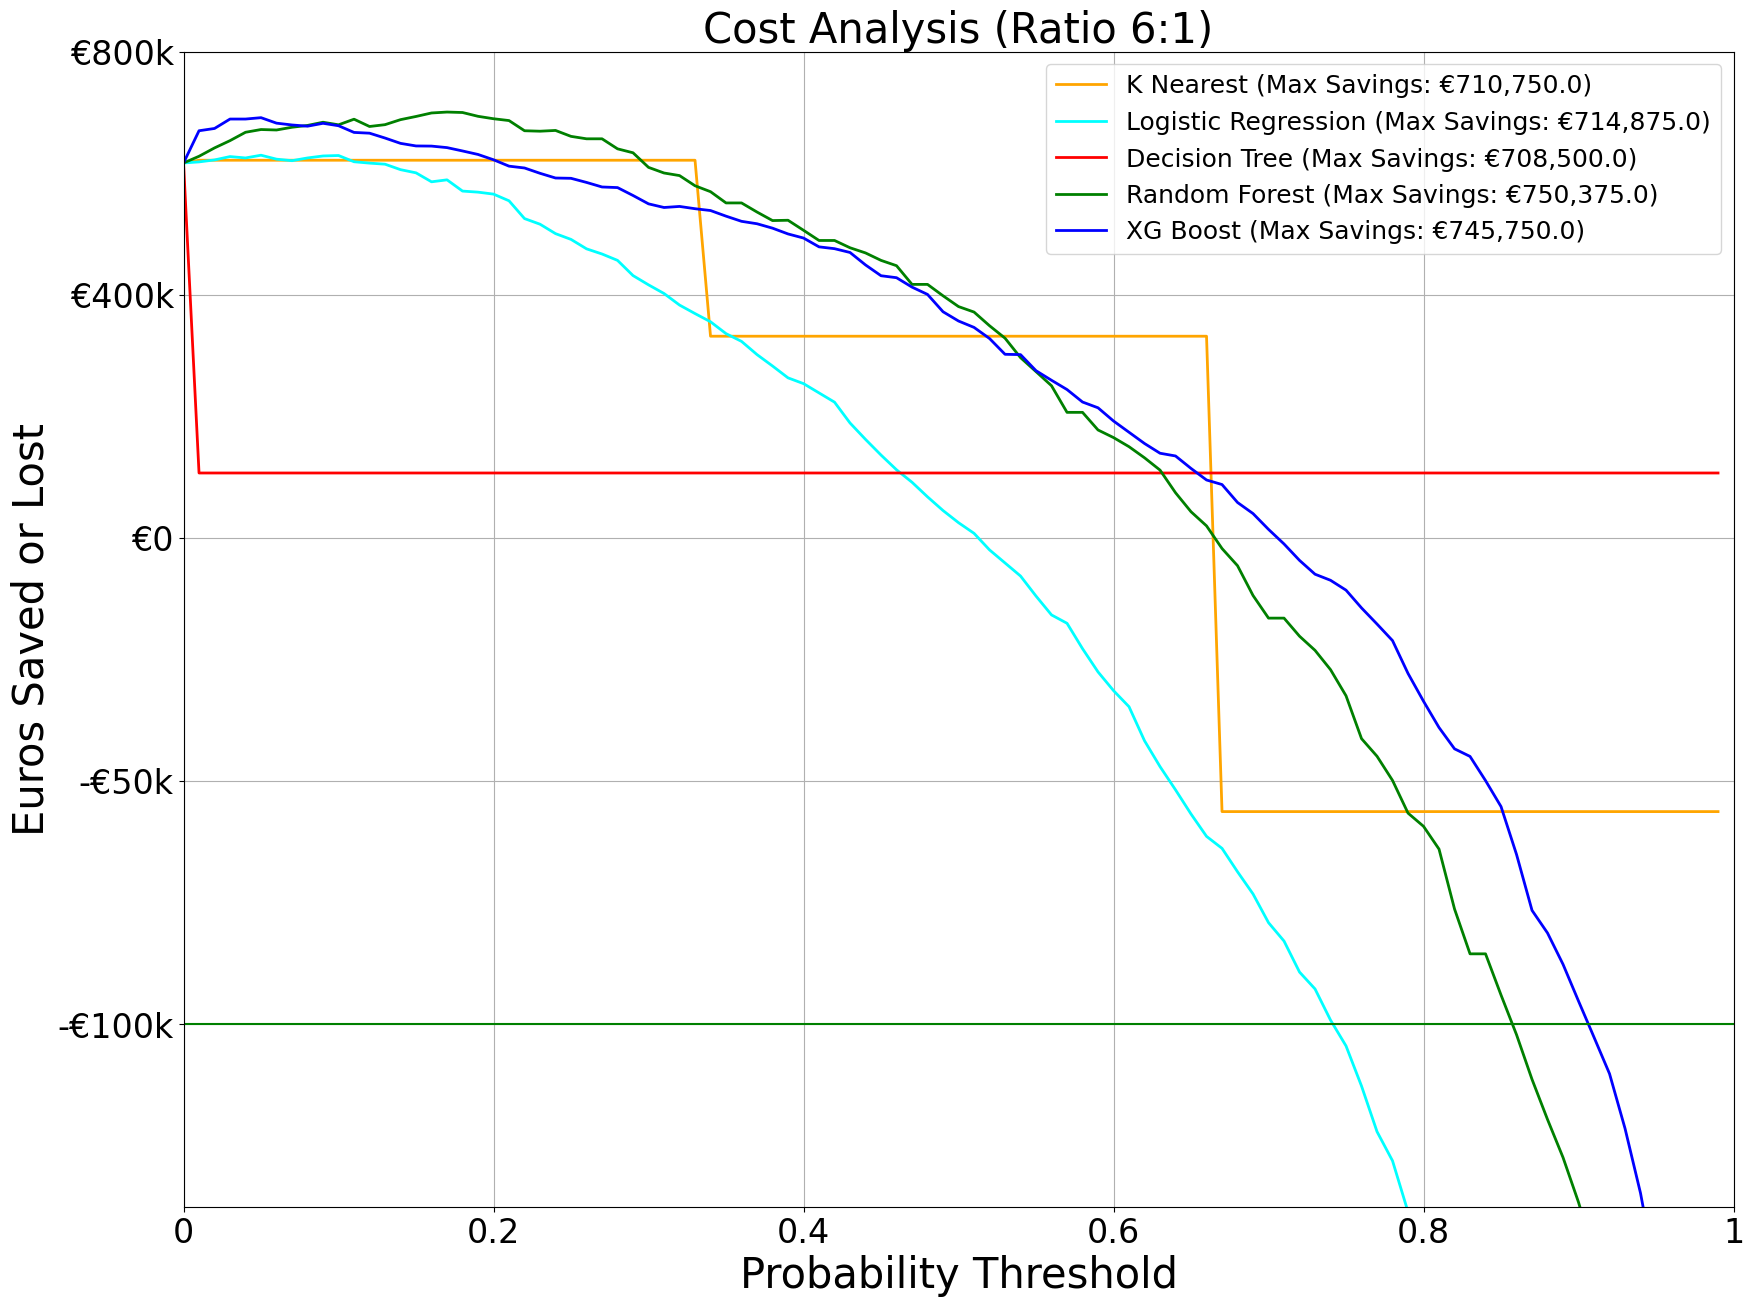

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


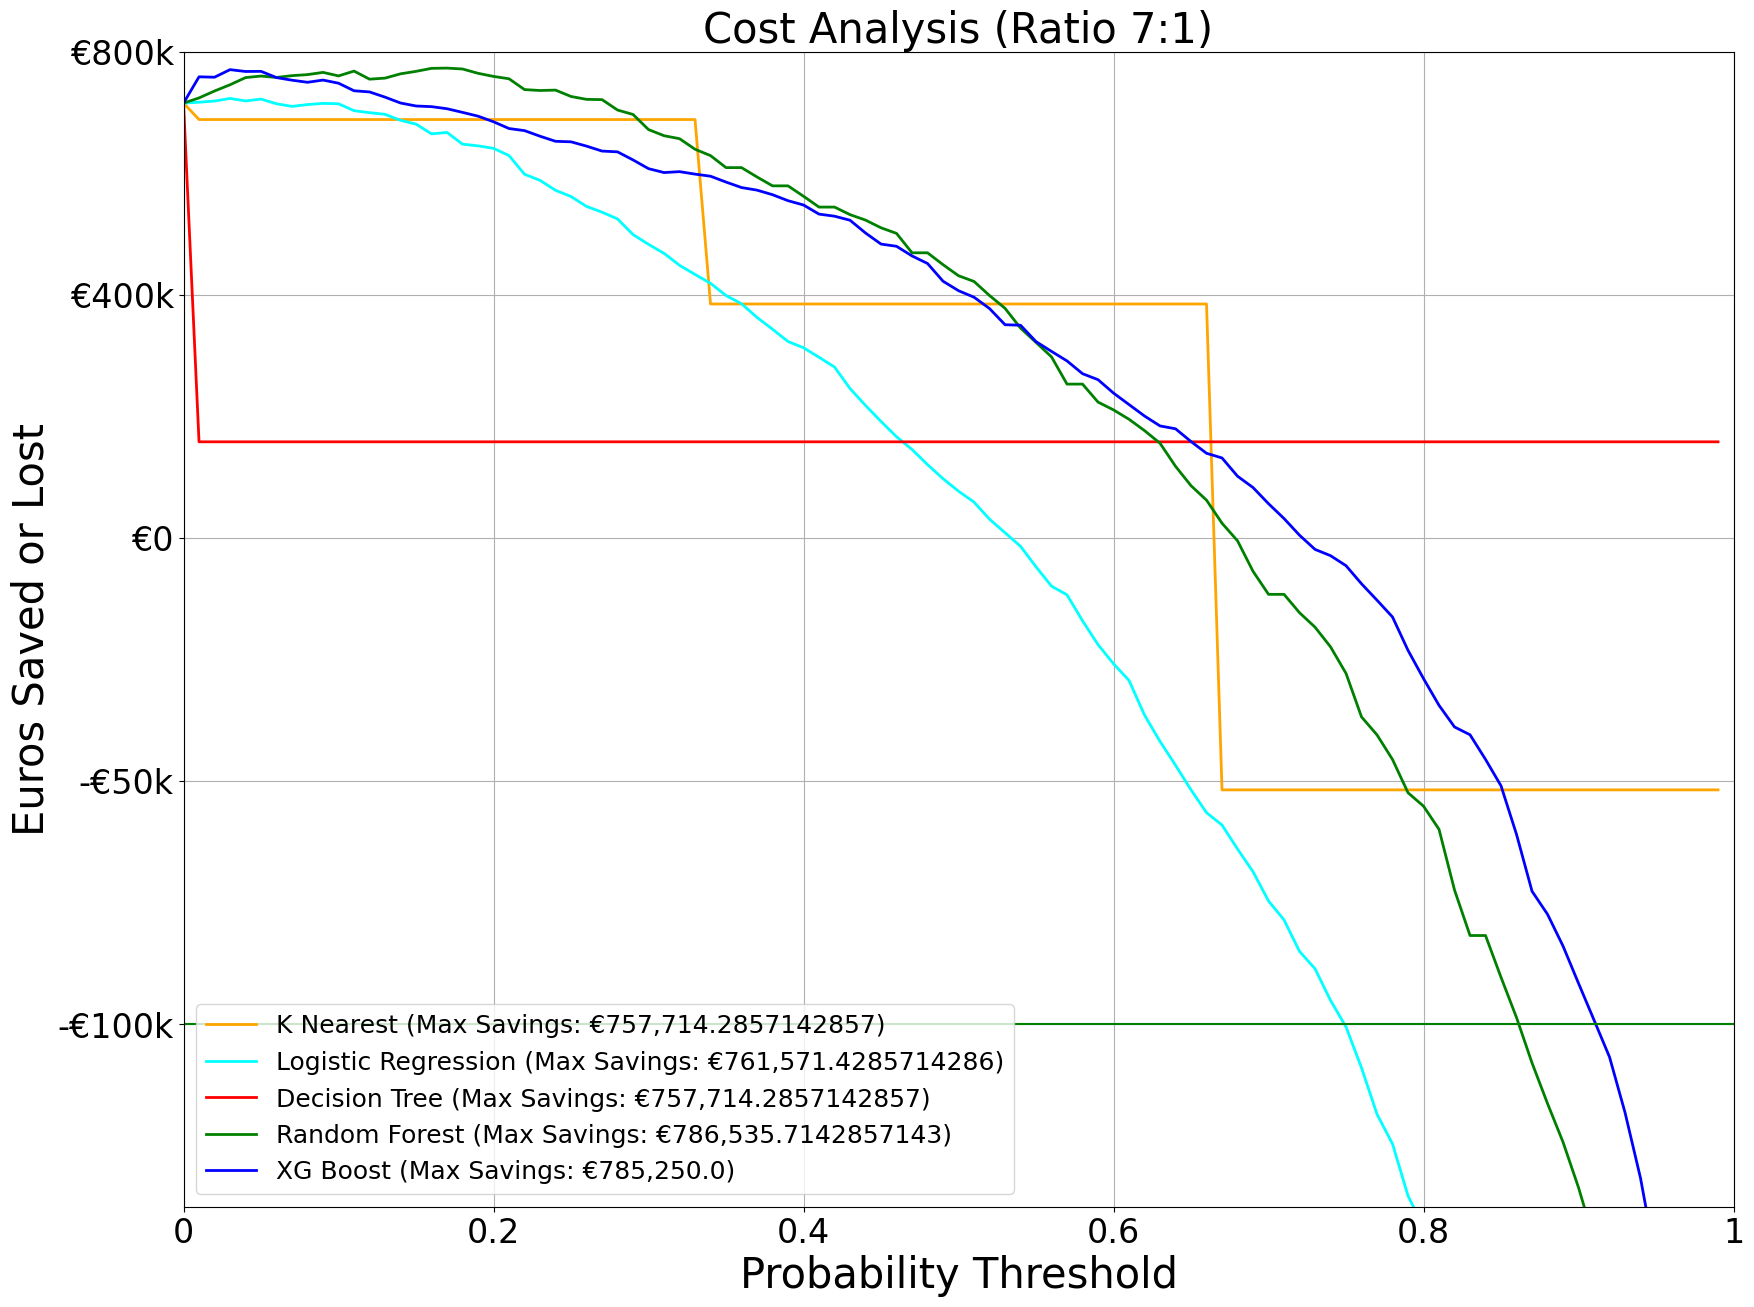

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def model_cost_1(model_1, acquisition_cost_1, retention_cost_1):
    savings_1 = []
    idx_1 = []
    for i in np.arange(0, 1, 0.01):
        y_predict_1 = (model_1.predict_proba(X_test_scaled_1)[:, 1] >= i)
        cf_matrix_1 = confusion_matrix(y_test_1, y_predict_1)
        total_cost_1 = (cf_matrix_1[0][1] * retention_cost_1) + (cf_matrix_1[1][1] * retention_cost_1) + cf_matrix_1[1][0] * acquisition_cost_1
        total_savings_1 = cf_matrix_1[1][1] * acquisition_cost_1
        savings_1.append(total_savings_1 - total_cost_1)
        idx_1.append(i)
    return savings_1, idx_1

# Perform sensitivity analysis for different ratios
ratios_1 = list((2,2.5,3,3.5,4,5,6, 7))
acquisition_cost_1 = 750

for ratio_1 in ratios_1:
    retention_cost_1 = acquisition_cost_1 / ratio_1

    # Calculate savings for each model with the current ratio
    knn_savings_1, knn_idx_1 = model_cost_1(knn_1, acquisition_cost_1, retention_cost_1)
    lr_savings_1, lr_idx_1 = model_cost_1(lr_1, acquisition_cost_1, retention_cost_1)
    dc_savings_1, dc_idx_1 = model_cost_1(DTC_1, acquisition_cost_1, retention_cost_1)
    rf_savings_1, rf_idx_1 = model_cost_1(RFC_1, acquisition_cost_1, retention_cost_1)
    xgb_savings_1, xgb_idx_1 = model_cost_1(xgb_1, acquisition_cost_1, retention_cost_1)

    # Plotting the cost analysis for the current ratio
    fig, ax = plt.subplots(figsize=(20, 15))
    plt.plot(knn_idx_1, knn_savings_1, label='K Nearest (Max Savings: €{:,})'.format(max(knn_savings_1)), color='orange', lw=2)
    plt.plot(lr_idx_1, lr_savings_1, label='Logistic Regression (Max Savings: €{:,})'.format(max(lr_savings_1)), color='cyan', lw=2)
    plt.plot(dc_idx_1, dc_savings_1, label='Decision Tree (Max Savings: €{:,})'.format(max(dc_savings_1)), color='red', lw=2)
    plt.plot(rf_idx_1, rf_savings_1, label='Random Forest (Max Savings: €{:,})'.format(max(rf_savings_1)), color='green', lw=2)
    plt.plot(xgb_idx_1, xgb_savings_1, label='XG Boost (Max Savings: €{:,})'.format(max(xgb_savings_1)), color='blue', lw=2)
    ax.axhline(y=0, color='green')
    plt.grid()
    ax.set_xbound(lower=0, upper=1)
    ax.set_ybound(lower=-150000, upper=800000)
    ax.set_yticklabels(['-€150K','-€100k','-€50k', '€0', '€400k', '€800k'], fontsize=24)
    ax.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1'], fontsize=24)
    plt.xlabel('Probability Threshold', fontsize=30)
    plt.ylabel('Euros Saved or Lost', fontsize=30)
    plt.legend(fontsize=18)
    plt.title('Cost Analysis (Ratio {}:1)'.format(ratio_1), fontsize=30)
    plt.savefig('Cost_Analysis_Ratio_{}.png'.format(ratio_1))
    plt.show()


FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


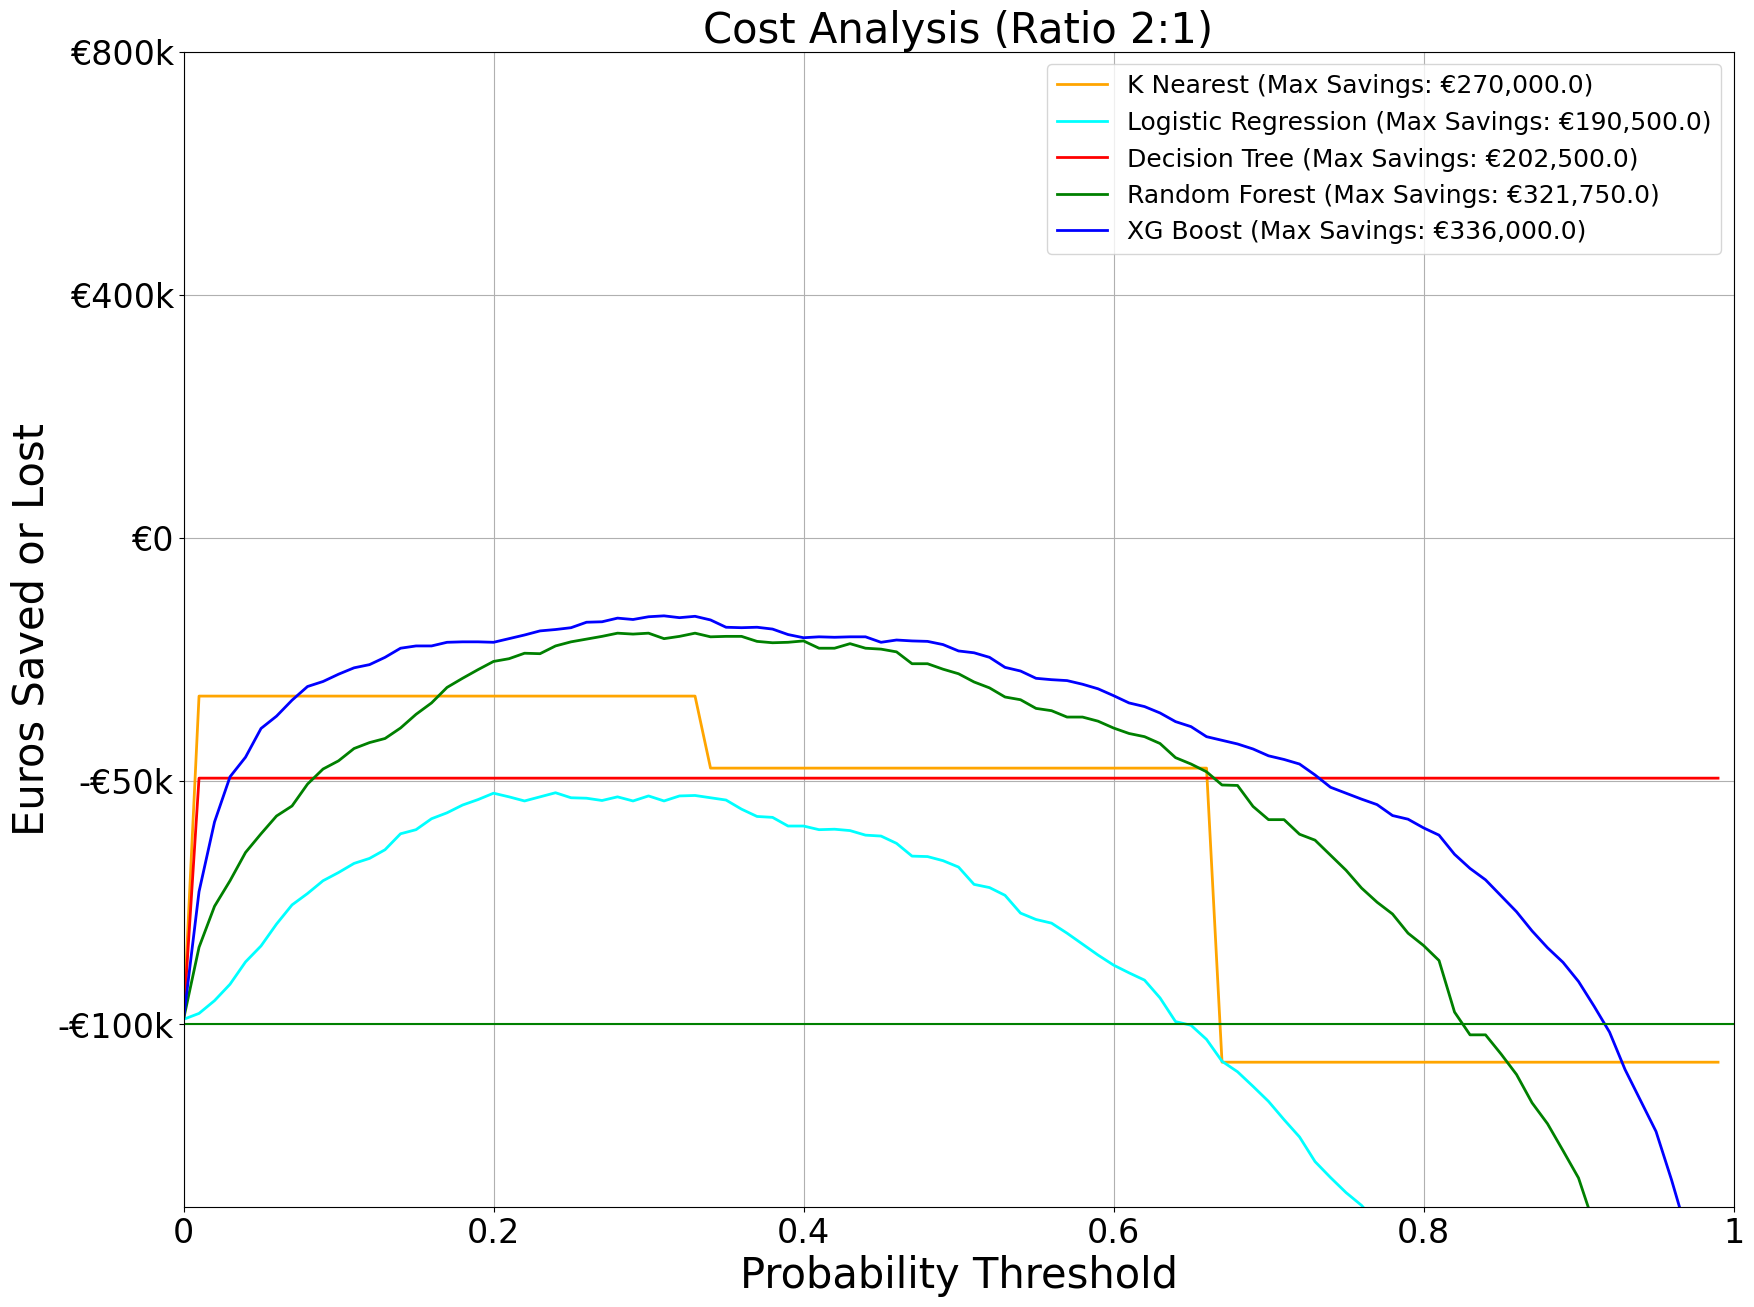

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


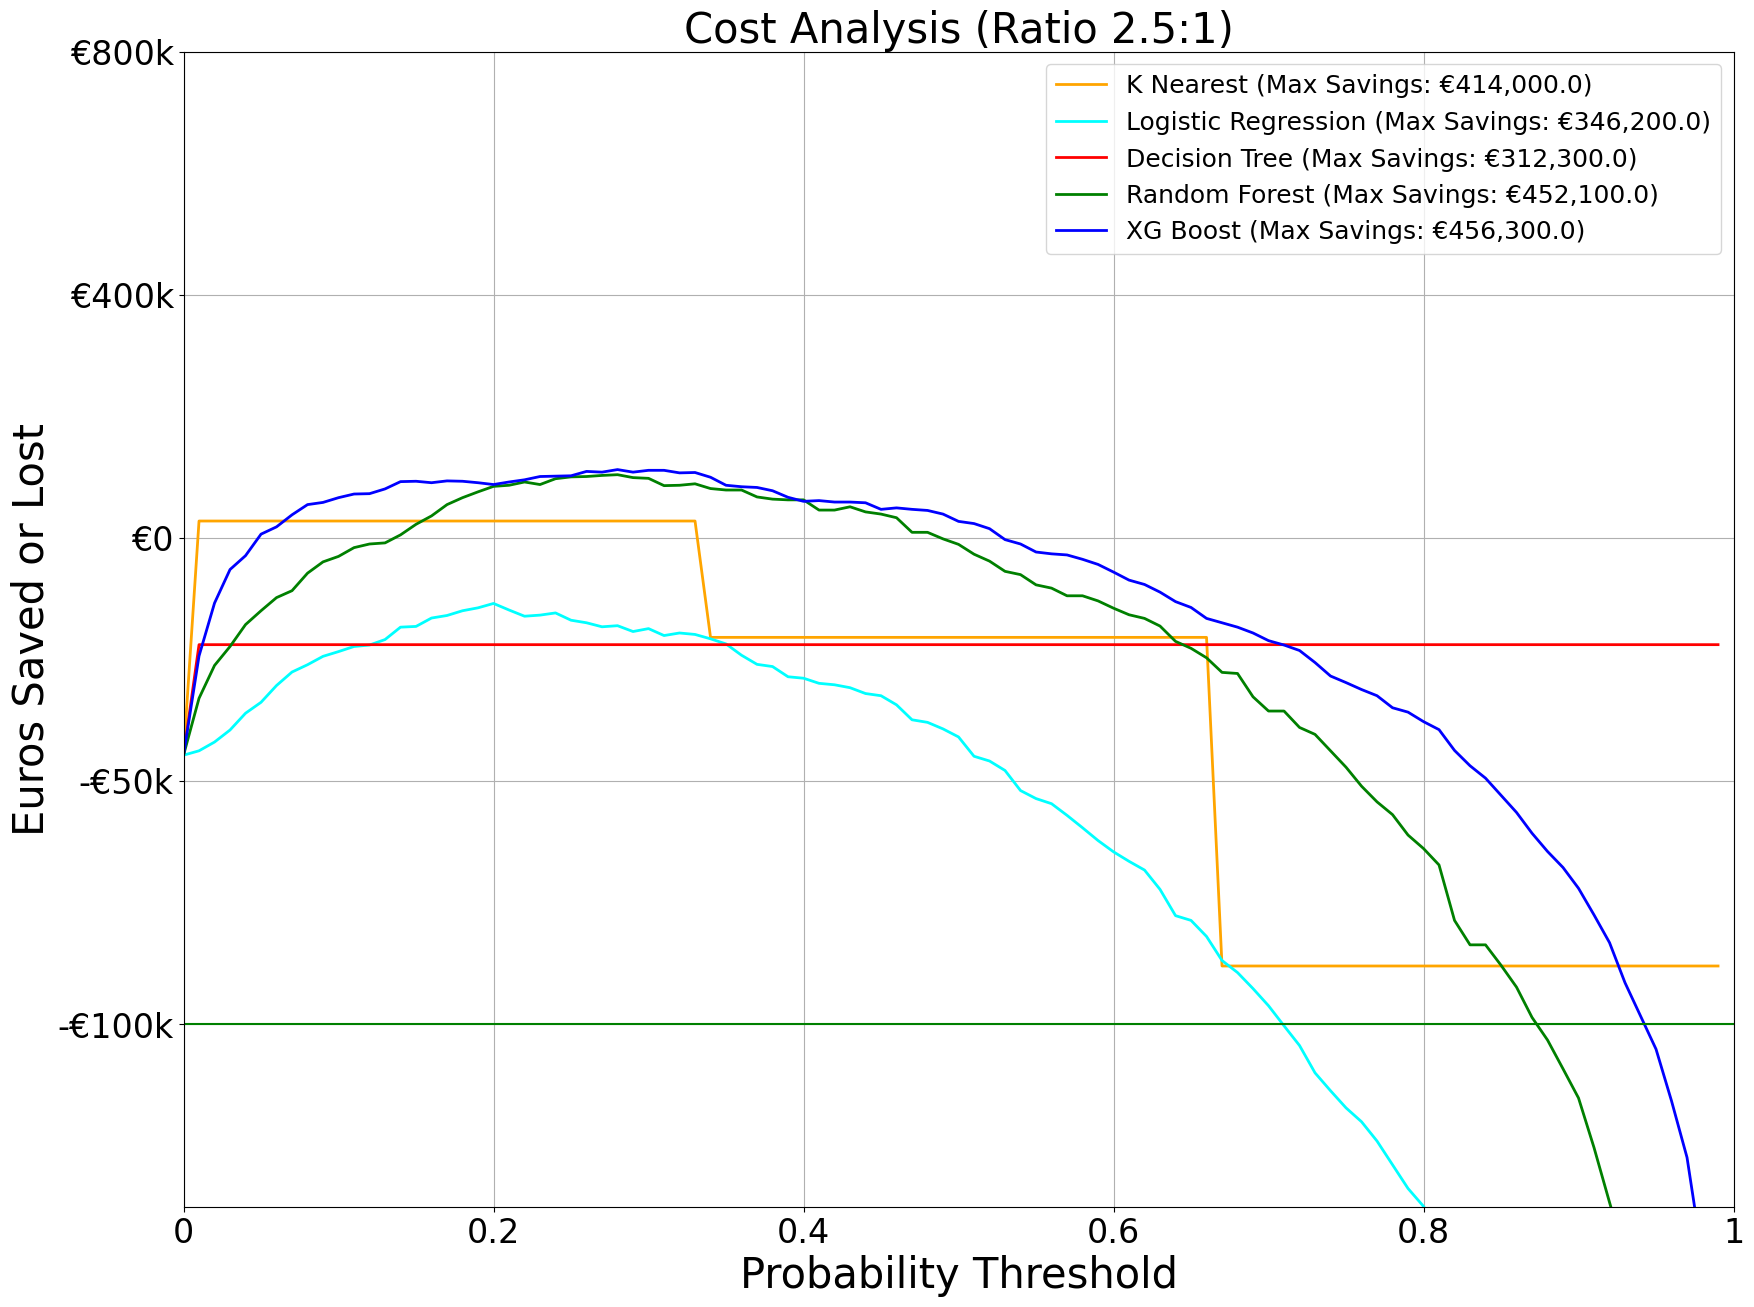

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


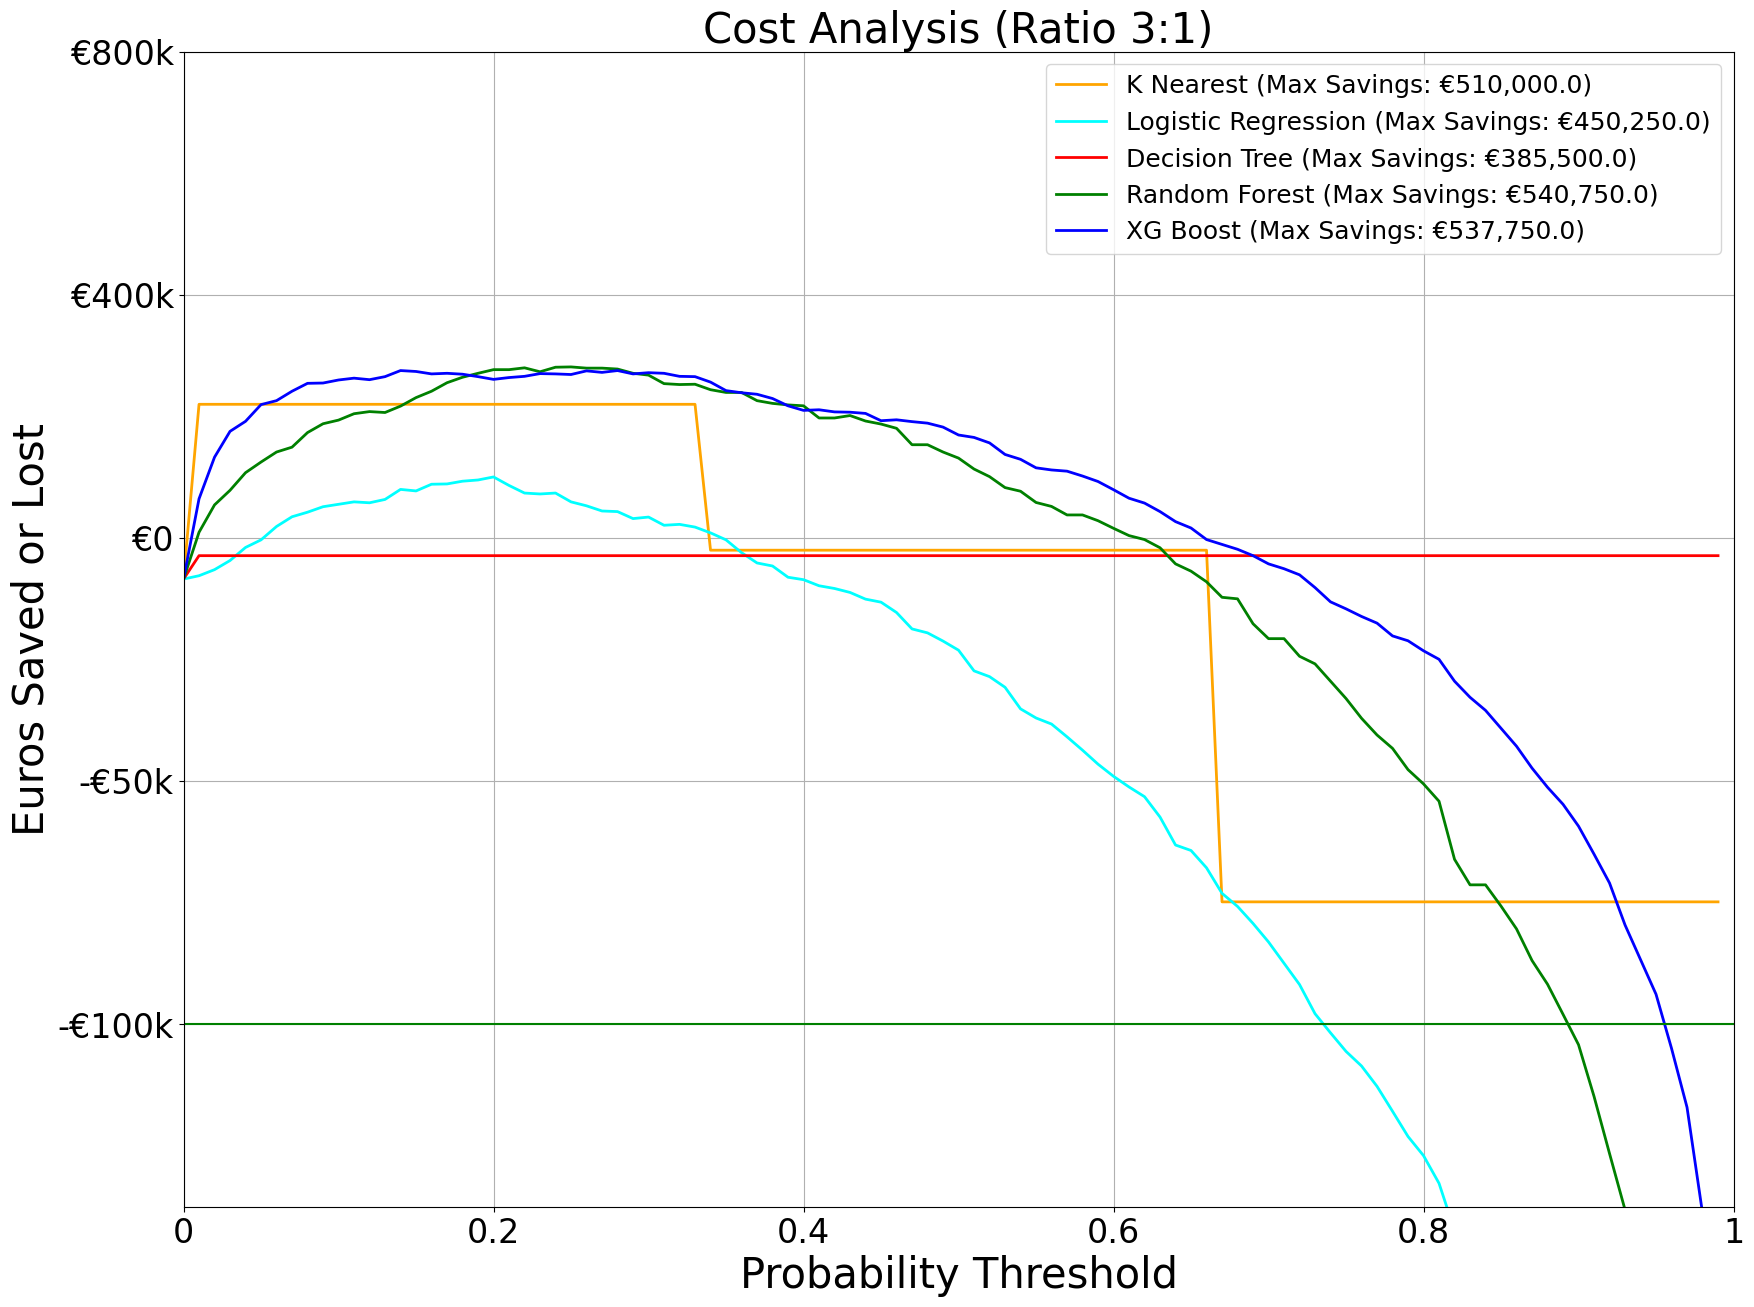

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


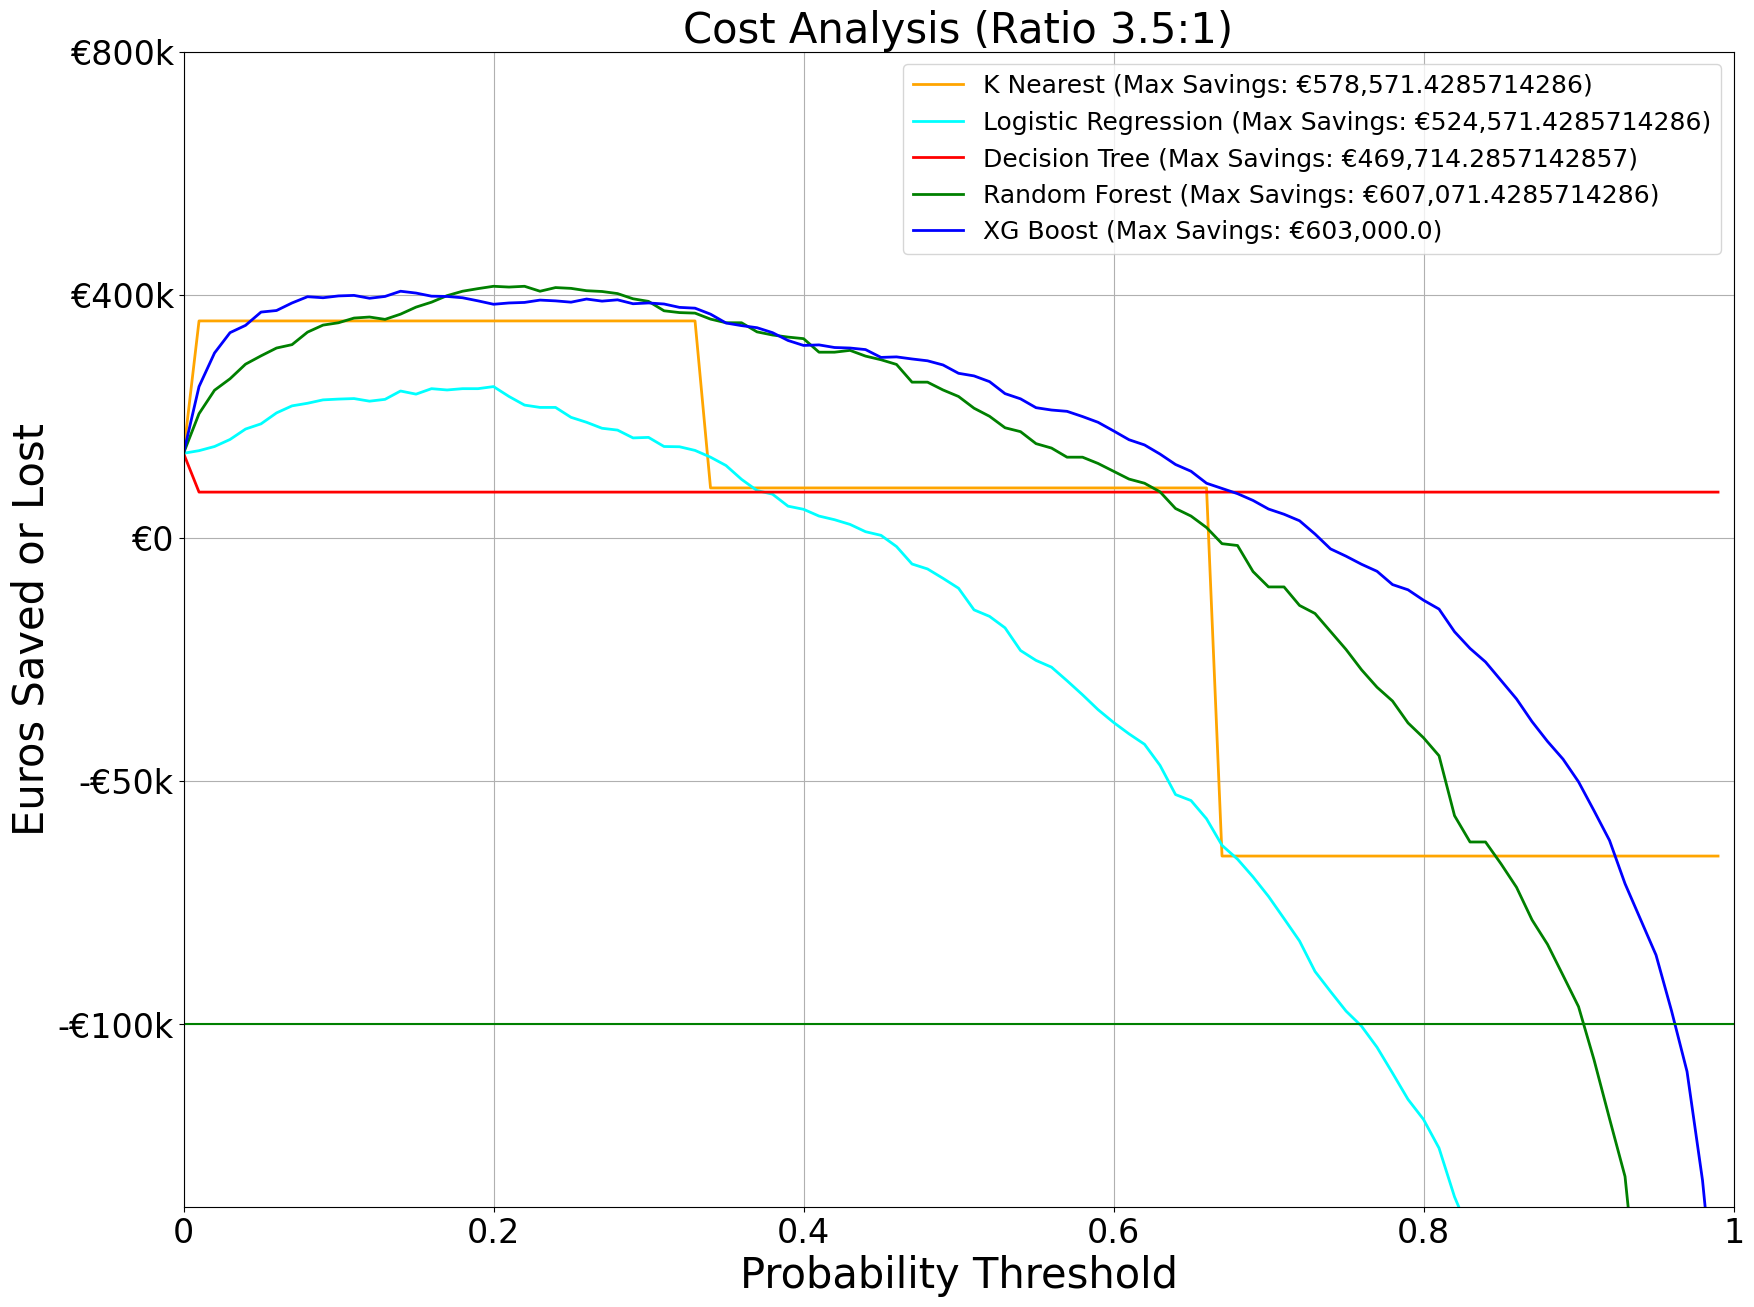

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


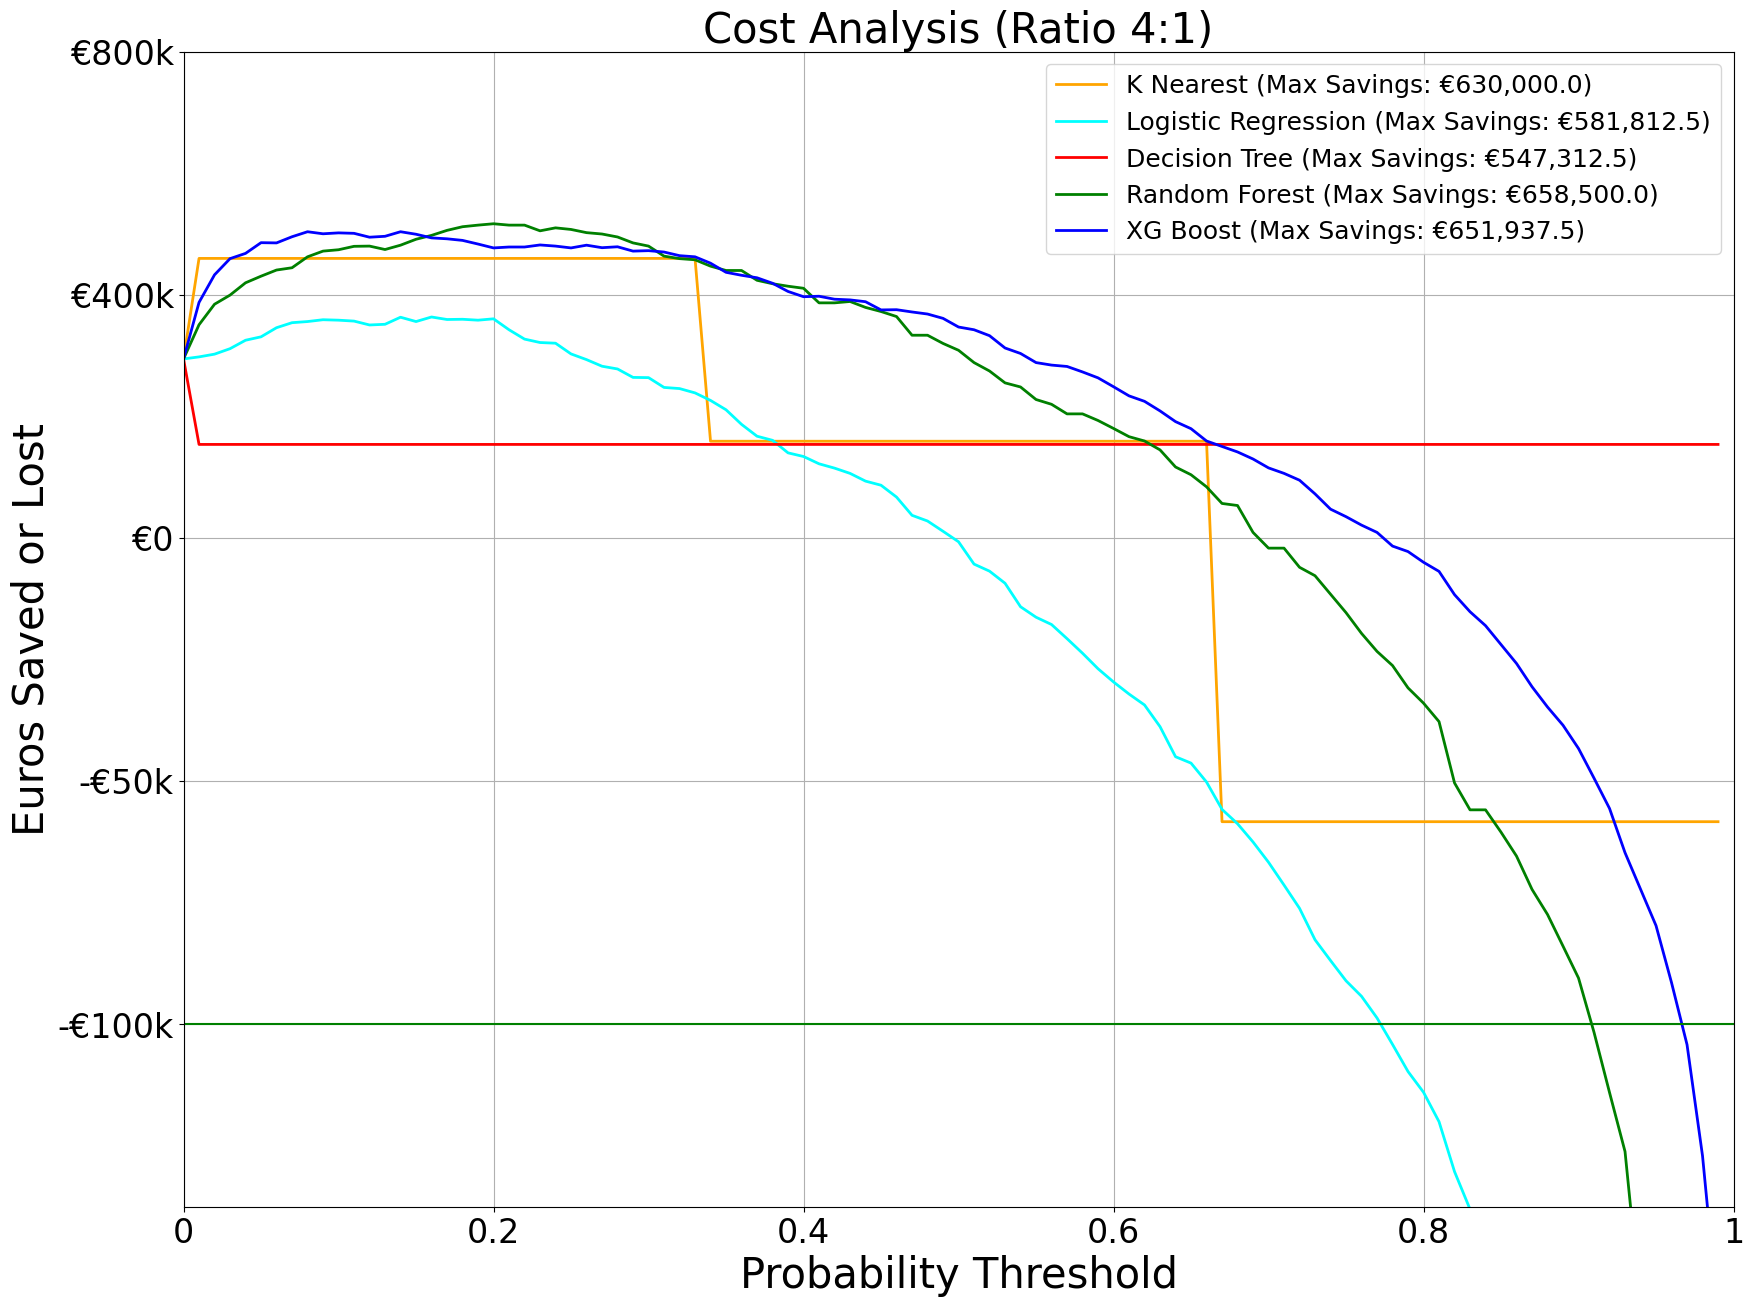

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


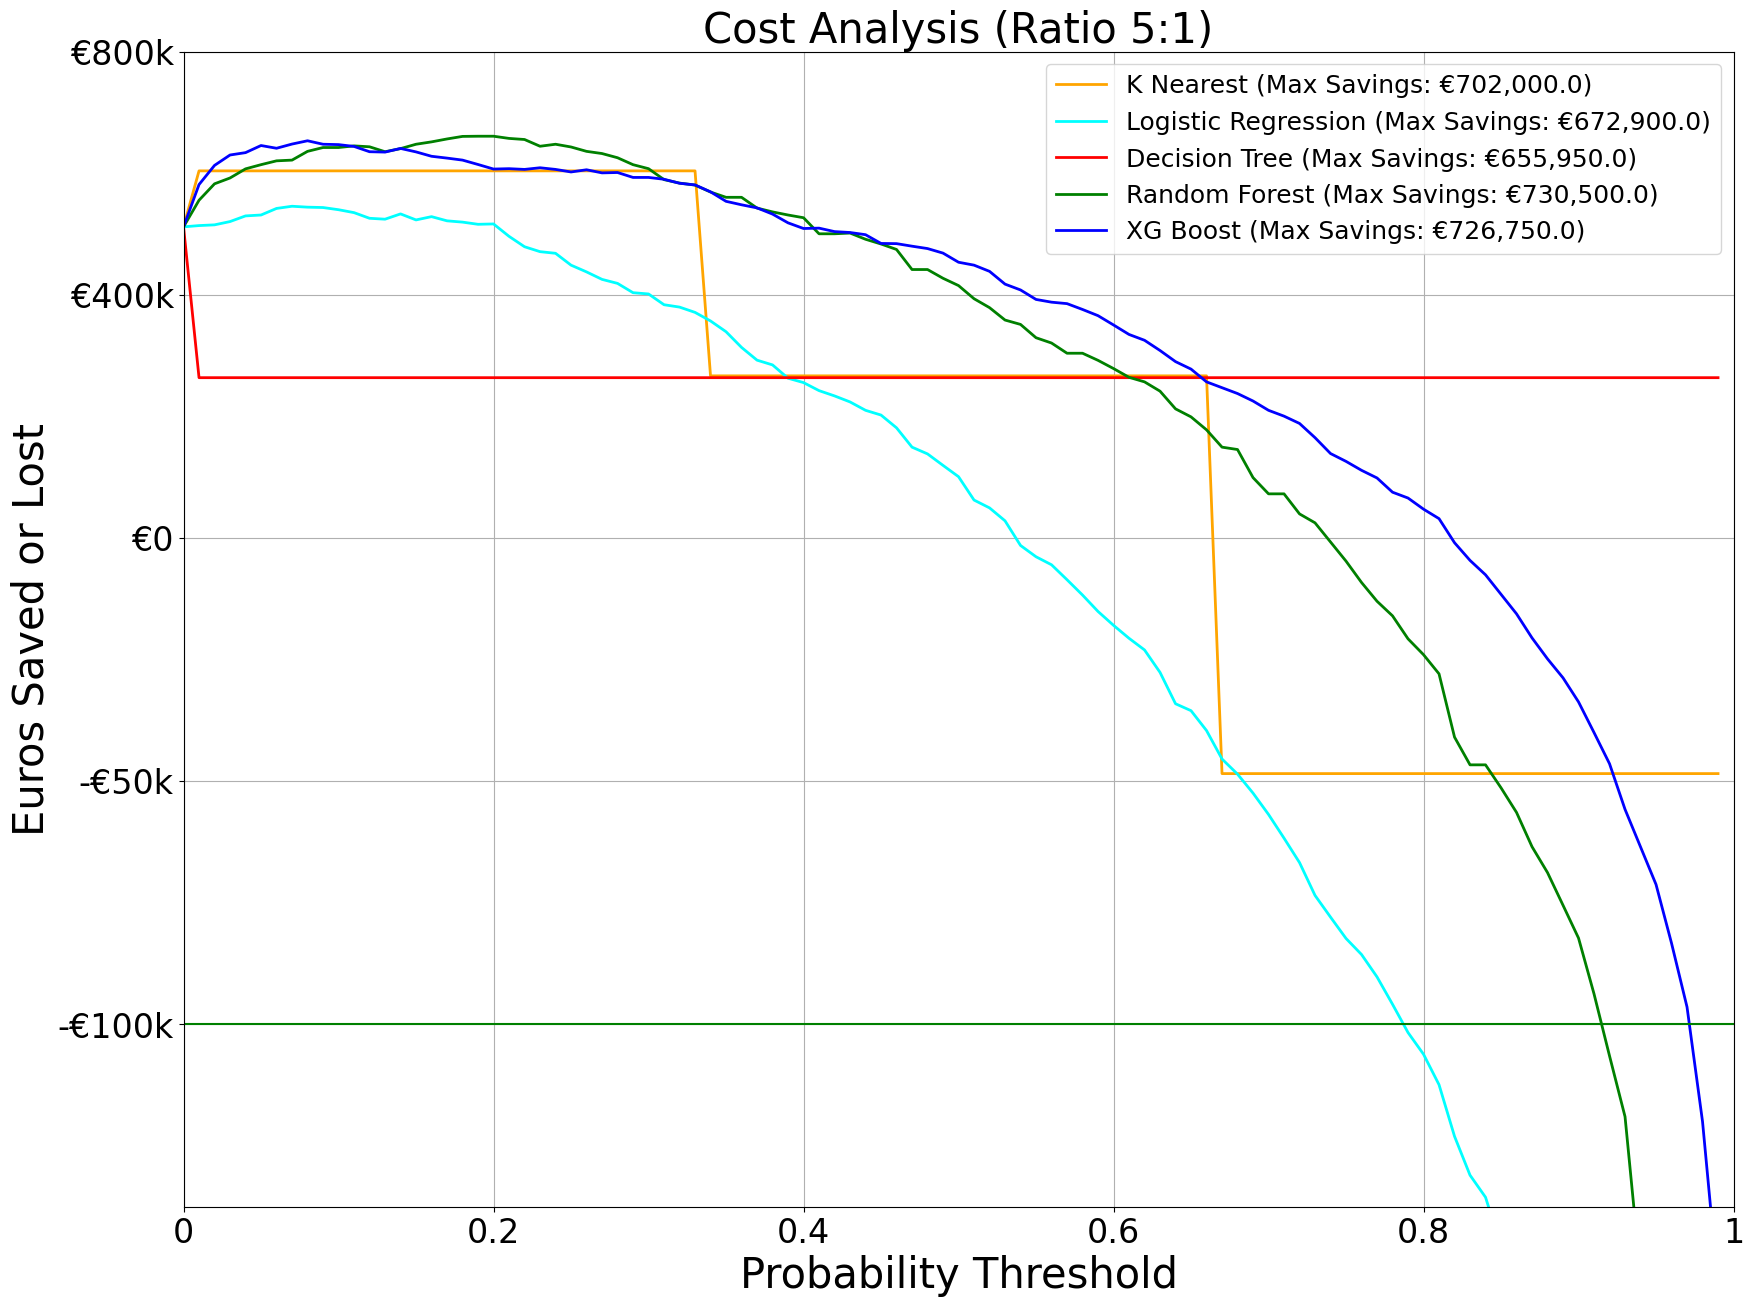

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


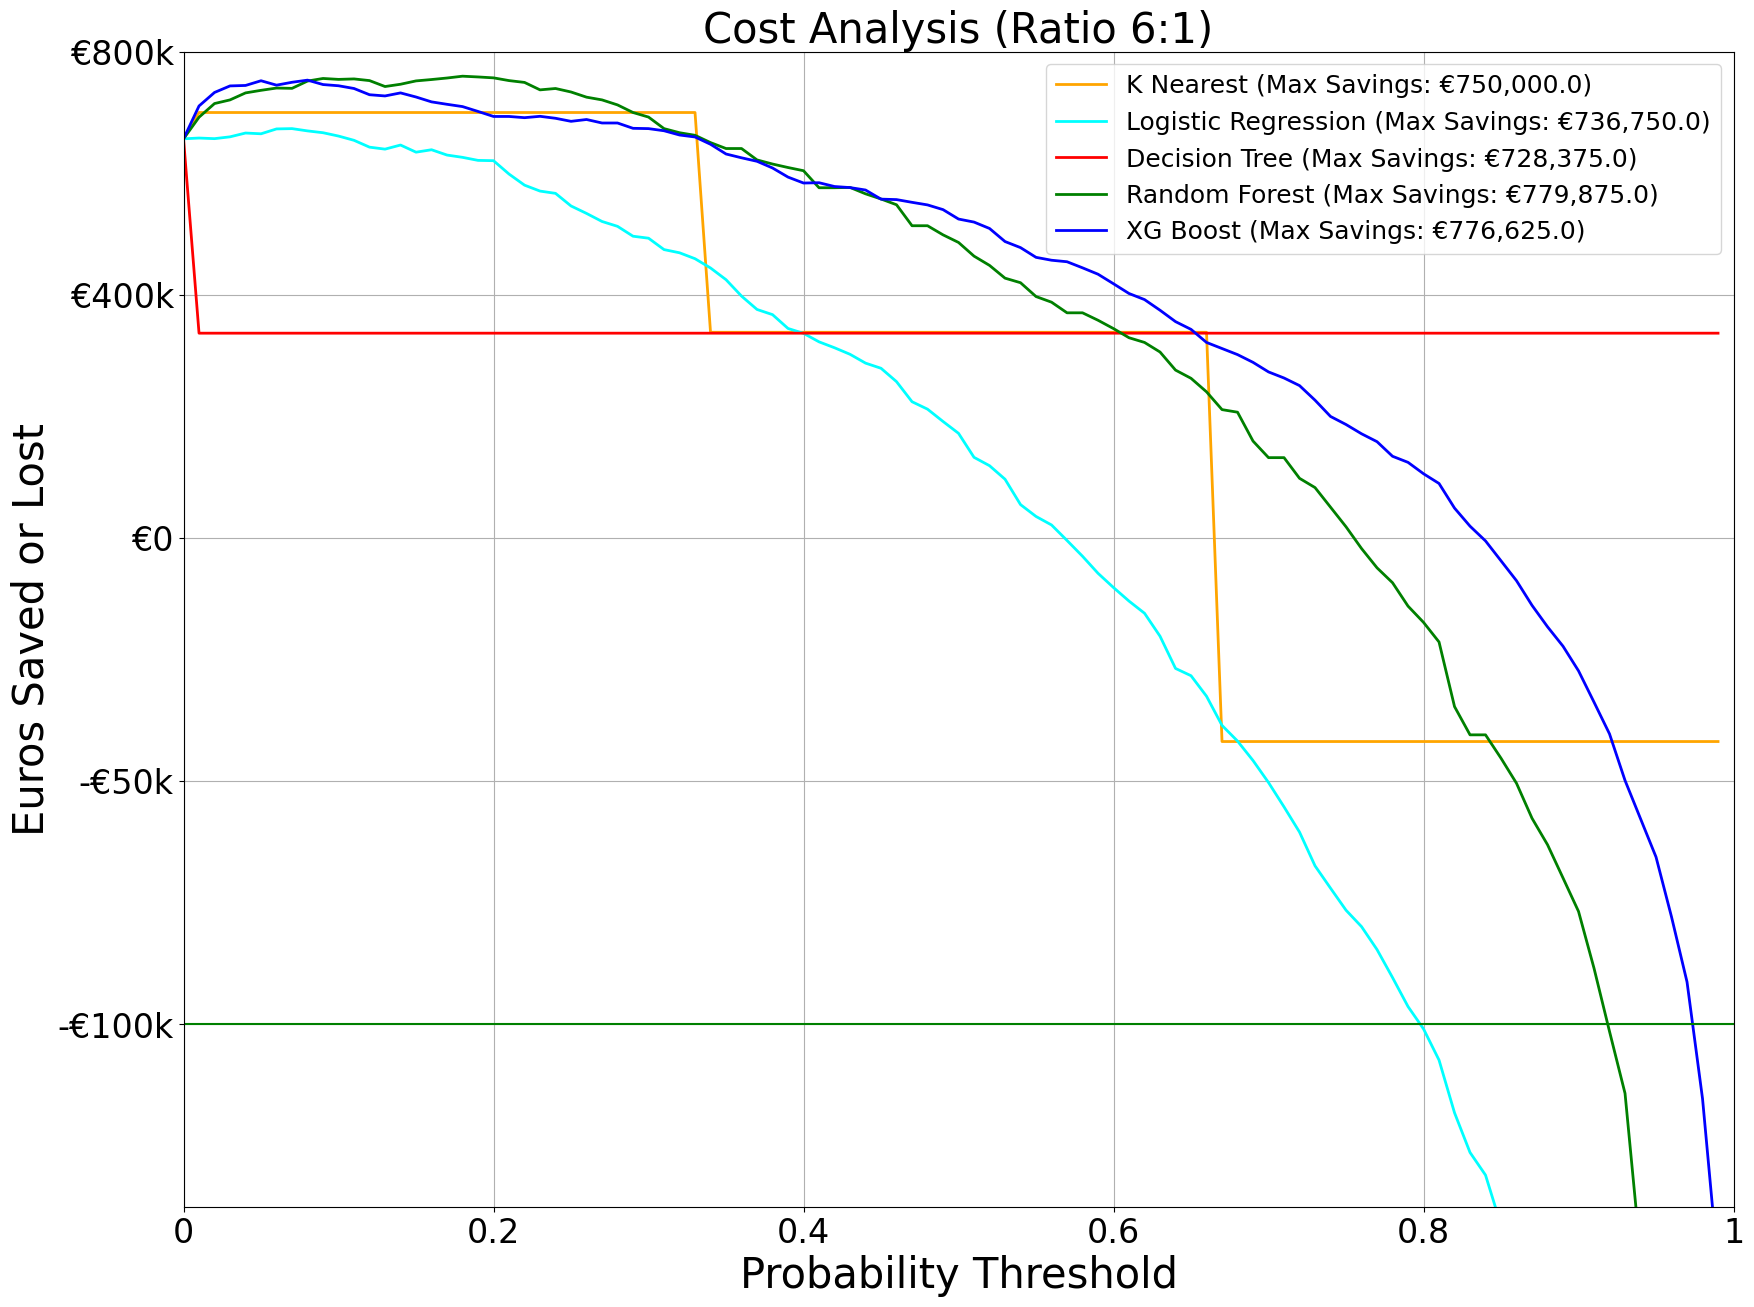

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


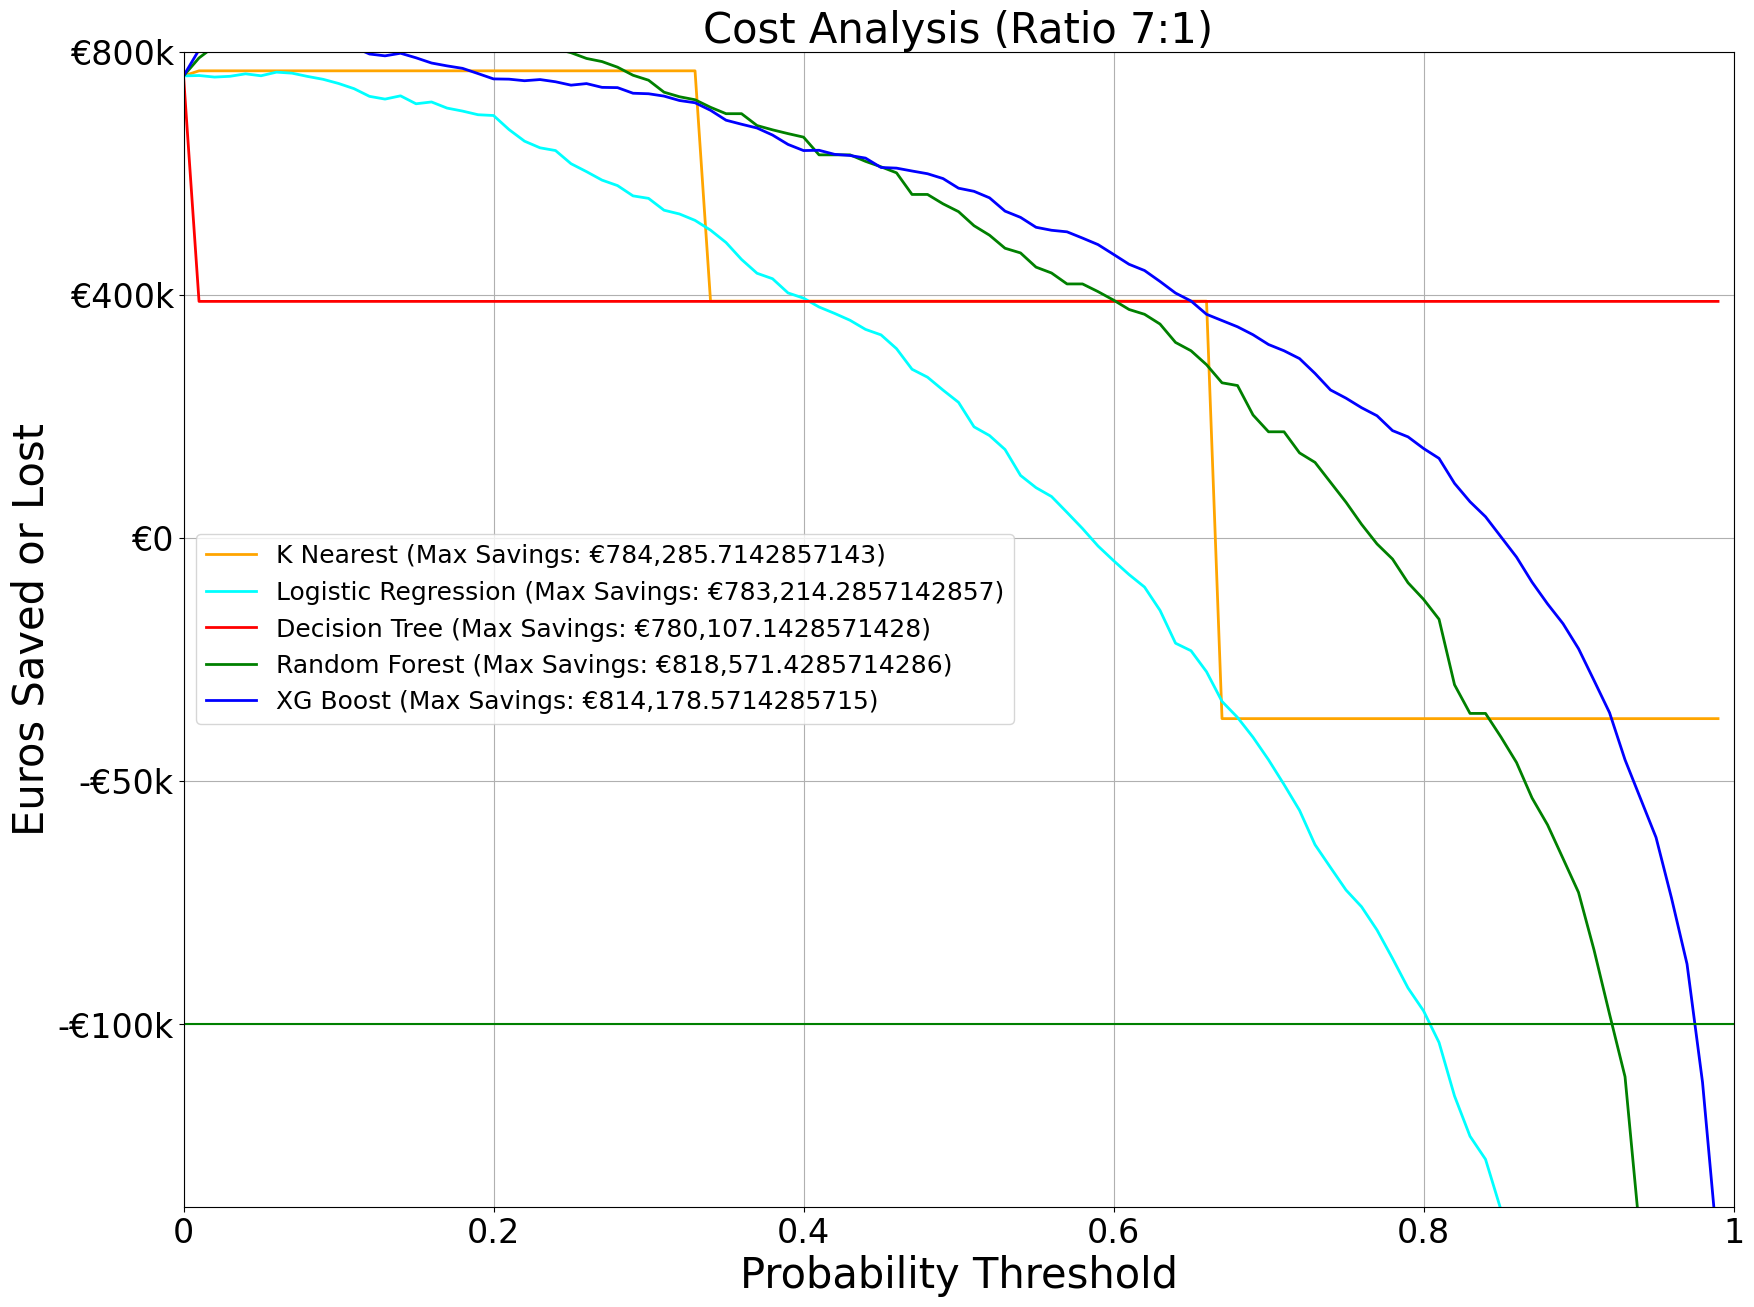

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def model_cost(model, acquisition_cost, retention_cost):
    savings = []
    idx = []
    for i in np.arange(0, 1, 0.01):
        y_predict = (model.predict_proba(X_test_scaled)[:, 1] >= i)
        cf_matrix = confusion_matrix(y_test, y_predict)
        total_cost = (cf_matrix[0][1] * retention_cost) + (cf_matrix[1][1] * retention_cost) + cf_matrix[1][0] * acquisition_cost
        total_savings = cf_matrix[1][1] * acquisition_cost
        savings.append(total_savings - total_cost)
        idx.append(i)
    return savings, idx

# Perform sensitivity analysis for different ratios
ratios = list((2,2.5,3,3.5,4,5,6, 7))
acquisition_cost = 750

for ratio in ratios:
    retention_cost = acquisition_cost / ratio

    # Calculate savings for each model with the current ratio
    knn_savings, knn_idx = model_cost(knn, acquisition_cost, retention_cost)
    lr_savings, lr_idx = model_cost(lr, acquisition_cost, retention_cost)
    dc_savings, dc_idx = model_cost(DTC, acquisition_cost, retention_cost)
    rf_savings, rf_idx = model_cost(RFC, acquisition_cost, retention_cost)
    xgb_savings, xgb_idx = model_cost(xgb, acquisition_cost, retention_cost)

    # Plotting the cost analysis for the current ratio
    fig, ax = plt.subplots(figsize=(20, 15))
    plt.plot(knn_idx, knn_savings, label='K Nearest (Max Savings: €{:,})'.format(max(knn_savings)), color='orange', lw=2)
    plt.plot(lr_idx, lr_savings, label='Logistic Regression (Max Savings: €{:,})'.format(max(lr_savings)), color='cyan', lw=2)
    plt.plot(dc_idx, dc_savings, label='Decision Tree (Max Savings: €{:,})'.format(max(dc_savings)), color='red', lw=2)
    plt.plot(rf_idx, rf_savings, label='Random Forest (Max Savings: €{:,})'.format(max(rf_savings)), color='green', lw=2)
    plt.plot(xgb_idx, xgb_savings, label='XG Boost (Max Savings: €{:,})'.format(max(xgb_savings)), color='blue', lw=2)
    ax.axhline(y=0, color='green')
    plt.grid()
    ax.set_xbound(lower=0, upper=1)
    ax.set_ybound(lower=-150000, upper=800000)
    ax.set_yticklabels(['-€150K','-€100k','-€50k', '€0', '€400k', '€800k'], fontsize=24)
    ax.set_xticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1'], fontsize=24)
    plt.xlabel('Probability Threshold', fontsize=30)
    plt.ylabel('Euros Saved or Lost', fontsize=30)
    plt.legend(fontsize=18)
    plt.title('Cost Analysis (Ratio {}:1)'.format(ratio), fontsize=30)
    plt.savefig('Cost_Analysis_Ratio_{}.png'.format(ratio))
    plt.show()


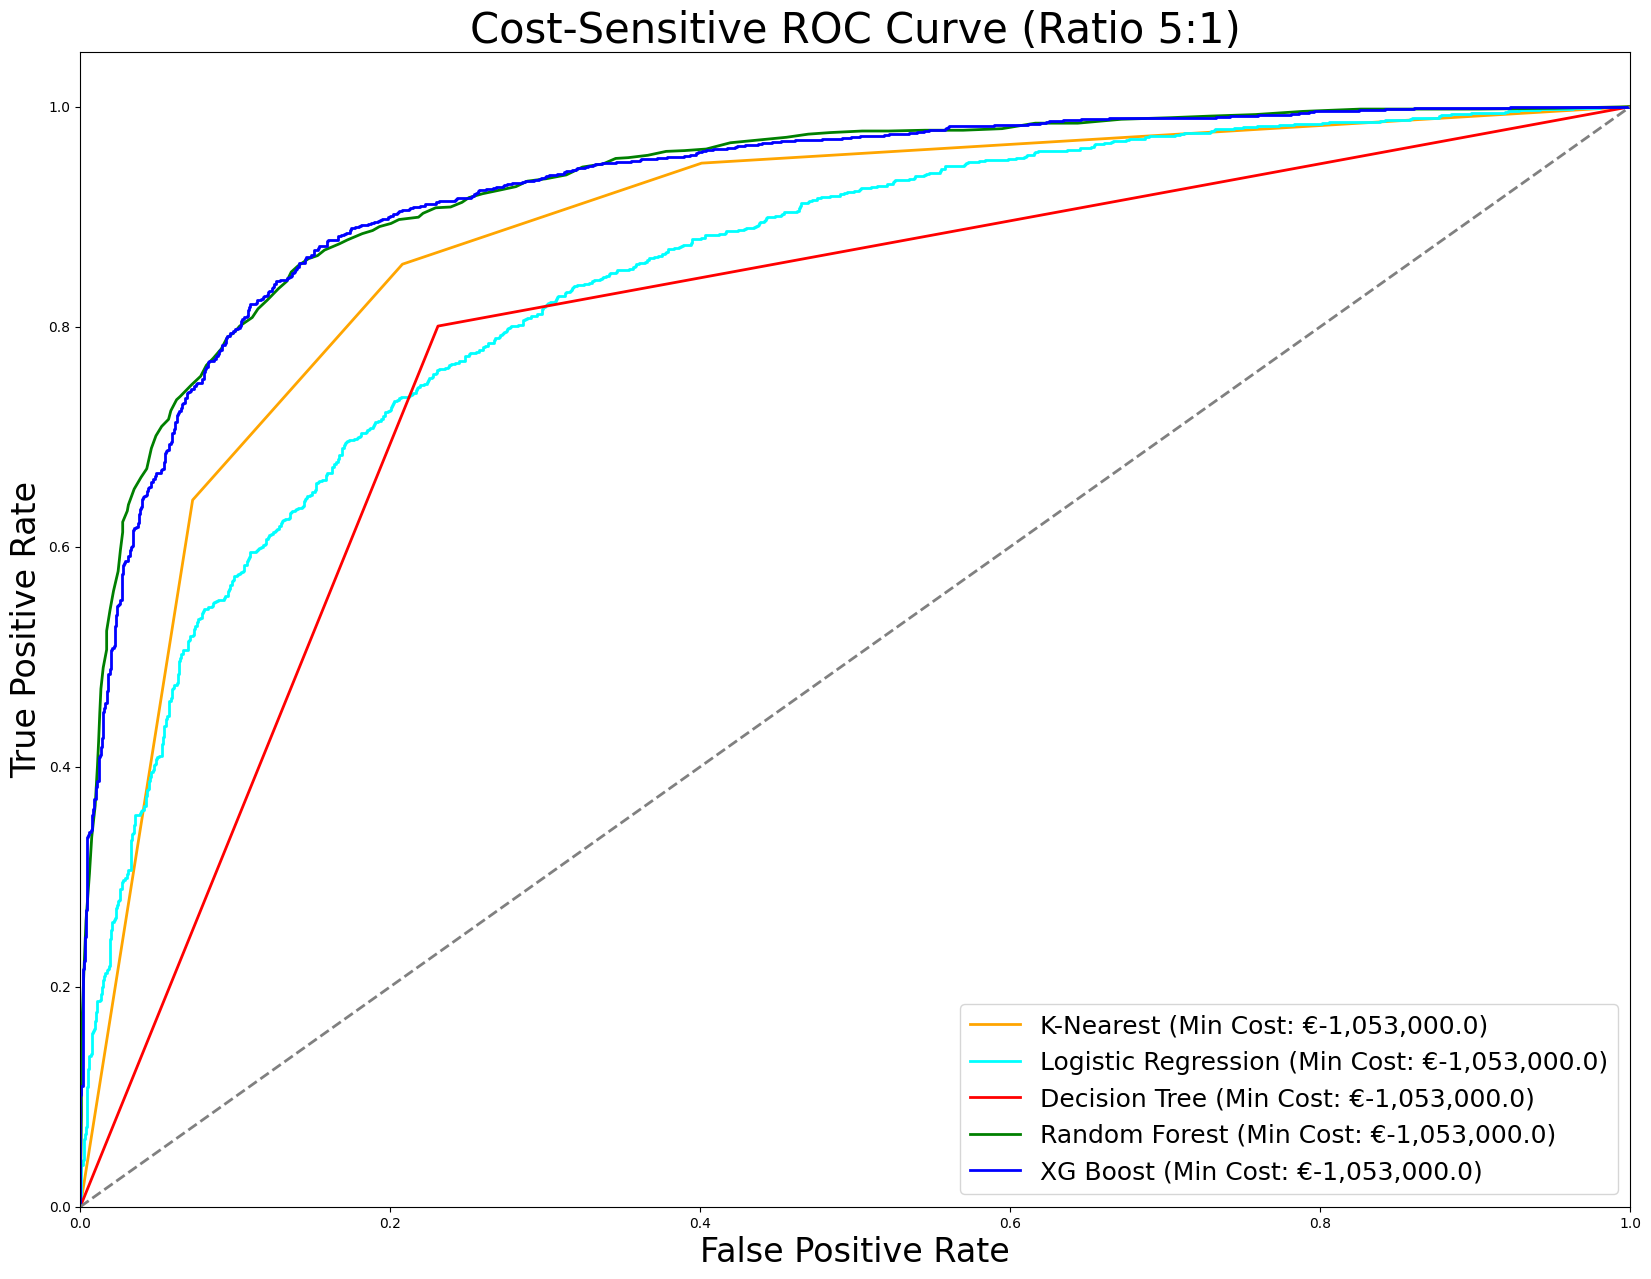

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def calculate_cost_1(cf_matrix_1, acquisition_cost_1, retention_cost_1):
    total_cost_1 = (cf_matrix_1[0][1] * retention_cost_1) + (cf_matrix_1[1][1] * retention_cost_1) + cf_matrix_1[1][0] * acquisition_cost_1
    total_savings_1 = cf_matrix_1[1][1] * acquisition_cost_1
    net_gain_1 = total_savings_1 - total_cost_1
    return net_gain_1

def cost_sensitive_roc_1(model_1, X_test_1, y_test_1, acquisition_cost_1, retention_cost_1):
    y_probs_1 = model_1.predict_proba(X_test_1)[:, 1]
    fpr_1, tpr_1, thresholds_1 = roc_curve(y_test_1, y_probs_1)
    costs_1 = []

    for threshold in thresholds_1:
        y_pred_1 = (y_probs_1 >= threshold).astype(int)
        cf_matrix_1 = confusion_matrix(y_test_1, y_pred_1)
        cost_1 = calculate_cost_1(cf_matrix_1, acquisition_cost_1, retention_cost_1)
        costs_1.append(cost_1)

    return fpr_1, tpr_1, thresholds_1, costs_1

# Parameters
acquisition_cost_1 = 750
ratio = 5

# Plotting cost-sensitive ROC curves for different ratios

retention_cost_1 = acquisition_cost_1 / ratio

fpr_knn_1, tpr_knn_1, thresholds_knn_1, costs_knn_1 = cost_sensitive_roc_1(knn_1, X_test_scaled_1, y_test_1, acquisition_cost_1, retention_cost_1)
fpr_lr_1, tpr_lr_1, thresholds_lr_1, costs_lr_1 = cost_sensitive_roc_1(lr_1, X_test_scaled_1, y_test_1, acquisition_cost_1, retention_cost_1)
fpr_dc_1, tpr_dc_1, thresholds_dc_1, costs_dc_1 = cost_sensitive_roc_1(DTC_1, X_test_scaled_1, y_test_1, acquisition_cost_1, retention_cost_1)
fpr_rf_1, tpr_rf_1, thresholds_rf_1, costs_rf_1 = cost_sensitive_roc_1(RFC_1, X_test_scaled_1, y_test_1, acquisition_cost_1, retention_cost_1)
fpr_xgb_1, tpr_xgb_1, thresholds_xgb_1, costs_xgb_1 = cost_sensitive_roc_1(xgb_1, X_test_scaled_1, y_test_1, acquisition_cost_1, retention_cost_1)

# Plot ROC curves
plt.figure(figsize=(20, 15))
plt.plot(fpr_knn_1, tpr_knn_1, label='K-Nearest (Min Cost: €{:,})'.format(min(costs_knn_1)), color='orange', lw=2)
plt.plot(fpr_lr_1, tpr_lr_1, label='Logistic Regression (Min Cost: €{:,})'.format(min(costs_lr_1)), color='cyan', lw=2)
plt.plot(fpr_dc_1, tpr_dc_1, label='Decision Tree (Min Cost: €{:,})'.format(min(costs_dc_1)), color='red', lw=2)
plt.plot(fpr_rf_1, tpr_rf_1, label='Random Forest (Min Cost: €{:,})'.format(min(costs_rf_1)), color='green', lw=2)
plt.plot(fpr_xgb_1, tpr_xgb_1, label='XG Boost (Min Cost: €{:,})'.format(min(costs_xgb_1)), color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=24)
plt.ylabel('True Positive Rate', fontsize=24)
plt.title('Cost-Sensitive ROC Curve (Ratio {}:1)'.format(ratio), fontsize=30)
plt.legend(loc="lower right", fontsize=18)
plt.savefig('Cost_Sensitive_ROC_Ratio_{}.png'.format(ratio))
plt.show()


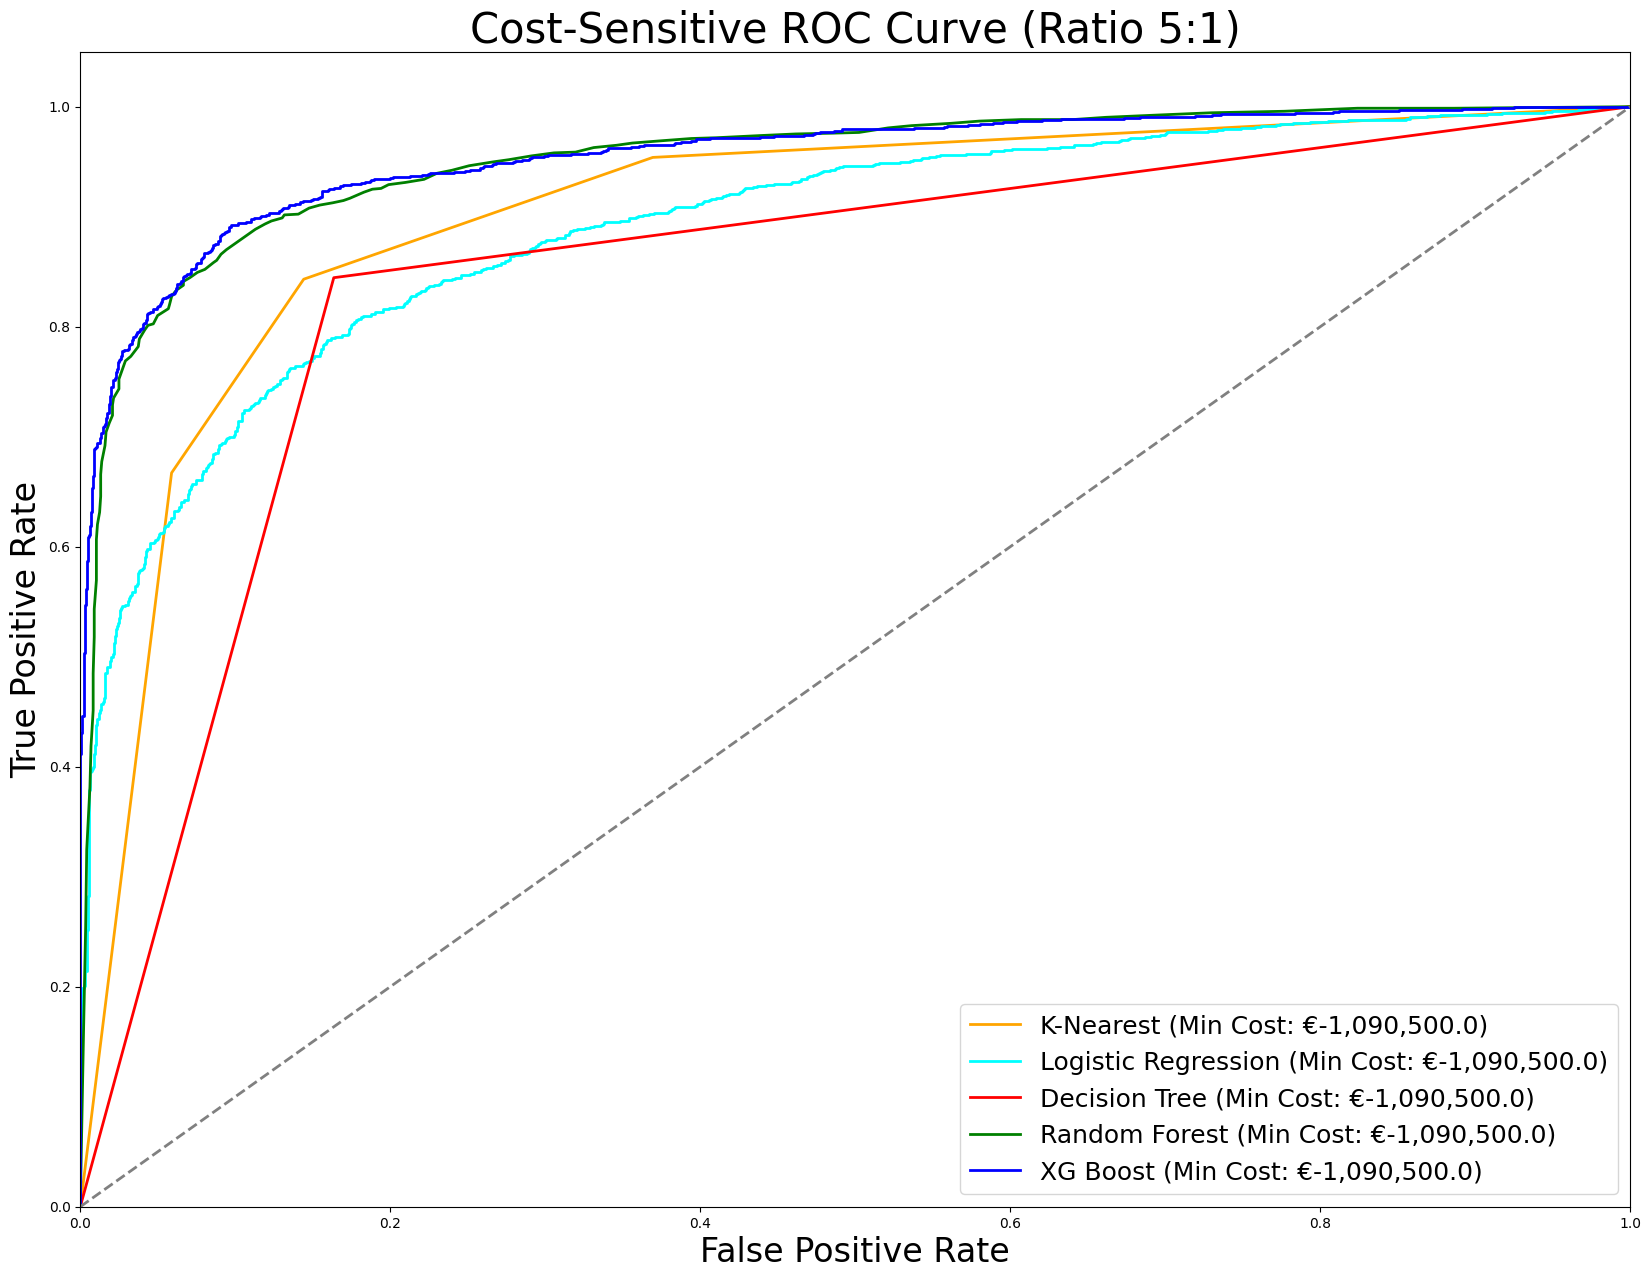

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def calculate_cost(cf_matrix, acquisition_cost, retention_cost):
    total_cost = (cf_matrix[0][1] * retention_cost) + (cf_matrix[1][1] * retention_cost) + cf_matrix[1][0] * acquisition_cost
    total_savings = cf_matrix[1][1] * acquisition_cost
    net_gain = total_savings - total_cost
    return net_gain

def cost_sensitive_roc(model, X_test, y_test, acquisition_cost, retention_cost):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    costs = []

    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        cf_matrix = confusion_matrix(y_test, y_pred)
        cost = calculate_cost(cf_matrix, acquisition_cost, retention_cost)
        costs.append(cost)

    return fpr, tpr, thresholds, costs

# Parameters
acquisition_cost = 750
ratio = 5

# Plotting cost-sensitive ROC curves for different ratios

retention_cost = acquisition_cost / ratio

fpr_knn, tpr_knn, thresholds_knn, costs_knn = cost_sensitive_roc(knn, X_test_scaled, y_test, acquisition_cost, retention_cost)
fpr_lr, tpr_lr, thresholds_lr, costs_lr = cost_sensitive_roc(lr, X_test_scaled, y_test, acquisition_cost, retention_cost)
fpr_dc, tpr_dc, thresholds_dc, costs_dc = cost_sensitive_roc(DTC, X_test_scaled, y_test, acquisition_cost, retention_cost)
fpr_rf, tpr_rf, thresholds_rf, costs_rf = cost_sensitive_roc(RFC, X_test_scaled, y_test, acquisition_cost, retention_cost)
fpr_xgb, tpr_xgb, thresholds_xgb, costs_xgb = cost_sensitive_roc(xgb, X_test_scaled, y_test, acquisition_cost, retention_cost)

# Plot ROC curves
plt.figure(figsize=(20, 15))
plt.plot(fpr_knn, tpr_knn, label='K-Nearest (Min Cost: €{:,})'.format(min(costs_knn)), color='orange', lw=2)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (Min Cost: €{:,})'.format(min(costs_lr)), color='cyan', lw=2)
plt.plot(fpr_dc, tpr_dc, label='Decision Tree (Min Cost: €{:,})'.format(min(costs_dc)), color='red', lw=2)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (Min Cost: €{:,})'.format(min(costs_rf)), color='green', lw=2)
plt.plot(fpr_xgb, tpr_xgb, label='XG Boost (Min Cost: €{:,})'.format(min(costs_xgb)), color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=24)
plt.ylabel('True Positive Rate', fontsize=24)
plt.title('Cost-Sensitive ROC Curve (Ratio {}:1)'.format(ratio), fontsize=30)
plt.legend(loc="lower right", fontsize=18)
plt.savefig('Cost_Sensitive_ROC_Ratio_{}.png'.format(ratio))
plt.show()

# # Plot Cost vs Probability Threshold
# plt.figure(figsize=(20, 15))
# plt.plot(thresholds_knn, costs_knn, label='K-Nearest', color='orange', lw=2)
# plt.plot(thresholds_lr, costs_lr, label='Logistic Regression', color='cyan', lw=2)
# plt.plot(thresholds_dc, costs_dc, label='Decision Tree', color='red', lw=2)
# plt.plot(thresholds_rf, costs_rf, label='Random Forest', color='green', lw=2)
# plt.plot(thresholds_xgb, costs_xgb, label='XG Boost', color='blue', lw=2)
# plt.xlabel('Probability Threshold', fontsize=24)
# plt.ylabel('Cost', fontsize=24)
# plt.title('Cost vs Probability Threshold (Ratio {}:1)'.format(ratio), fontsize=30)
# plt.legend(loc="upper right", fontsize=18)
# plt.savefig('Cost_vs_Threshold_Ratio_{}.png'.format(ratio))
# plt.show()


# Shapley Analysis

In [59]:
#create SHAP explainer
explainer=shap.TreeExplainer(RFC)
#calculate shapley values for test data
start_index=1
end_index=2
shap_values=explainer.shap_values(X_test_scaled[start_index:end_index])
X_test_scaled[start_index:end_index]

array([[ 0.13062597, -0.901554  ,  1.19040605, -0.69641012, -1.05127311,
         0.55367023,  1.01264197, -1.28823524,  1.27810527, -0.811975  ,
         0.5671079 ,  0.21069231,  0.86956873,  0.75572999, -0.78945566,
        -0.85928594]])

In [127]:
# class 0= contribution to class 1
print(shap_values[0].shape)
shap_values

(1, 16)


[array([[ 0.00152147, -0.00469149,  0.06887843,  0.09963923,  0.0002658 ,
         -0.01379204,  0.16884   , -0.01643723,  0.17027762, -0.00569148,
          0.00557442, -0.00882646, -0.01193347, -0.00821016,  0.08939778,
         -0.0751551 ]]),
 array([[-0.00152147,  0.00469149, -0.06887843, -0.09963923, -0.0002658 ,
          0.01379204, -0.16884   ,  0.01643723, -0.17027762,  0.00569148,
         -0.00557442,  0.00882646,  0.01193347,  0.00821016, -0.08939778,
          0.0751551 ]])]

In [128]:
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values


(1, 16)


[array([[ 0.00152147, -0.00469149,  0.06887843,  0.09963923,  0.0002658 ,
         -0.01379204,  0.16884   , -0.01643723,  0.17027762, -0.00569148,
          0.00557442, -0.00882646, -0.01193347, -0.00821016,  0.08939778,
         -0.0751551 ]]),
 array([[-0.00152147,  0.00469149, -0.06887843, -0.09963923, -0.0002658 ,
          0.01379204, -0.16884   ,  0.01643723, -0.17027762,  0.00569148,
         -0.00557442,  0.00882646,  0.01193347,  0.00821016, -0.08939778,
          0.0751551 ]])]

In [129]:
X.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'Creditscore_balance', 'age_numofproducts', 'avgyearlybalance',
       'balance_age_ratio', 'highbalance_notactive',
       'nultiproduct_lowactivity'],
      dtype='object')

In [130]:
X_1.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary'],
      dtype='object')

In [62]:
shap_values=explainer.shap_values(X_test_scaled)

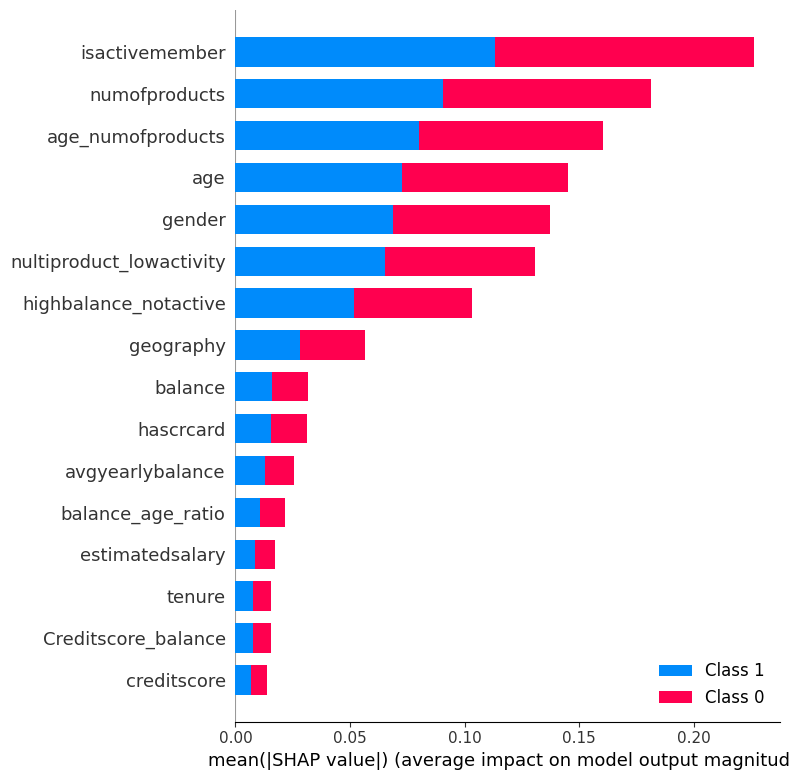

In [132]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns,max_display=30)

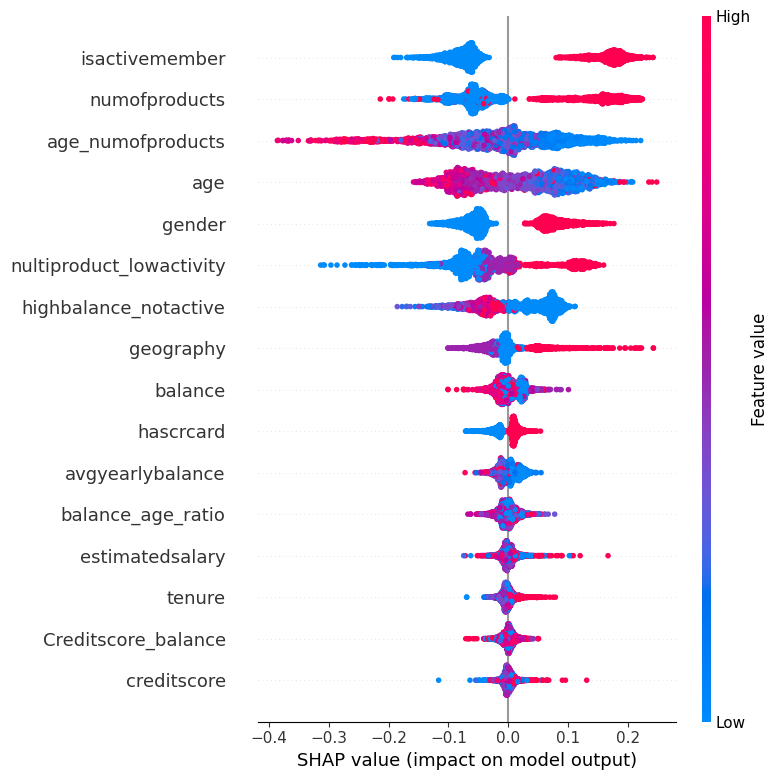

In [63]:
shap.summary_plot(shap_values[0], X_test_scaled,feature_names=X.columns)

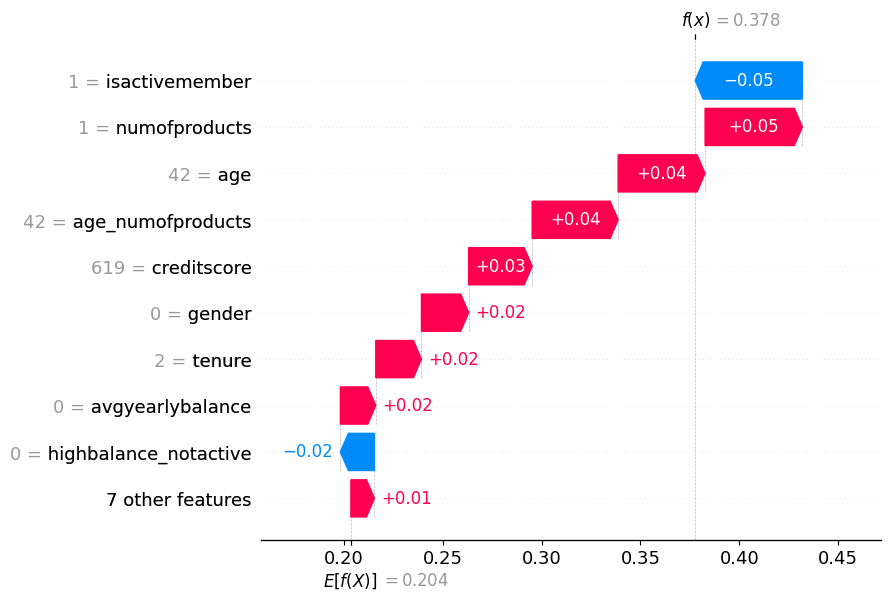

In [64]:
model=xgboost.XGBRegressor().fit(X, y)
explainer_XGB=shap.Explainer(model)
shap_values_XGB=explainer_XGB(X)
shap.plots.waterfall(shap_values_XGB[0])

In [65]:
model = xgboost.XGBRegressor().fit(X_train_scaled, y_train)

explainer_XGB = shap.Explainer(model, X_train_scaled)
shap_values_XGB = explainer_XGB(X_train_scaled)
feature_names = ['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
                 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
                 'Creditscore_balance', 'age_numofproducts', 'avgyearlybalance',
                 'balance_age_ratio', 'highbalance_notactive',
                 'nultiproduct_lowactivity']

shap_values_XGB.feature_names = feature_names
shap.initjs()
shap.plots.force(shap_values_XGB[0])


100%|===================| 11573/11585 [01:09<00:00]       

In [66]:
model = xgboost.XGBRegressor().fit(X_train_scaled, y_train)

explainer_XGB = shap.Explainer(model, X_train_scaled)
shap_values_XGB = explainer_XGB(X_train_scaled)
feature_names = ['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
                 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
                 'Creditscore_balance', 'age_numofproducts', 'avgyearlybalance',
                 'balance_age_ratio', 'highbalance_notactive',
                 'nultiproduct_lowactivity']

shap_values_XGB.feature_names = feature_names
shap.initjs()
shap.plots.force(shap_values_XGB[1])

 99%|===================| 11514/11585 [00:57<00:00]       

# Evaluation

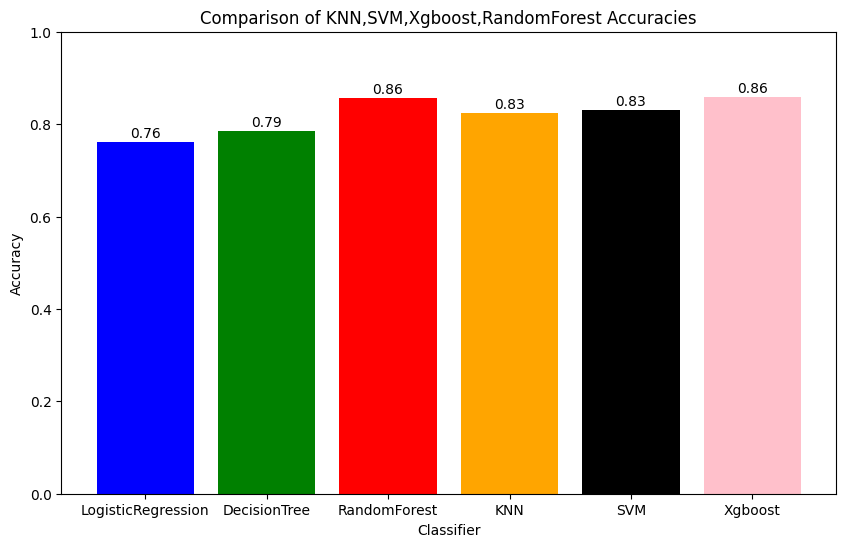

In [67]:
classifiers = ['LogisticRegression','DecisionTree','RandomForest','KNN', 'SVM', 'Xgboost']
accuracies = [0.7608853410740203,0.7851959361393324,0.8574020319303338,0.8251088534107403,0.8301886792452831,0.8577648766328012]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red', 'orange','black','pink'])
plt.title('Comparison of KNN,SVM,Xgboost,RandomForest Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Setting y-axis limit for better visualization
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center')

plt.show()